# Blake Conrad

## Final Project | Implement Interior Point Algorithm

### Algorithm Implemented: Primal Affine Scaling Algorithm (Lecture 10)

Import Numerical Computing Environment Packages

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Problem 1:

Reproduce example in Lecture 10 notes using Primal Affine Scaling Algorithm

In [163]:
A = np.matrix([[1, -1, 1, 0],
               [0, 1 , 0, 1]])
b = np.array([15, 15])
c = np.array([-2, 1, 0, 0])
N = A.shape[0]
M = A.shape[1]
print("A.shape{}".format(A))
print("b.shape {}".format(b))
print("c.shape {}".format(c))
print("{} constraints".format(N))
print("{} dimensions".format(M))

A.shape[[ 1 -1  1  0]
 [ 0  1  0  1]]
b.shape [15 15]
c.shape [-2  1  0  0]
2 constraints
4 dimensions


In [166]:
def primal_interior_feasible(x):
    return (x > 0).all()

def make_feasible(z):
    z[z < 0 ] = max(0.1, z.max())
    return z

def dual_interior_feasible(s):
    return (s > 0).all()

def get_IBFS(dim):
    x0 = np.random.randn(dim)
    it=0
    while not primal_interior_feasible(x0):
        x0 = np.random.randn(dim)
        it+=1
    print("Took {} iterations to find IBFS.".format(it))
    return x0

def get_dual(X):
    w = np.linalg.inv(A.dot(X**2).dot(A.T)).dot(A).dot(X**2).dot(c)
    s = c - A.T.dot(w.T).T
    return w, s

def get_duality_gap(x,s):
    return x.dot(s.T)

def interior_point(A0,b0,c0,M0,etol=0.0001,alpha=0.1):
    
    # Get IBFS
    x0 = get_IBFS(M0)
    
    # Diagonalize
    X0 = np.diag(x0)
    
    # Get dual variables and dual slack
    w0, s0 = get_dual(X0)
    
    # Make dual feasible
    if not dual_interior_feasible(s0):
        s0 = make_feasible(s0)
    
    # Get initial duality gap
    gap = get_duality_gap(x0, s0).tolist()[0][0]
    it = 0
    gaps=[]
    iters=[]
    zs=[]
    while gap > etol:

        # Get primal scaling direction of improvement
        dy = -X0.dot(s0.T)

        # Get next best point
        x0 = x0 + alpha*X0.dot(dy).T

        # Make primal feasible
        if not primal_interior_feasible(x0):
            x0 = make_feasible(x0)

        # Get dual slack
        X0 = np.diag(np.asarray(x0)[0])
        w0, s0 = get_dual(X0)

        # Make dual feasible
        if not dual_interior_feasible(s0):
            s0 = make_feasible(s0)

        # Get duality gap
        gap = get_duality_gap(x0, s0).tolist()[0][0]
        it += 1
        z = x0.dot(c)
        
        # Record data
        gaps.append(gap)
        iters.append(it)
        zs.append(z)
        
        print("Iteration {}, Duality Gap {}".format(it, gap))


    print("Final Duality Gap {}".format(gap))
    print("Primal Variables {}".format(x0))
    print("Dual Slack Variables {}".format(s0))
    print("Dual Variables {}".format(w0))
    return x0,w0,s0,gaps,iters,zs

In [170]:
x0,w0,s0,gaps,iters, zs=interior_point(A,b,c,M,etol=0.001)


Took 23 iterations to find IBFS.
Iteration 1, Duality Gap 4.946961672261089
Iteration 2, Duality Gap 3.9054782472384204
Iteration 3, Duality Gap 3.2677796894461135
Iteration 4, Duality Gap 2.8270651435688947
Iteration 5, Duality Gap 2.5007484599671836
Iteration 6, Duality Gap 2.247805018232422
Iteration 7, Duality Gap 2.045144262919905
Iteration 8, Duality Gap 1.8786359191181041
Iteration 9, Duality Gap 1.7390904744731475
Iteration 10, Duality Gap 1.6202462542778564
Iteration 11, Duality Gap 1.5176754303646505
Iteration 12, Duality Gap 1.4281506973765463
Iteration 13, Duality Gap 1.349259638262219
Iteration 14, Duality Gap 1.2791599618047507
Iteration 15, Duality Gap 1.2164186534610675
Iteration 16, Duality Gap 1.1599030916338375
Iteration 17, Duality Gap 1.1087054305650321
Iteration 18, Duality Gap 1.0620888996691313
Iteration 19, Duality Gap 1.0194489088185188
Iteration 20, Duality Gap 0.980284380211617
Iteration 21, Duality Gap 0.9441762845654855
Iteration 22, Duality Gap 0.91077134

Iteration 559, Duality Gap 0.051073052323846006
Iteration 560, Duality Gap 0.05098522681284973
Iteration 561, Duality Gap 0.05089770455101724
Iteration 562, Duality Gap 0.050810483964710385
Iteration 563, Duality Gap 0.05072356349118873
Iteration 564, Duality Gap 0.05063694157851552
Iteration 565, Duality Gap 0.05055061668546401
Iteration 566, Duality Gap 0.05046458728142515
Iteration 567, Duality Gap 0.05037885184631624
Iteration 568, Duality Gap 0.05029340887049029
Iteration 569, Duality Gap 0.05020825685464635
Iteration 570, Duality Gap 0.05012339430974109
Iteration 571, Duality Gap 0.05003881975690089
Iteration 572, Duality Gap 0.049954531727335036
Iteration 573, Duality Gap 0.049870528762249705
Iteration 574, Duality Gap 0.04978680941276299
Iteration 575, Duality Gap 0.04970337223982063
Iteration 576, Duality Gap 0.049620215814112675
Iteration 577, Duality Gap 0.04953733871599096
Iteration 578, Duality Gap 0.04945473953538751
Iteration 579, Duality Gap 0.04937241687173356
Iteratio

Iteration 1038, Duality Gap 0.028022924776493756
Iteration 1039, Duality Gap 0.02799660181040004
Iteration 1040, Duality Gap 0.027970328408733286
Iteration 1041, Duality Gap 0.02794410443134237
Iteration 1042, Duality Gap 0.027917929738604873
Iteration 1043, Duality Gap 0.027891804191424584
Iteration 1044, Duality Gap 0.02786572765122907
Iteration 1045, Duality Gap 0.027839699979967113
Iteration 1046, Duality Gap 0.02781372104010639
Iteration 1047, Duality Gap 0.02778779069463088
Iteration 1048, Duality Gap 0.02776190880703859
Iteration 1049, Duality Gap 0.027736075241339038
Iteration 1050, Duality Gap 0.027710289862050902
Iteration 1051, Duality Gap 0.02768455253419965
Iteration 1052, Duality Gap 0.027658863123315107
Iteration 1053, Duality Gap 0.02763322149542917
Iteration 1054, Duality Gap 0.027607627517073435
Iteration 1055, Duality Gap 0.02758208105527683
Iteration 1056, Duality Gap 0.027556581977563395
Iteration 1057, Duality Gap 0.027531130151949877
Iteration 1058, Duality Gap 0

Iteration 1658, Duality Gap 0.017712035925279538
Iteration 1659, Duality Gap 0.017701541418755122
Iteration 1660, Duality Gap 0.017691059366527612
Iteration 1661, Duality Gap 0.017680589746410128
Iteration 1662, Duality Gap 0.01767013253626852
Iteration 1663, Duality Gap 0.017659687714021197
Iteration 1664, Duality Gap 0.017649255257638986
Iteration 1665, Duality Gap 0.01763883514514495
Iteration 1666, Duality Gap 0.01762842735461427
Iteration 1667, Duality Gap 0.017618031864174048
Iteration 1668, Duality Gap 0.017607648652003195
Iteration 1669, Duality Gap 0.017597277696332264
Iteration 1670, Duality Gap 0.017586918975443257
Iteration 1671, Duality Gap 0.017576572467669555
Iteration 1672, Duality Gap 0.017566238151395686
Iteration 1673, Duality Gap 0.017555916005057206
Iteration 1674, Duality Gap 0.017545606007140578
Iteration 1675, Duality Gap 0.017535308136182964
Iteration 1676, Duality Gap 0.017525022370772116
Iteration 1677, Duality Gap 0.017514748689546215
Iteration 1678, Duality

Iteration 2283, Duality Gap 0.012925577998820537
Iteration 2284, Duality Gap 0.01291999444282435
Iteration 2285, Duality Gap 0.012914415715951012
Iteration 2286, Duality Gap 0.012908841811932067
Iteration 2287, Duality Gap 0.0129032727245099
Iteration 2288, Duality Gap 0.01289770844743774
Iteration 2289, Duality Gap 0.012892148974479599
Iteration 2290, Duality Gap 0.0128865942994103
Iteration 2291, Duality Gap 0.012881044416015393
Iteration 2292, Duality Gap 0.012875499318091196
Iteration 2293, Duality Gap 0.012869958999444708
Iteration 2294, Duality Gap 0.012864423453893652
Iteration 2295, Duality Gap 0.012858892675266381
Iteration 2296, Duality Gap 0.012853366657401914
Iteration 2297, Duality Gap 0.012847845394149885
Iteration 2298, Duality Gap 0.012842328879370517
Iteration 2299, Duality Gap 0.012836817106934632
Iteration 2300, Duality Gap 0.012831310070723578
Iteration 2301, Duality Gap 0.012825807764629233
Iteration 2302, Duality Gap 0.012820310182554001
Iteration 2303, Duality Ga

Iteration 2910, Duality Gap 0.010170630848705757
Iteration 2911, Duality Gap 0.010167175697109721
Iteration 2912, Duality Gap 0.010163722895066575
Iteration 2913, Duality Gap 0.010160272440178648
Iteration 2914, Duality Gap 0.010156824330051549
Iteration 2915, Duality Gap 0.010153378562294119
Iteration 2916, Duality Gap 0.010149935134518475
Iteration 2917, Duality Gap 0.010146494044339968
Iteration 2918, Duality Gap 0.01014305528937719
Iteration 2919, Duality Gap 0.010139618867251978
Iteration 2920, Duality Gap 0.010136184775589386
Iteration 2921, Duality Gap 0.010132753012017699
Iteration 2922, Duality Gap 0.010129323574168427
Iteration 2923, Duality Gap 0.010125896459676277
Iteration 2924, Duality Gap 0.010122471666179186
Iteration 2925, Duality Gap 0.010119049191318272
Iteration 2926, Duality Gap 0.010115629032737867
Iteration 2927, Duality Gap 0.01011221118808549
Iteration 2928, Duality Gap 0.010108795655011837
Iteration 2929, Duality Gap 0.010105382431170802
Iteration 2930, Dualit

Iteration 3516, Duality Gap 0.008434093580642324
Iteration 3517, Duality Gap 0.008431718399971148
Iteration 3518, Duality Gap 0.008429344558026205
Iteration 3519, Duality Gap 0.008426972053675258
Iteration 3520, Duality Gap 0.008424600885787337
Iteration 3521, Duality Gap 0.00842223105323275
Iteration 3522, Duality Gap 0.008419862554883077
Iteration 3523, Duality Gap 0.008417495389611172
Iteration 3524, Duality Gap 0.008415129556291158
Iteration 3525, Duality Gap 0.008412765053798425
Iteration 3526, Duality Gap 0.008410401881009633
Iteration 3527, Duality Gap 0.008408040036802707
Iteration 3528, Duality Gap 0.008405679520056827
Iteration 3529, Duality Gap 0.008403320329652441
Iteration 3530, Duality Gap 0.008400962464471253
Iteration 3531, Duality Gap 0.00839860592339623
Iteration 3532, Duality Gap 0.008396250705311583
Iteration 3533, Duality Gap 0.00839389680910279
Iteration 3534, Duality Gap 0.008391544233656572
Iteration 3535, Duality Gap 0.008389192977860904
Iteration 3536, Duality

Iteration 4139, Duality Gap 0.0071750863689700895
Iteration 4140, Duality Gap 0.0071733678116799
Iteration 4141, Duality Gap 0.007171650078134303
Iteration 4142, Duality Gap 0.007169933167740845
Iteration 4143, Duality Gap 0.007168217079907653
Iteration 4144, Duality Gap 0.007166501814043406
Iteration 4145, Duality Gap 0.007164787369557366
Iteration 4146, Duality Gap 0.007163073745859345
Iteration 4147, Duality Gap 0.0071613609423597305
Iteration 4148, Duality Gap 0.00715964895846948
Iteration 4149, Duality Gap 0.007157937793600103
Iteration 4150, Duality Gap 0.0071562274471636735
Iteration 4151, Duality Gap 0.007154517918572835
Iteration 4152, Duality Gap 0.0071528092072407935
Iteration 4153, Duality Gap 0.007151101312581315
Iteration 4154, Duality Gap 0.007149394234008717
Iteration 4155, Duality Gap 0.007147687970937892
Iteration 4156, Duality Gap 0.00714598252278428
Iteration 4157, Duality Gap 0.00714427788896389
Iteration 4158, Duality Gap 0.007142574068893275
Iteration 4159, Duali

Iteration 4761, Duality Gap 0.006244644181116497
Iteration 4762, Duality Gap 0.006243342682614103
Iteration 4763, Duality Gap 0.006242041726909141
Iteration 4764, Duality Gap 0.0062407413136619455
Iteration 4765, Duality Gap 0.006239441442533147
Iteration 4766, Duality Gap 0.006238142113183647
Iteration 4767, Duality Gap 0.0062368433252746385
Iteration 4768, Duality Gap 0.006235545078467589
Iteration 4769, Duality Gap 0.006234247372424262
Iteration 4770, Duality Gap 0.006232950206806686
Iteration 4771, Duality Gap 0.006231653581277181
Iteration 4772, Duality Gap 0.0062303574954983496
Iteration 4773, Duality Gap 0.006229061949133063
Iteration 4774, Duality Gap 0.006227766941844497
Iteration 4775, Duality Gap 0.006226472473296083
Iteration 4776, Duality Gap 0.006225178543151546
Iteration 4777, Duality Gap 0.00622388515107489
Iteration 4778, Duality Gap 0.0062225922967303945
Iteration 4779, Duality Gap 0.00622129997978262
Iteration 4780, Duality Gap 0.00622000819989641
Iteration 4781, Dua

Iteration 5379, Duality Gap 0.005532019492986902
Iteration 5380, Duality Gap 0.0055309982403002715
Iteration 5381, Duality Gap 0.00552997736485134
Iteration 5382, Duality Gap 0.005528956866431034
Iteration 5383, Duality Gap 0.0055279367448304376
Iteration 5384, Duality Gap 0.005526916999840788
Iteration 5385, Duality Gap 0.005525897631253474
Iteration 5386, Duality Gap 0.005524878638860043
Iteration 5387, Duality Gap 0.005523860022452194
Iteration 5388, Duality Gap 0.00552284178182178
Iteration 5389, Duality Gap 0.005521823916760808
Iteration 5390, Duality Gap 0.005520806427061439
Iteration 5391, Duality Gap 0.005519789312515984
Iteration 5392, Duality Gap 0.0055187725729169135
Iteration 5393, Duality Gap 0.005517756208056843
Iteration 5394, Duality Gap 0.005516740217728548
Iteration 5395, Duality Gap 0.005515724601724956
Iteration 5396, Duality Gap 0.005514709359839142
Iteration 5397, Duality Gap 0.0055136944918643405
Iteration 5398, Duality Gap 0.005512679997593934
Iteration 5399, Du

Iteration 6008, Duality Gap 0.004956422873231096
Iteration 6009, Duality Gap 0.004955603178750359
Iteration 6010, Duality Gap 0.004954783755505521
Iteration 6011, Duality Gap 0.0049539646033619255
Iteration 6012, Duality Gap 0.004953145722185
Iteration 6013, Duality Gap 0.004952327111840272
Iteration 6014, Duality Gap 0.004951508772193346
Iteration 6015, Duality Gap 0.004950690703109923
Iteration 6016, Duality Gap 0.004949872904455789
Iteration 6017, Duality Gap 0.004949055376096821
Iteration 6018, Duality Gap 0.004948238117898986
Iteration 6019, Duality Gap 0.004947421129728336
Iteration 6020, Duality Gap 0.004946604411451016
Iteration 6021, Duality Gap 0.0049457879629332515
Iteration 6022, Duality Gap 0.004944971784041367
Iteration 6023, Duality Gap 0.004944155874641766
Iteration 6024, Duality Gap 0.004943340234600948
Iteration 6025, Duality Gap 0.004942524863785495
Iteration 6026, Duality Gap 0.004941709762062081
Iteration 6027, Duality Gap 0.004940894929297463
Iteration 6028, Duali

Iteration 6635, Duality Gap 0.004490714635006214
Iteration 6636, Duality Gap 0.0044900418050303785
Iteration 6637, Duality Gap 0.004489369176747062
Iteration 6638, Duality Gap 0.004488696750065555
Iteration 6639, Duality Gap 0.004488024524895204
Iteration 6640, Duality Gap 0.004487352501145405
Iteration 6641, Duality Gap 0.004486680678725615
Iteration 6642, Duality Gap 0.004486009057545339
Iteration 6643, Duality Gap 0.004485337637514142
Iteration 6644, Duality Gap 0.004484666418541635
Iteration 6645, Duality Gap 0.004483995400537496
Iteration 6646, Duality Gap 0.004483324583411443
Iteration 6647, Duality Gap 0.004482653967073259
Iteration 6648, Duality Gap 0.004481983551432773
Iteration 6649, Duality Gap 0.004481313336399872
Iteration 6650, Duality Gap 0.004480643321884499
Iteration 6651, Duality Gap 0.00447997350779665
Iteration 6652, Duality Gap 0.004479303894046366
Iteration 6653, Duality Gap 0.004478634480543756
Iteration 6654, Duality Gap 0.004477965267198975
Iteration 6655, Dual

Iteration 7160, Duality Gap 0.004163204430476207
Iteration 7161, Duality Gap 0.004162626199815326
Iteration 7162, Duality Gap 0.0041620481298327225
Iteration 7163, Duality Gap 0.004161470220461411
Iteration 7164, Duality Gap 0.004160892471634443
Iteration 7165, Duality Gap 0.004160314883284906
Iteration 7166, Duality Gap 0.004159737455345925
Iteration 7167, Duality Gap 0.004159160187750665
Iteration 7168, Duality Gap 0.004158583080432322
Iteration 7169, Duality Gap 0.004158006133324137
Iteration 7170, Duality Gap 0.004157429346359381
Iteration 7171, Duality Gap 0.0041568527194713635
Iteration 7172, Duality Gap 0.004156276252593436
Iteration 7173, Duality Gap 0.004155699945658982
Iteration 7174, Duality Gap 0.004155123798601422
Iteration 7175, Duality Gap 0.004154547811354218
Iteration 7176, Duality Gap 0.004153971983850863
Iteration 7177, Duality Gap 0.0041533963160248905
Iteration 7178, Duality Gap 0.004152820807809872
Iteration 7179, Duality Gap 0.004152245459139412
Iteration 7180, D

Iteration 7686, Duality Gap 0.003879734724071114
Iteration 7687, Duality Gap 0.0038792325841014233
Iteration 7688, Duality Gap 0.0038787305741546487
Iteration 7689, Duality Gap 0.00387822869418028
Iteration 7690, Duality Gap 0.003877726944127833
Iteration 7691, Duality Gap 0.003877225323946849
Iteration 7692, Duality Gap 0.003876723833586897
Iteration 7693, Duality Gap 0.003876222472997571
Iteration 7694, Duality Gap 0.003875721242128489
Iteration 7695, Duality Gap 0.0038752201409293016
Iteration 7696, Duality Gap 0.003874719169349676
Iteration 7697, Duality Gap 0.003874218327339314
Iteration 7698, Duality Gap 0.0038737176148479374
Iteration 7699, Duality Gap 0.0038732170318252985
Iteration 7700, Duality Gap 0.0038727165782211728
Iteration 7701, Duality Gap 0.0038722162539853635
Iteration 7702, Duality Gap 0.0038717160590676977
Iteration 7703, Duality Gap 0.00387121599341803
Iteration 7704, Duality Gap 0.003870716056986241
Iteration 7705, Duality Gap 0.003870216249722237
Iteration 7706

Iteration 8299, Duality Gap 0.0035945239814381227
Iteration 8300, Duality Gap 0.0035940929802948584
Iteration 8301, Duality Gap 0.003593662082541327
Iteration 8302, Duality Gap 0.00359323128814032
Iteration 8303, Duality Gap 0.003592800597054648
Iteration 8304, Duality Gap 0.003592370009247139
Iteration 8305, Duality Gap 0.003591939524680637
Iteration 8306, Duality Gap 0.0035915091433180064
Iteration 8307, Duality Gap 0.0035910788651221277
Iteration 8308, Duality Gap 0.0035906486900558997
Iteration 8309, Duality Gap 0.0035902186180822395
Iteration 8310, Duality Gap 0.0035897886491640814
Iteration 8311, Duality Gap 0.003589358783264377
Iteration 8312, Duality Gap 0.0035889290203460966
Iteration 8313, Duality Gap 0.003588499360372228
Iteration 8314, Duality Gap 0.003588069803305777
Iteration 8315, Duality Gap 0.0035876403491097663
Iteration 8316, Duality Gap 0.003587210997747235
Iteration 8317, Duality Gap 0.0035867817491812455
Iteration 8318, Duality Gap 0.003586352603374872
Iteration 8

Iteration 8912, Duality Gap 0.003348389386608028
Iteration 8913, Duality Gap 0.003348015408728046
Iteration 8914, Duality Gap 0.0033476415144100685
Iteration 8915, Duality Gap 0.003347267703626085
Iteration 8916, Duality Gap 0.0033468939763480975
Iteration 8917, Duality Gap 0.0033465203325481166
Iteration 8918, Duality Gap 0.003346146772198173
Iteration 8919, Duality Gap 0.0033457732952703054
Iteration 8920, Duality Gap 0.0033453999017365615
Iteration 8921, Duality Gap 0.0033450265915690074
Iteration 8922, Duality Gap 0.003344653364739722
Iteration 8923, Duality Gap 0.0033442802212207924
Iteration 8924, Duality Gap 0.003343907160984319
Iteration 8925, Duality Gap 0.003343534184002417
Iteration 8926, Duality Gap 0.0033431612902472124
Iteration 8927, Duality Gap 0.0033427884796908437
Iteration 8928, Duality Gap 0.0033424157523054623
Iteration 8929, Duality Gap 0.003342043108063233
Iteration 8930, Duality Gap 0.0033416705469363306
Iteration 8931, Duality Gap 0.003341298068896942
Iteration

Iteration 9536, Duality Gap 0.0031302140376273544
Iteration 9537, Duality Gap 0.0031298872219547905
Iteration 9538, Duality Gap 0.0031295604745438677
Iteration 9539, Duality Gap 0.0031292337953731956
Iteration 9540, Duality Gap 0.003128907184421395
Iteration 9541, Duality Gap 0.0031285806416670925
Iteration 9542, Duality Gap 0.0031282541670889256
Iteration 9543, Duality Gap 0.003127927760665542
Iteration 9544, Duality Gap 0.0031276014223755944
Iteration 9545, Duality Gap 0.003127275152197748
Iteration 9546, Duality Gap 0.0031269489501106755
Iteration 9547, Duality Gap 0.0031266228160930594
Iteration 9548, Duality Gap 0.003126296750123589
Iteration 9549, Duality Gap 0.0031259707521809656
Iteration 9550, Duality Gap 0.003125644822243894
Iteration 9551, Duality Gap 0.003125318960291095
Iteration 9552, Duality Gap 0.003124993166301294
Iteration 9553, Duality Gap 0.0031246674402532265
Iteration 9554, Duality Gap 0.003124341782125635
Iteration 9555, Duality Gap 0.0031240161918972735
Iteratio

Iteration 10154, Duality Gap 0.0029404694399791215
Iteration 10155, Duality Gap 0.002940181055789846
Iteration 10156, Duality Gap 0.0029398927281807452
Iteration 10157, Duality Gap 0.0029396044571351663
Iteration 10158, Duality Gap 0.002939316242636464
Iteration 10159, Duality Gap 0.0029390280846679972
Iteration 10160, Duality Gap 0.0029387399832131325
Iteration 10161, Duality Gap 0.002938451938255241
Iteration 10162, Duality Gap 0.002938163949777703
Iteration 10163, Duality Gap 0.0029378760177639044
Iteration 10164, Duality Gap 0.0029375881421972363
Iteration 10165, Duality Gap 0.002937300323061098
Iteration 10166, Duality Gap 0.0029370125603388935
Iteration 10167, Duality Gap 0.0029367248540140365
Iteration 10168, Duality Gap 0.002936437204069945
Iteration 10169, Duality Gap 0.002936149610490041
Iteration 10170, Duality Gap 0.0029358620732577593
Iteration 10171, Duality Gap 0.0029355745923565356
Iteration 10172, Duality Gap 0.0029352871677698154
Iteration 10173, Duality Gap 0.0029349

Iteration 10774, Duality Gap 0.0027719076915074664
Iteration 10775, Duality Gap 0.0027716514315237737
Iteration 10776, Duality Gap 0.0027713952189331397
Iteration 10777, Duality Gap 0.002771139053722417
Iteration 10778, Duality Gap 0.002770882935878457
Iteration 10779, Duality Gap 0.0027706268653881227
Iteration 10780, Duality Gap 0.002770370842238281
Iteration 10781, Duality Gap 0.0027701148664158004
Iteration 10782, Duality Gap 0.0027698589379075563
Iteration 10783, Duality Gap 0.0027696030567004298
Iteration 10784, Duality Gap 0.002769347222781306
Iteration 10785, Duality Gap 0.0027690914361370735
Iteration 10786, Duality Gap 0.002768835696754627
Iteration 10787, Duality Gap 0.002768580004620866
Iteration 10788, Duality Gap 0.002768324359722697
Iteration 10789, Duality Gap 0.0027680687620470264
Iteration 10790, Duality Gap 0.002767813211580769
Iteration 10791, Duality Gap 0.0027675577083108444
Iteration 10792, Duality Gap 0.002767302252224176
Iteration 10793, Duality Gap 0.002767046

Iteration 11390, Duality Gap 0.0026225463257195875
Iteration 11391, Duality Gap 0.002622316945242128
Iteration 11392, Duality Gap 0.0026220876048990128
Iteration 11393, Duality Gap 0.0026218583046797085
Iteration 11394, Duality Gap 0.0026216290445736845
Iteration 11395, Duality Gap 0.0026213998245704128
Iteration 11396, Duality Gap 0.002621170644659369
Iteration 11397, Duality Gap 0.002620941504830035
Iteration 11398, Duality Gap 0.002620712405071894
Iteration 11399, Duality Gap 0.002620483345374432
Iteration 11400, Duality Gap 0.002620254325727142
Iteration 11401, Duality Gap 0.0026200253461195182
Iteration 11402, Duality Gap 0.0026197964065410593
Iteration 11403, Duality Gap 0.0026195675069812675
Iteration 11404, Duality Gap 0.0026193386474296474
Iteration 11405, Duality Gap 0.002619109827875711
Iteration 11406, Duality Gap 0.0026188810483089697
Iteration 11407, Duality Gap 0.0026186523087189406
Iteration 11408, Duality Gap 0.002618423609095144
Iteration 11409, Duality Gap 0.00261819

Iteration 12013, Duality Gap 0.002487017671114515
Iteration 12014, Duality Gap 0.0024868113916850306
Iteration 12015, Duality Gap 0.002486605146481413
Iteration 12016, Duality Gap 0.0024863989354951426
Iteration 12017, Duality Gap 0.002486192758717705
Iteration 12018, Duality Gap 0.0024859866161405847
Iteration 12019, Duality Gap 0.00248578050775527
Iteration 12020, Duality Gap 0.0024855744335532575
Iteration 12021, Duality Gap 0.002485368393526038
Iteration 12022, Duality Gap 0.002485162387665112
Iteration 12023, Duality Gap 0.0024849564159619792
Iteration 12024, Duality Gap 0.002484750478408142
Iteration 12025, Duality Gap 0.002484544574995109
Iteration 12026, Duality Gap 0.002484338705714387
Iteration 12027, Duality Gap 0.00248413287055749
Iteration 12028, Duality Gap 0.002483927069515931
Iteration 12029, Duality Gap 0.0024837213025812295
Iteration 12030, Duality Gap 0.002483515569744905
Iteration 12031, Duality Gap 0.0024833098709984795
Iteration 12032, Duality Gap 0.00248310420633

Iteration 12609, Duality Gap 0.0023698586636944022
Iteration 12610, Duality Gap 0.0023696713658621113
Iteration 12611, Duality Gap 0.0023694840976413094
Iteration 12612, Duality Gap 0.0023692968590249735
Iteration 12613, Duality Gap 0.002369109650006082
Iteration 12614, Duality Gap 0.0023689224705776175
Iteration 12615, Duality Gap 0.0023687353207325636
Iteration 12616, Duality Gap 0.0023685482004639057
Iteration 12617, Duality Gap 0.0023683611097646325
Iteration 12618, Duality Gap 0.0023681740486277336
Iteration 12619, Duality Gap 0.002367987017046201
Iteration 12620, Duality Gap 0.0023678000150130305
Iteration 12621, Duality Gap 0.002367613042521218
Iteration 12622, Duality Gap 0.002367426099563764
Iteration 12623, Duality Gap 0.002367239186133669
Iteration 12624, Duality Gap 0.0023670523022239357
Iteration 12625, Duality Gap 0.0023668654478275716
Iteration 12626, Duality Gap 0.0023666786229375836
Iteration 12627, Duality Gap 0.002366491827546981
Iteration 12628, Duality Gap 0.002366

Iteration 13107, Duality Gap 0.002280110571044956
Iteration 13108, Duality Gap 0.0022799371939312136
Iteration 13109, Duality Gap 0.0022797638431893774
Iteration 13110, Duality Gap 0.0022795905188134308
Iteration 13111, Duality Gap 0.0022794172207973576
Iteration 13112, Duality Gap 0.002279243949135143
Iteration 13113, Duality Gap 0.002279070703820777
Iteration 13114, Duality Gap 0.0022788974848482473
Iteration 13115, Duality Gap 0.002278724292211545
Iteration 13116, Duality Gap 0.0022785511259046662
Iteration 13117, Duality Gap 0.0022783779859216037
Iteration 13118, Duality Gap 0.0022782048722563546
Iteration 13119, Duality Gap 0.002278031784902918
Iteration 13120, Duality Gap 0.0022778587238552954
Iteration 13121, Duality Gap 0.0022776856891074866
Iteration 13122, Duality Gap 0.0022775126806535
Iteration 13123, Duality Gap 0.002277339698487338
Iteration 13124, Duality Gap 0.0022771667426030114
Iteration 13125, Duality Gap 0.0022769938129945273
Iteration 13126, Duality Gap 0.002276820

Iteration 13713, Duality Gap 0.0021796660510176803
Iteration 13714, Duality Gap 0.002179507616056236
Iteration 13715, Duality Gap 0.0021793492041316006
Iteration 13716, Duality Gap 0.002179190815238748
Iteration 13717, Duality Gap 0.0021790324493726567
Iteration 13718, Duality Gap 0.0021788741065283017
Iteration 13719, Duality Gap 0.0021787157867006637
Iteration 13720, Duality Gap 0.002178557489884726
Iteration 13721, Duality Gap 0.002178399216075467
Iteration 13722, Duality Gap 0.0021782409652678736
Iteration 13723, Duality Gap 0.00217808273745693
Iteration 13724, Duality Gap 0.0021779245326376236
Iteration 13725, Duality Gap 0.002177766350804941
Iteration 13726, Duality Gap 0.0021776081919538735
Iteration 13727, Duality Gap 0.0021774500560794116
Iteration 13728, Duality Gap 0.002177291943176548
Iteration 13729, Duality Gap 0.002177133853240278
Iteration 13730, Duality Gap 0.0021769757862655946
Iteration 13731, Duality Gap 0.0021768177422474954
Iteration 13732, Duality Gap 0.002176659

Iteration 14322, Duality Gap 0.002087263817795569
Iteration 14323, Duality Gap 0.00208711853384207
Iteration 14324, Duality Gap 0.002086973270117123
Iteration 14325, Duality Gap 0.0020868280266165013
Iteration 14326, Duality Gap 0.002086682803335983
Iteration 14327, Duality Gap 0.002086537600271344
Iteration 14328, Duality Gap 0.0020863924174183636
Iteration 14329, Duality Gap 0.002086247254772821
Iteration 14330, Duality Gap 0.002086102112330496
Iteration 14331, Duality Gap 0.002085956990087171
Iteration 14332, Duality Gap 0.0020858118880386304
Iteration 14333, Duality Gap 0.002085666806180656
Iteration 14334, Duality Gap 0.002085521744509034
Iteration 14335, Duality Gap 0.0020853767030195518
Iteration 14336, Duality Gap 0.0020852316817079977
Iteration 14337, Duality Gap 0.002085086680570159
Iteration 14338, Duality Gap 0.0020849416996018264
Iteration 14339, Duality Gap 0.0020847967387987924
Iteration 14340, Duality Gap 0.0020846517981568473
Iteration 14341, Duality Gap 0.002084506877

Iteration 14925, Duality Gap 0.002003181666018541
Iteration 14926, Duality Gap 0.002003047853660816
Iteration 14927, Duality Gap 0.002002914059183435
Iteration 14928, Duality Gap 0.0020027802825828126
Iteration 14929, Duality Gap 0.0020026465238553674
Iteration 14930, Duality Gap 0.0020025127829975163
Iteration 14931, Duality Gap 0.0020023790600056774
Iteration 14932, Duality Gap 0.0020022453548762705
Iteration 14933, Duality Gap 0.0020021116676057172
Iteration 14934, Duality Gap 0.0020019779981904386
Iteration 14935, Duality Gap 0.0020018443466268566
Iteration 14936, Duality Gap 0.0020017107129113964
Iteration 14937, Duality Gap 0.0020015770970404807
Iteration 14938, Duality Gap 0.0020014434990105355
Iteration 14939, Duality Gap 0.0020013099188179867
Iteration 14940, Duality Gap 0.0020011763564592635
Iteration 14941, Duality Gap 0.0020010428119307914
Iteration 14942, Duality Gap 0.002000909285229002
Iteration 14943, Duality Gap 0.0020007757763503245
Iteration 14944, Duality Gap 0.0020

Iteration 15540, Duality Gap 0.001924130123585865
Iteration 15541, Duality Gap 0.0019240066660912675
Iteration 15542, Duality Gap 0.0019238832244420018
Iteration 15543, Duality Gap 0.0019237597986350172
Iteration 15544, Duality Gap 0.0019236363886672618
Iteration 15545, Duality Gap 0.0019235129945356893
Iteration 15546, Duality Gap 0.001923389616237249
Iteration 15547, Duality Gap 0.0019232662537688947
Iteration 15548, Duality Gap 0.001923142907127578
Iteration 15549, Duality Gap 0.0019230195763102538
Iteration 15550, Duality Gap 0.0019228962613138775
Iteration 15551, Duality Gap 0.0019227729621354034
Iteration 15552, Duality Gap 0.001922649678771787
Iteration 15553, Duality Gap 0.0019225264112199877
Iteration 15554, Duality Gap 0.0019224031594769608
Iteration 15555, Duality Gap 0.0019222799235396664
Iteration 15556, Duality Gap 0.001922156703405063
Iteration 15557, Duality Gap 0.0019220334990701121
Iteration 15558, Duality Gap 0.0019219103105317728
Iteration 15559, Duality Gap 0.00192

Iteration 16135, Duality Gap 0.0018533703565354574
Iteration 16136, Duality Gap 0.0018532558140061264
Iteration 16137, Duality Gap 0.0018531412856370023
Iteration 16138, Duality Gap 0.001853026771425458
Iteration 16139, Duality Gap 0.001852912271368868
Iteration 16140, Duality Gap 0.0018527977854646083
Iteration 16141, Duality Gap 0.0018526833137100548
Iteration 16142, Duality Gap 0.0018525688561025842
Iteration 16143, Duality Gap 0.001852454412639573
Iteration 16144, Duality Gap 0.001852339983318399
Iteration 16145, Duality Gap 0.0018522255681364423
Iteration 16146, Duality Gap 0.0018521111670910797
Iteration 16147, Duality Gap 0.0018519967801796926
Iteration 16148, Duality Gap 0.0018518824073996618
Iteration 16149, Duality Gap 0.0018517680487483666
Iteration 16150, Duality Gap 0.001851653704223191
Iteration 16151, Duality Gap 0.0018515393738215155
Iteration 16152, Duality Gap 0.0018514250575407233
Iteration 16153, Duality Gap 0.001851310755378199
Iteration 16154, Duality Gap 0.001851

Iteration 16703, Duality Gap 0.0017905133017869302
Iteration 16704, Duality Gap 0.0017904063982913958
Iteration 16705, Duality Gap 0.0017902995075632527
Iteration 16706, Duality Gap 0.0017901926296002148
Iteration 16707, Duality Gap 0.001790085764399995
Iteration 16708, Duality Gap 0.001789978911960308
Iteration 16709, Duality Gap 0.0017898720722788666
Iteration 16710, Duality Gap 0.001789765245353386
Iteration 16711, Duality Gap 0.001789658431181582
Iteration 16712, Duality Gap 0.0017895516297611693
Iteration 16713, Duality Gap 0.001789444841089866
Iteration 16714, Duality Gap 0.001789338065165388
Iteration 16715, Duality Gap 0.0017892313019854532
Iteration 16716, Duality Gap 0.0017891245515477797
Iteration 16717, Duality Gap 0.0017890178138500858
Iteration 16718, Duality Gap 0.0017889110888900917
Iteration 16719, Duality Gap 0.0017888043766655158
Iteration 16720, Duality Gap 0.0017886976771740786
Iteration 16721, Duality Gap 0.0017885909904135008
Iteration 16722, Duality Gap 0.001788

Iteration 17226, Duality Gap 0.0017362929695697148
Iteration 17227, Duality Gap 0.0017361924436545438
Iteration 17228, Duality Gap 0.001736091929381356
Iteration 17229, Duality Gap 0.0017359914267481317
Iteration 17230, Duality Gap 0.0017358909357528469
Iteration 17231, Duality Gap 0.00173579045639348
Iteration 17232, Duality Gap 0.0017356899886680106
Iteration 17233, Duality Gap 0.0017355895325744178
Iteration 17234, Duality Gap 0.0017354890881106813
Iteration 17235, Duality Gap 0.001735388655274781
Iteration 17236, Duality Gap 0.001735288234064698
Iteration 17237, Duality Gap 0.0017351878244784135
Iteration 17238, Duality Gap 0.0017350874265139086
Iteration 17239, Duality Gap 0.0017349870401691667
Iteration 17240, Duality Gap 0.001734886665442169
Iteration 17241, Duality Gap 0.0017347863023308985
Iteration 17242, Duality Gap 0.0017346859508333401
Iteration 17243, Duality Gap 0.0017345856109474767
Iteration 17244, Duality Gap 0.0017344852826712935
Iteration 17245, Duality Gap 0.001734

Iteration 17729, Duality Gap 0.0016871568256829343
Iteration 17730, Duality Gap 0.0016870619098646776
Iteration 17731, Duality Gap 0.0016869670047274699
Iteration 17732, Duality Gap 0.0016868721102695065
Iteration 17733, Duality Gap 0.0016867772264889864
Iteration 17734, Duality Gap 0.0016866823533841075
Iteration 17735, Duality Gap 0.0016865874909530666
Iteration 17736, Duality Gap 0.0016864926391940626
Iteration 17737, Duality Gap 0.0016863977981052957
Iteration 17738, Duality Gap 0.001686302967684964
Iteration 17739, Duality Gap 0.0016862081479312673
Iteration 17740, Duality Gap 0.0016861133388424063
Iteration 17741, Duality Gap 0.001686018540416581
Iteration 17742, Duality Gap 0.001685923752651993
Iteration 17743, Duality Gap 0.0016858289755468442
Iteration 17744, Duality Gap 0.001685734209099335
Iteration 17745, Duality Gap 0.0016856394533076682
Iteration 17746, Duality Gap 0.0016855447081700465
Iteration 17747, Duality Gap 0.0016854499736846731
Iteration 17748, Duality Gap 0.0016

Iteration 18174, Duality Gap 0.0016459488024981007
Iteration 18175, Duality Gap 0.0016458584673625875
Iteration 18176, Duality Gap 0.001645768142144244
Iteration 18177, Duality Gap 0.0016456778268414353
Iteration 18178, Duality Gap 0.0016455875214525307
Iteration 18179, Duality Gap 0.001645497225975896
Iteration 18180, Duality Gap 0.0016454069404099
Iteration 18181, Duality Gap 0.0016453166647529102
Iteration 18182, Duality Gap 0.0016452263990032955
Iteration 18183, Duality Gap 0.0016451361431594246
Iteration 18184, Duality Gap 0.0016450458972196678
Iteration 18185, Duality Gap 0.0016449556611823938
Iteration 18186, Duality Gap 0.0016448654350459725
Iteration 18187, Duality Gap 0.0016447752188087756
Iteration 18188, Duality Gap 0.0016446850124691716
Iteration 18189, Duality Gap 0.0016445948160255343
Iteration 18190, Duality Gap 0.0016445046294762326
Iteration 18191, Duality Gap 0.0016444144528196393
Iteration 18192, Duality Gap 0.001644324286054127
Iteration 18193, Duality Gap 0.001644

Iteration 18727, Duality Gap 0.0015974626688636411
Iteration 18728, Duality Gap 0.001597377578336159
Iteration 18729, Duality Gap 0.001597292496874779
Iteration 18730, Duality Gap 0.0015972074244780506
Iteration 18731, Duality Gap 0.0015971223611445267
Iteration 18732, Duality Gap 0.0015970373068727578
Iteration 18733, Duality Gap 0.0015969522616612955
Iteration 18734, Duality Gap 0.0015968672255086923
Iteration 18735, Duality Gap 0.001596782198413501
Iteration 18736, Duality Gap 0.0015966971803742737
Iteration 18737, Duality Gap 0.0015966121713895647
Iteration 18738, Duality Gap 0.0015965271714579263
Iteration 18739, Duality Gap 0.0015964421805779133
Iteration 18740, Duality Gap 0.0015963571987480788
Iteration 18741, Duality Gap 0.001596272225966977
Iteration 18742, Duality Gap 0.0015961872622331633
Iteration 18743, Duality Gap 0.0015961023075451927
Iteration 18744, Duality Gap 0.0015960173619016195
Iteration 18745, Duality Gap 0.0015959324253010006
Iteration 18746, Duality Gap 0.0015

Iteration 19254, Duality Gap 0.001553842339333188
Iteration 19255, Duality Gap 0.0015537618330391495
Iteration 19256, Duality Gap 0.0015536813350884523
Iteration 19257, Duality Gap 0.001553600845479798
Iteration 19258, Duality Gap 0.0015535203642118912
Iteration 19259, Duality Gap 0.0015534398912834336
Iteration 19260, Duality Gap 0.0015533594266931307
Iteration 19261, Duality Gap 0.0015532789704396847
Iteration 19262, Duality Gap 0.0015531985225218016
Iteration 19263, Duality Gap 0.001553118082938185
Iteration 19264, Duality Gap 0.0015530376516875387
Iteration 19265, Duality Gap 0.0015529572287685698
Iteration 19266, Duality Gap 0.0015528768141799829
Iteration 19267, Duality Gap 0.0015527964079204823
Iteration 19268, Duality Gap 0.0015527160099887759
Iteration 19269, Duality Gap 0.0015526356203835676
Iteration 19270, Duality Gap 0.0015525552391035652
Iteration 19271, Duality Gap 0.001552474866147476
Iteration 19272, Duality Gap 0.0015523945015140056
Iteration 19273, Duality Gap 0.0015

Iteration 19875, Duality Gap 0.0015054041839741255
Iteration 19876, Duality Gap 0.001505328619459245
Iteration 19877, Duality Gap 0.0015052530625313315
Iteration 19878, Duality Gap 0.0015051775131892414
Iteration 19879, Duality Gap 0.0015051019714318315
Iteration 19880, Duality Gap 0.0015050264372579612
Iteration 19881, Duality Gap 0.0015049509106664874
Iteration 19882, Duality Gap 0.0015048753916562688
Iteration 19883, Duality Gap 0.0015047998802261635
Iteration 19884, Duality Gap 0.0015047243763750304
Iteration 19885, Duality Gap 0.0015046488801017275
Iteration 19886, Duality Gap 0.001504573391405115
Iteration 19887, Duality Gap 0.0015044979102840522
Iteration 19888, Duality Gap 0.0015044224367373983
Iteration 19889, Duality Gap 0.001504346970764013
Iteration 19890, Duality Gap 0.0015042715123627566
Iteration 19891, Duality Gap 0.001504196061532489
Iteration 19892, Duality Gap 0.001504120618272071
Iteration 19893, Duality Gap 0.0015040451825803632
Iteration 19894, Duality Gap 0.00150

Iteration 20406, Duality Gap 0.001466319404812884
Iteration 20407, Duality Gap 0.0014662477136908468
Iteration 20408, Duality Gap 0.0014661760295799093
Iteration 20409, Duality Gap 0.0014661043524790448
Iteration 20410, Duality Gap 0.0014660326823872243
Iteration 20411, Duality Gap 0.0014659610193034195
Iteration 20412, Duality Gap 0.0014658893632266022
Iteration 20413, Duality Gap 0.0014658177141557449
Iteration 20414, Duality Gap 0.0014657460720898202
Iteration 20415, Duality Gap 0.0014656744370278004
Iteration 20416, Duality Gap 0.0014656028089686593
Iteration 20417, Duality Gap 0.0014655311879113685
Iteration 20418, Duality Gap 0.0014654595738549019
Iteration 20419, Duality Gap 0.0014653879667982333
Iteration 20420, Duality Gap 0.0014653163667403366
Iteration 20421, Duality Gap 0.0014652447736801847
Iteration 20422, Duality Gap 0.0014651731876167522
Iteration 20423, Duality Gap 0.0014651016085490134
Iteration 20424, Duality Gap 0.0014650300364759425
Iteration 20425, Duality Gap 0.0

Iteration 21005, Duality Gap 0.0014245964973246179
Iteration 21006, Duality Gap 0.0014245288285553333
Iteration 21007, Duality Gap 0.0014244611662154014
Iteration 21008, Duality Gap 0.0014243935103039037
Iteration 21009, Duality Gap 0.0014243258608199255
Iteration 21010, Duality Gap 0.0014242582177625511
Iteration 21011, Duality Gap 0.001424190581130864
Iteration 21012, Duality Gap 0.001424122950923948
Iteration 21013, Duality Gap 0.0014240553271408886
Iteration 21014, Duality Gap 0.0014239877097807704
Iteration 21015, Duality Gap 0.0014239200988426773
Iteration 21016, Duality Gap 0.0014238524943256954
Iteration 21017, Duality Gap 0.0014237848962289096
Iteration 21018, Duality Gap 0.0014237173045514046
Iteration 21019, Duality Gap 0.0014236497192922674
Iteration 21020, Duality Gap 0.0014235821404505826
Iteration 21021, Duality Gap 0.001423514568025436
Iteration 21022, Duality Gap 0.0014234470020159146
Iteration 21023, Duality Gap 0.0014233794424211034
Iteration 21024, Duality Gap 0.001

Iteration 21571, Duality Gap 0.0013872971667858547
Iteration 21572, Duality Gap 0.001387232995573849
Iteration 21573, Duality Gap 0.0013871688302991856
Iteration 21574, Duality Gap 0.001387104670961041
Iteration 21575, Duality Gap 0.0013870405175585914
Iteration 21576, Duality Gap 0.0013869763700910121
Iteration 21577, Duality Gap 0.0013869122285574808
Iteration 21578, Duality Gap 0.0013868480929571725
Iteration 21579, Duality Gap 0.0013867839632892656
Iteration 21580, Duality Gap 0.0013867198395529357
Iteration 21581, Duality Gap 0.0013866557217473605
Iteration 21582, Duality Gap 0.001386591609871717
Iteration 21583, Duality Gap 0.0013865275039251822
Iteration 21584, Duality Gap 0.001386463403906934
Iteration 21585, Duality Gap 0.0013863993098161495
Iteration 21586, Duality Gap 0.0013863352216520065
Iteration 21587, Duality Gap 0.0013862711394136834
Iteration 21588, Duality Gap 0.0013862070631003578
Iteration 21589, Duality Gap 0.0013861429927112085
Iteration 21590, Duality Gap 0.0013

Iteration 22028, Duality Gap 0.001358576815402827
Iteration 22029, Duality Gap 0.001358515274040271
Iteration 22030, Duality Gap 0.001358453738253809
Iteration 22031, Duality Gap 0.0013583922080426835
Iteration 22032, Duality Gap 0.0013583306834061364
Iteration 22033, Duality Gap 0.0013582691643434096
Iteration 22034, Duality Gap 0.0013582076508537465
Iteration 22035, Duality Gap 0.001358146142936389
Iteration 22036, Duality Gap 0.0013580846405905809
Iteration 22037, Duality Gap 0.0013580231438155641
Iteration 22038, Duality Gap 0.0013579616526105819
Iteration 22039, Duality Gap 0.0013579001669748777
Iteration 22040, Duality Gap 0.0013578386869076947
Iteration 22041, Duality Gap 0.0013577772124082766
Iteration 22042, Duality Gap 0.001357715743475867
Iteration 22043, Duality Gap 0.001357654280109709
Iteration 22044, Duality Gap 0.0013575928223090476
Iteration 22045, Duality Gap 0.0013575313700731257
Iteration 22046, Duality Gap 0.0013574699234011882
Iteration 22047, Duality Gap 0.001357

Iteration 22644, Duality Gap 0.0013216949716609314
Iteration 22645, Duality Gap 0.001321636726757247
Iteration 22646, Duality Gap 0.0013215784869876526
Iteration 22647, Duality Gap 0.0013215202523514666
Iteration 22648, Duality Gap 0.0013214620228480115
Iteration 22649, Duality Gap 0.0013214037984766091
Iteration 22650, Duality Gap 0.0013213455792365802
Iteration 22651, Duality Gap 0.0013212873651272466
Iteration 22652, Duality Gap 0.0013212291561479296
Iteration 22653, Duality Gap 0.0013211709522979523
Iteration 22654, Duality Gap 0.0013211127535766353
Iteration 22655, Duality Gap 0.001321054559983301
Iteration 22656, Duality Gap 0.0013209963715172719
Iteration 22657, Duality Gap 0.0013209381881778707
Iteration 22658, Duality Gap 0.001320880009964419
Iteration 22659, Duality Gap 0.0013208218368762398
Iteration 22660, Duality Gap 0.0013207636689126557
Iteration 22661, Duality Gap 0.00132070550607299
Iteration 22662, Duality Gap 0.0013206473483565646
Iteration 22663, Duality Gap 0.00132

Iteration 23266, Duality Gap 0.0012864318166816236
Iteration 23267, Duality Gap 0.0012863766386898203
Iteration 23268, Duality Gap 0.0012863214654319534
Iteration 23269, Duality Gap 0.0012862662969074135
Iteration 23270, Duality Gap 0.0012862111331155923
Iteration 23271, Duality Gap 0.00128615597405588
Iteration 23272, Duality Gap 0.0012861008197276678
Iteration 23273, Duality Gap 0.0012860456701303466
Iteration 23274, Duality Gap 0.001285990525263308
Iteration 23275, Duality Gap 0.0012859353851259441
Iteration 23276, Duality Gap 0.001285880249717645
Iteration 23277, Duality Gap 0.0012858251190378033
Iteration 23278, Duality Gap 0.0012857699930858102
Iteration 23279, Duality Gap 0.0012857148718610574
Iteration 23280, Duality Gap 0.0012856597553629375
Iteration 23281, Duality Gap 0.0012856046435908422
Iteration 23282, Duality Gap 0.0012855495365441626
Iteration 23283, Duality Gap 0.0012854944342222928
Iteration 23284, Duality Gap 0.0012854393366246231
Iteration 23285, Duality Gap 0.0012

Iteration 23881, Duality Gap 0.0012533682396068775
Iteration 23882, Duality Gap 0.0012533158618616732
Iteration 23883, Duality Gap 0.0012532634884946238
Iteration 23884, Duality Gap 0.0012532111195051804
Iteration 23885, Duality Gap 0.001253158754892794
Iteration 23886, Duality Gap 0.001253106394656916
Iteration 23887, Duality Gap 0.0012530540387969975
Iteration 23888, Duality Gap 0.00125300168731249
Iteration 23889, Duality Gap 0.0012529493402028448
Iteration 23890, Duality Gap 0.0012528969974675134
Iteration 23891, Duality Gap 0.0012528446591059475
Iteration 23892, Duality Gap 0.0012527923251175995
Iteration 23893, Duality Gap 0.0012527399955019202
Iteration 23894, Duality Gap 0.001252687670258362
Iteration 23895, Duality Gap 0.0012526353493863777
Iteration 23896, Duality Gap 0.0012525830328854184
Iteration 23897, Duality Gap 0.0012525307207549366
Iteration 23898, Duality Gap 0.0012524784129943848
Iteration 23899, Duality Gap 0.0012524261096032152
Iteration 23900, Duality Gap 0.00125

Iteration 24490, Duality Gap 0.0012222606907838734
Iteration 24491, Duality Gap 0.0012222108810326945
Iteration 24492, Duality Gap 0.001222161075341646
Iteration 24493, Duality Gap 0.0012221112737102312
Iteration 24494, Duality Gap 0.001222061476137954
Iteration 24495, Duality Gap 0.0012220116826243174
Iteration 24496, Duality Gap 0.0012219618931688257
Iteration 24497, Duality Gap 0.0012219121077709832
Iteration 24498, Duality Gap 0.0012218623264302934
Iteration 24499, Duality Gap 0.0012218125491462596
Iteration 24500, Duality Gap 0.0012217627759183868
Iteration 24501, Duality Gap 0.0012217130067461795
Iteration 24502, Duality Gap 0.0012216632416291412
Iteration 24503, Duality Gap 0.0012216134805667763
Iteration 24504, Duality Gap 0.0012215637235585904
Iteration 24505, Duality Gap 0.001221513970604086
Iteration 24506, Duality Gap 0.0012214642217027694
Iteration 24507, Duality Gap 0.0012214144768541448
Iteration 24508, Duality Gap 0.0012213647360577165
Iteration 24509, Duality Gap 0.001

Iteration 25094, Duality Gap 0.0011928972671481528
Iteration 25095, Duality Gap 0.0011928498221778208
Iteration 25096, Duality Gap 0.0011928023809819185
Iteration 25097, Duality Gap 0.0011927549435599943
Iteration 25098, Duality Gap 0.001192707509911599
Iteration 25099, Duality Gap 0.0011926600800362818
Iteration 25100, Duality Gap 0.0011926126539335926
Iteration 25101, Duality Gap 0.001192565231603081
Iteration 25102, Duality Gap 0.001192517813044298
Iteration 25103, Duality Gap 0.0011924703982567923
Iteration 25104, Duality Gap 0.0011924229872401144
Iteration 25105, Duality Gap 0.0011923755799938146
Iteration 25106, Duality Gap 0.001192328176517443
Iteration 25107, Duality Gap 0.0011922807768105501
Iteration 25108, Duality Gap 0.0011922333808726863
Iteration 25109, Duality Gap 0.0011921859887034016
Iteration 25110, Duality Gap 0.0011921386003022466
Iteration 25111, Duality Gap 0.001192091215668772
Iteration 25112, Duality Gap 0.0011920438348025286
Iteration 25113, Duality Gap 0.00119

Iteration 25688, Duality Gap 0.0011653644161507715
Iteration 25689, Duality Gap 0.0011653191362810552
Iteration 25690, Duality Gap 0.0011652738599303577
Iteration 25691, Duality Gap 0.0011652285870982684
Iteration 25692, Duality Gap 0.0011651833177843771
Iteration 25693, Duality Gap 0.001165138051988274
Iteration 25694, Duality Gap 0.0011650927897095486
Iteration 25695, Duality Gap 0.0011650475309477912
Iteration 25696, Duality Gap 0.0011650022757025917
Iteration 25697, Duality Gap 0.00116495702397354
Iteration 25698, Duality Gap 0.0011649117757602267
Iteration 25699, Duality Gap 0.0011648665310622422
Iteration 25700, Duality Gap 0.0011648212898791761
Iteration 25701, Duality Gap 0.0011647760522106197
Iteration 25702, Duality Gap 0.0011647308180561626
Iteration 25703, Duality Gap 0.001164685587415396
Iteration 25704, Duality Gap 0.0011646403602879104
Iteration 25705, Duality Gap 0.0011645951366732962
Iteration 25706, Duality Gap 0.0011645499165711434
Iteration 25707, Duality Gap 0.0011

Iteration 26281, Duality Gap 0.0011391172715216656
Iteration 26282, Duality Gap 0.0011390740085626615
Iteration 26283, Duality Gap 0.0011390307488901752
Iteration 26284, Duality Gap 0.0011389874925038321
Iteration 26285, Duality Gap 0.0011389442394032579
Iteration 26286, Duality Gap 0.0011389009895880788
Iteration 26287, Duality Gap 0.0011388577430579197
Iteration 26288, Duality Gap 0.0011388144998124065
Iteration 26289, Duality Gap 0.0011387712598511645
Iteration 26290, Duality Gap 0.0011387280231738206
Iteration 26291, Duality Gap 0.0011386847897799997
Iteration 26292, Duality Gap 0.0011386415596693286
Iteration 26293, Duality Gap 0.0011385983328414326
Iteration 26294, Duality Gap 0.0011385551092959385
Iteration 26295, Duality Gap 0.0011385118890324712
Iteration 26296, Duality Gap 0.0011384686720506576
Iteration 26297, Duality Gap 0.0011384254583501241
Iteration 26298, Duality Gap 0.0011383822479304967
Iteration 26299, Duality Gap 0.0011383390407914023
Iteration 26300, Duality Gap 0.

Iteration 26890, Duality Gap 0.0011133648689233668
Iteration 26891, Duality Gap 0.0011133235401894711
Iteration 26892, Duality Gap 0.0011132822145241568
Iteration 26893, Duality Gap 0.0011132408919270836
Iteration 26894, Duality Gap 0.0011131995723979084
Iteration 26895, Duality Gap 0.0011131582559362908
Iteration 26896, Duality Gap 0.0011131169425418878
Iteration 26897, Duality Gap 0.0011130756322143588
Iteration 26898, Duality Gap 0.001113034324953362
Iteration 26899, Duality Gap 0.0011129930207585562
Iteration 26900, Duality Gap 0.0011129517196295992
Iteration 26901, Duality Gap 0.0011129104215661504
Iteration 26902, Duality Gap 0.0011128691265678678
Iteration 26903, Duality Gap 0.0011128278346344113
Iteration 26904, Duality Gap 0.0011127865457654384
Iteration 26905, Duality Gap 0.0011127452599606086
Iteration 26906, Duality Gap 0.0011127039772195813
Iteration 26907, Duality Gap 0.001112662697542014
Iteration 26908, Duality Gap 0.001112621420927567
Iteration 26909, Duality Gap 0.001

Iteration 27259, Duality Gap 0.0010983201098827818
Iteration 27260, Duality Gap 0.001098279890665242
Iteration 27261, Duality Gap 0.0010982396743935406
Iteration 27262, Duality Gap 0.0010981994610673525
Iteration 27263, Duality Gap 0.001098159250686355
Iteration 27264, Duality Gap 0.0010981190432502238
Iteration 27265, Duality Gap 0.0010980788387586363
Iteration 27266, Duality Gap 0.001098038637211268
Iteration 27267, Duality Gap 0.0010979984386077963
Iteration 27268, Duality Gap 0.001097958242947898
Iteration 27269, Duality Gap 0.0010979180502312489
Iteration 27270, Duality Gap 0.0010978778604575261
Iteration 27271, Duality Gap 0.0010978376736264063
Iteration 27272, Duality Gap 0.0010977974897375669
Iteration 27273, Duality Gap 0.0010977573087906835
Iteration 27274, Duality Gap 0.0010977171307854344
Iteration 27275, Duality Gap 0.0010976769557214953
Iteration 27276, Duality Gap 0.001097636783598544
Iteration 27277, Duality Gap 0.0010975966144162574
Iteration 27278, Duality Gap 0.00109

Iteration 27839, Duality Gap 0.001075477345200613
Iteration 27840, Duality Gap 0.0010754387817166
Iteration 27841, Duality Gap 0.0010754002209983882
Iteration 27842, Duality Gap 0.0010753616630456795
Iteration 27843, Duality Gap 0.0010753231078581768
Iteration 27844, Duality Gap 0.0010752845554355824
Iteration 27845, Duality Gap 0.001075246005777599
Iteration 27846, Duality Gap 0.0010752074588839292
Iteration 27847, Duality Gap 0.0010751689147542756
Iteration 27848, Duality Gap 0.0010751303733883407
Iteration 27849, Duality Gap 0.001075091834785828
Iteration 27850, Duality Gap 0.0010750532989464389
Iteration 27851, Duality Gap 0.0010750147658698775
Iteration 27852, Duality Gap 0.0010749762355558462
Iteration 27853, Duality Gap 0.001074937708004048
Iteration 27854, Duality Gap 0.0010748991832141854
Iteration 27855, Duality Gap 0.001074860661185962
Iteration 27856, Duality Gap 0.0010748221419190809
Iteration 27857, Duality Gap 0.0010747836254132441
Iteration 27858, Duality Gap 0.00107474

Iteration 28431, Duality Gap 0.0010531215752401216
Iteration 28432, Duality Gap 0.001053084598486648
Iteration 28433, Duality Gap 0.0010530476243300298
Iteration 28434, Duality Gap 0.0010530106527699944
Iteration 28435, Duality Gap 0.0010529736838062675
Iteration 28436, Duality Gap 0.0010529367174385768
Iteration 28437, Duality Gap 0.0010528997536666481
Iteration 28438, Duality Gap 0.001052862792490208
Iteration 28439, Duality Gap 0.0010528258339089825
Iteration 28440, Duality Gap 0.0010527888779226996
Iteration 28441, Duality Gap 0.0010527519245310847
Iteration 28442, Duality Gap 0.0010527149737338654
Iteration 28443, Duality Gap 0.0010526780255307679
Iteration 28444, Duality Gap 0.0010526410799215193
Iteration 28445, Duality Gap 0.0010526041369058469
Iteration 28446, Duality Gap 0.0010525671964834765
Iteration 28447, Duality Gap 0.0010525302586541357
Iteration 28448, Duality Gap 0.0010524933234175515
Iteration 28449, Duality Gap 0.001052456390773451
Iteration 28450, Duality Gap 0.001

Iteration 29047, Duality Gap 0.0010308254090835053
Iteration 29048, Duality Gap 0.0010307899816232337
Iteration 29049, Duality Gap 0.0010307545565983206
Iteration 29050, Duality Gap 0.001030719134008515
Iteration 29051, Duality Gap 0.0010306837138535662
Iteration 29052, Duality Gap 0.0010306482961332229
Iteration 29053, Duality Gap 0.0010306128808472339
Iteration 29054, Duality Gap 0.0010305774679953482
Iteration 29055, Duality Gap 0.0010305420575773153
Iteration 29056, Duality Gap 0.0010305066495928834
Iteration 29057, Duality Gap 0.0010304712440418022
Iteration 29058, Duality Gap 0.0010304358409238214
Iteration 29059, Duality Gap 0.0010304004402386891
Iteration 29060, Duality Gap 0.001030365041986155
Iteration 29061, Duality Gap 0.0010303296461659686
Iteration 29062, Duality Gap 0.0010302942527778789
Iteration 29063, Duality Gap 0.0010302588618216351
Iteration 29064, Duality Gap 0.0010302234732969871
Iteration 29065, Duality Gap 0.001030188087203683
Iteration 29066, Duality Gap 0.001

Iteration 29654, Duality Gap 0.0010097597291976298
Iteration 29655, Duality Gap 0.0010097257350604157
Iteration 29656, Duality Gap 0.0010096917432122613
Iteration 29657, Duality Gap 0.001009657753652937
Iteration 29658, Duality Gap 0.0010096237663822104
Iteration 29659, Duality Gap 0.0010095897813998504
Iteration 29660, Duality Gap 0.0010095557987056258
Iteration 29661, Duality Gap 0.0010095218182993057
Iteration 29662, Duality Gap 0.0010094878401806595
Iteration 29663, Duality Gap 0.0010094538643494557
Iteration 29664, Duality Gap 0.0010094198908054631
Iteration 29665, Duality Gap 0.0010093859195484513
Iteration 29666, Duality Gap 0.0010093519505781892
Iteration 29667, Duality Gap 0.0010093179838944453
Iteration 29668, Duality Gap 0.0010092840194969896
Iteration 29669, Duality Gap 0.0010092500573855906
Iteration 29670, Duality Gap 0.0010092160975600179
Iteration 29671, Duality Gap 0.0010091821400200402
Iteration 29672, Duality Gap 0.0010091481847654274
Iteration 29673, Duality Gap 0.0

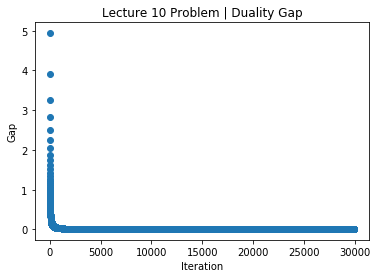

In [171]:
plt.scatter(iters,gaps)
plt.title("Lecture 10 Problem | Duality Gap")
plt.xlabel("Iteration")
plt.ylabel("Gap")
plt.show()

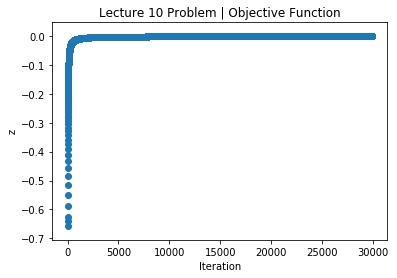

In [172]:
plt.scatter(iters,zs)
plt.title("Lecture 10 Problem | Objective Function")
plt.xlabel("Iteration")
plt.ylabel("z")
plt.show()

# Problem 2

Reproduce the blending problem

In [103]:
import scipy.io

In [174]:
D = scipy.io.loadmat('BLEND.mat')


print("Saving data")
A = D["A"].todense()
b = D["b"].reshape(-1)
c = D["c"].reshape(-1)
lb = D["lbounds"]
ub = D["ubounds"]
N = A.shape[0]
M = A.shape[1]
print("Confirming data shapes")
print("A {}".format(A.shape))
print("b {}".format(b.shape))
print("c {}".format(c.shape))
print("lb {}".format(lb.shape))
print("ub {}".format(ub.shape))

Saving data
Confirming data shapes
A (74, 114)
b (74,)
c (114,)
lb (114, 1)
ub (114, 1)


In [175]:
def primal_interior_feasible(x):
    return (x > 0).all()

def make_feasible(z):
    z[z < 0 ] = max(0.1, z.max())
    return z

def dual_interior_feasible(s):
    return (s > 0).all()

def get_IBFS(dim):
    x0 = np.random.randn(dim)
    x0 = make_feasible(x0)
    return x0

def get_dual(X):
    w = np.linalg.inv(A.dot(X**2).dot(A.T)).dot(A).dot(X**2).dot(c)
    s = c - A.T.dot(w.T).T
    return w, s

def get_duality_gap(x,s):
    return x.dot(s.T)

def interior_point(A0,b0,c0,M0,etol=0.0001,alpha=0.1):
    
    A = A0
    b = b0
    c = c0
    M = M0
    
    # Get IBFS
    x0 = get_IBFS(M)
    
    # Diagonalize
    X0 = np.diag(x0)
    
    # Get dual variables and dual slack
    w0, s0 = get_dual(X0)
    
    # Make dual feasible
    if not dual_interior_feasible(s0):
        s0 = make_feasible(s0)
    
    # Get initial duality gap
    gap = get_duality_gap(x0, s0).tolist()[0][0]
    it = 0
    gaps=[]
    iters=[]
    zs=[]
    while gap > etol:

        # Get primal scaling direction of improvement
        dy = -X0.dot(s0.T)

        # Get next best point
        x0 = x0 + alpha*X0.dot(dy).T

        # Make primal feasible
        if not primal_interior_feasible(x0):
            x0 = make_feasible(x0)

        # Get dual slack
        X0 = np.diag(np.asarray(x0)[0])
        w0, s0 = get_dual(X0)

        # Make dual feasible
        if not dual_interior_feasible(s0):
            s0 = make_feasible(s0)

        # Get duality gap
        gap = get_duality_gap(x0, s0).tolist()[0][0]
        it += 1
        z=x.dot(c)
        
        # Record data
        gaps.append(gap)
        iters.append(it)
        zs.append(z)
        print("Iteration {}, Duality Gap {}".format(it, gap))


    print("Final Duality Gap {}".format(gap))
    print("Primal Variables {}".format(x0))
    print("Dual Slack Variables {}".format(s0))
    print("Dual Variables {}".format(w0))
    return x0,w0,s0,gaps,iters,zs

x0,w0,s0,gaps,iters,zs=interior_point(A,b,c,M,etol=0.01)


Iteration 1, Duality Gap 53.48180740909718
Iteration 2, Duality Gap 44.948707018658816
Iteration 3, Duality Gap 43.66704212931952
Iteration 4, Duality Gap 45.88775738590051
Iteration 5, Duality Gap 41.35990516806081
Iteration 6, Duality Gap 38.03222776549496
Iteration 7, Duality Gap 35.35501795820957
Iteration 8, Duality Gap 33.849795102008756
Iteration 9, Duality Gap 31.865448311447942
Iteration 10, Duality Gap 30.13081106095227
Iteration 11, Duality Gap 28.595308841354818
Iteration 12, Duality Gap 27.22264320350017
Iteration 13, Duality Gap 25.985681593888785
Iteration 14, Duality Gap 26.931116202904775
Iteration 15, Duality Gap 25.20750792407283
Iteration 16, Duality Gap 23.91326213401484
Iteration 17, Duality Gap 24.097137540585734
Iteration 18, Duality Gap 22.98815483557225
Iteration 19, Duality Gap 22.26093192471705
Iteration 20, Duality Gap 24.082336892581445
Iteration 21, Duality Gap 22.5363367001142
Iteration 22, Duality Gap 21.828990737815424
Iteration 23, Duality Gap 20.8816

Iteration 315, Duality Gap 2.3771707953682055
Iteration 316, Duality Gap 2.3676350518362193
Iteration 317, Duality Gap 2.3582305272539847
Iteration 318, Duality Gap 2.3489525099406343
Iteration 319, Duality Gap 2.3397965691695393
Iteration 320, Duality Gap 2.3307585322783675
Iteration 321, Duality Gap 2.321834466163098
Iteration 322, Duality Gap 2.3130206575480536
Iteration 323, Duality Gap 2.304313599918366
Iteration 324, Duality Gap 2.2957099748043763
Iteration 325, Duality Gap 2.2872066405580114
Iteration 326, Duality Gap 2.2788006181480114
Iteration 327, Duality Gap 2.27048908217399
Iteration 328, Duality Gap 2.2622693500472426
Iteration 329, Duality Gap 2.254138869769955
Iteration 330, Duality Gap 2.2460952140648986
Iteration 331, Duality Gap 2.2381360716373826
Iteration 332, Duality Gap 2.23025923773908
Iteration 333, Duality Gap 2.222462611531488
Iteration 334, Duality Gap 2.2147441837263115
Iteration 335, Duality Gap 2.207102038108883
Iteration 336, Duality Gap 2.19953433996158

Iteration 628, Duality Gap 1.2130480760524165
Iteration 629, Duality Gap 1.2109457741667788
Iteration 630, Duality Gap 1.2088514947692597
Iteration 631, Duality Gap 1.2067651869841418
Iteration 632, Duality Gap 1.2046867908104621
Iteration 633, Duality Gap 1.2026162612125393
Iteration 634, Duality Gap 1.2005535438573904
Iteration 635, Duality Gap 1.1984985857866572
Iteration 636, Duality Gap 1.1964513383245081
Iteration 637, Duality Gap 1.1944117498251123
Iteration 638, Duality Gap 1.1923797727410972
Iteration 639, Duality Gap 1.190355355934376
Iteration 640, Duality Gap 1.1883384505097208
Iteration 641, Duality Gap 1.1863290123373484
Iteration 642, Duality Gap 1.1843269883794403
Iteration 643, Duality Gap 1.182332335525431
Iteration 644, Duality Gap 1.180345004481612
Iteration 645, Duality Gap 1.1783649500350508
Iteration 646, Duality Gap 1.1763921279178566
Iteration 647, Duality Gap 1.1744264881540665
Iteration 648, Duality Gap 1.172467992375592
Iteration 649, Duality Gap 1.170516589

Iteration 905, Duality Gap 0.862312136864783
Iteration 906, Duality Gap 0.8609750382160639
Iteration 907, Duality Gap 0.8596461677996641
Iteration 908, Duality Gap 0.8583247556879198
Iteration 909, Duality Gap 0.8570104857343445
Iteration 910, Duality Gap 0.8557041184072907
Iteration 911, Duality Gap 0.854404442482799
Iteration 912, Duality Gap 0.8531119870524004
Iteration 913, Duality Gap 0.8518267329471674
Iteration 914, Duality Gap 0.8505483952958945
Iteration 915, Duality Gap 0.8492770862008516
Iteration 916, Duality Gap 0.8480121399702125
Iteration 917, Duality Gap 0.8467543379037366
Iteration 918, Duality Gap 0.8455030898000613
Iteration 919, Duality Gap 0.8442579000375889
Iteration 920, Duality Gap 0.8430191600164325
Iteration 921, Duality Gap 0.8417869438576409
Iteration 922, Duality Gap 0.8405609466810722
Iteration 923, Duality Gap 0.8393408500437483
Iteration 924, Duality Gap 0.83812705005687
Iteration 925, Duality Gap 0.8369188662117408
Iteration 926, Duality Gap 0.835716999

Iteration 1205, Duality Gap 0.6164141371526326
Iteration 1206, Duality Gap 0.6158641292220364
Iteration 1207, Duality Gap 0.6153153799769464
Iteration 1208, Duality Gap 0.6147676752007153
Iteration 1209, Duality Gap 0.6142211883426039
Iteration 1210, Duality Gap 0.6136755200839931
Iteration 1211, Duality Gap 0.6131306864376006
Iteration 1212, Duality Gap 0.6125877174131573
Iteration 1213, Duality Gap 0.6120451909160172
Iteration 1214, Duality Gap 0.6115032812705641
Iteration 1215, Duality Gap 0.6109631753702577
Iteration 1216, Duality Gap 0.6104239012713911
Iteration 1217, Duality Gap 0.6098857644621729
Iteration 1218, Duality Gap 0.6093486549565508
Iteration 1219, Duality Gap 0.6088123850542373
Iteration 1220, Duality Gap 0.6082770673942426
Iteration 1221, Duality Gap 0.6077433656159326
Iteration 1222, Duality Gap 0.6072100339860957
Iteration 1223, Duality Gap 0.606677963986587
Iteration 1224, Duality Gap 0.6061464818230832
Iteration 1225, Duality Gap 0.6056166239723898
Iteration 1226

Iteration 1535, Duality Gap 0.46477045660085714
Iteration 1536, Duality Gap 0.4644573110683661
Iteration 1537, Duality Gap 0.4641450600794669
Iteration 1538, Duality Gap 0.46383210703015787
Iteration 1539, Duality Gap 0.4635204801947361
Iteration 1540, Duality Gap 0.46320922768815187
Iteration 1541, Duality Gap 0.46289751581820293
Iteration 1542, Duality Gap 0.4625868403244789
Iteration 1543, Duality Gap 0.46227692830373623
Iteration 1544, Duality Gap 0.4619669315807162
Iteration 1545, Duality Gap 0.46165762011367484
Iteration 1546, Duality Gap 0.4613482527556131
Iteration 1547, Duality Gap 0.4610394997475562
Iteration 1548, Duality Gap 0.46073132679138606
Iteration 1549, Duality Gap 0.46042443433989577
Iteration 1550, Duality Gap 0.4601161484787369
Iteration 1551, Duality Gap 0.45980959449413894
Iteration 1552, Duality Gap 0.4595032475354194
Iteration 1553, Duality Gap 0.4591973506092425
Iteration 1554, Duality Gap 0.4588912756254542
Iteration 1555, Duality Gap 0.4585864541585073
Iter

Iteration 1874, Duality Gap 0.37859264395114267
Iteration 1875, Duality Gap 0.3783876794144686
Iteration 1876, Duality Gap 0.3781811263661268
Iteration 1877, Duality Gap 0.37797516990001045
Iteration 1878, Duality Gap 0.37776950768672957
Iteration 1879, Duality Gap 0.3775633536061165
Iteration 1880, Duality Gap 0.37735875354578935
Iteration 1881, Duality Gap 0.37715452463398846
Iteration 1882, Duality Gap 0.3769505198038009
Iteration 1883, Duality Gap 0.3767451066556913
Iteration 1884, Duality Gap 0.37654091747650015
Iteration 1885, Duality Gap 0.3763369795040521
Iteration 1886, Duality Gap 0.3761322418918306
Iteration 1887, Duality Gap 0.37592960260687747
Iteration 1888, Duality Gap 0.3757269986825882
Iteration 1889, Duality Gap 0.37552283988198387
Iteration 1890, Duality Gap 0.3753208388331075
Iteration 1891, Duality Gap 0.37511745338893243
Iteration 1892, Duality Gap 0.3749154946951857
Iteration 1893, Duality Gap 0.37471324408170614
Iteration 1894, Duality Gap 0.3745111447437121
Ite

Iteration 2194, Duality Gap 0.3224400525268366
Iteration 2195, Duality Gap 0.3222917135749872
Iteration 2196, Duality Gap 0.3221429653108813
Iteration 2197, Duality Gap 0.32199506914100096
Iteration 2198, Duality Gap 0.3218440396657464
Iteration 2199, Duality Gap 0.3216978464534465
Iteration 2200, Duality Gap 0.32154997464731594
Iteration 2201, Duality Gap 0.32140061509982565
Iteration 2202, Duality Gap 0.32125195511021787
Iteration 2203, Duality Gap 0.32110355045757666
Iteration 2204, Duality Gap 0.3209553711994237
Iteration 2205, Duality Gap 0.32080826353636815
Iteration 2206, Duality Gap 0.3206603817615855
Iteration 2207, Duality Gap 0.3205129319851161
Iteration 2208, Duality Gap 0.32036568479257765
Iteration 2209, Duality Gap 0.3202183800005971
Iteration 2210, Duality Gap 0.3200714484793085
Iteration 2211, Duality Gap 0.319923955787408
Iteration 2212, Duality Gap 0.31977719232998914
Iteration 2213, Duality Gap 0.319629452763749
Iteration 2214, Duality Gap 0.31948384717442513
Iterat

Iteration 2513, Duality Gap 0.33960375067955406
Iteration 2514, Duality Gap 0.35189098799258456
Iteration 2515, Duality Gap 0.33869688172476886
Iteration 2516, Duality Gap 0.33824602501242634
Iteration 2517, Duality Gap 0.3378017740724355
Iteration 2518, Duality Gap 0.3373605530782853
Iteration 2519, Duality Gap 0.33692365151562487
Iteration 2520, Duality Gap 0.33649042993169576
Iteration 2521, Duality Gap 0.33606075394924084
Iteration 2522, Duality Gap 0.3356358498528301
Iteration 2523, Duality Gap 0.27986078977489925
Iteration 2524, Duality Gap 0.33510153504859763
Iteration 2525, Duality Gap 0.3346828582766499
Iteration 2526, Duality Gap 0.3342679617686528
Iteration 2527, Duality Gap 0.33385720680561437
Iteration 2528, Duality Gap 0.3334492073564398
Iteration 2529, Duality Gap 0.3330419705026548
Iteration 2530, Duality Gap 0.3326415091335377
Iteration 2531, Duality Gap 0.33224253447057084
Iteration 2532, Duality Gap 0.3318473798767413
Iteration 2533, Duality Gap 0.33145618439127733
I

Iteration 2857, Duality Gap 0.2592214156055367
Iteration 2858, Duality Gap 0.2591001740502831
Iteration 2859, Duality Gap 0.25897878011833186
Iteration 2860, Duality Gap 0.25885528545785697
Iteration 2861, Duality Gap 0.25873222290640774
Iteration 2862, Duality Gap 0.27125706089193297
Iteration 2863, Duality Gap 0.25848945372170695
Iteration 2864, Duality Gap 0.2583697002043281
Iteration 2865, Duality Gap 0.258248369838646
Iteration 2866, Duality Gap 0.2581271252055774
Iteration 2867, Duality Gap 0.2580072125149687
Iteration 2868, Duality Gap 0.25788688612488697
Iteration 2869, Duality Gap 0.2577656467701903
Iteration 2870, Duality Gap 0.2576445927380523
Iteration 2871, Duality Gap 0.25752417717760134
Iteration 2872, Duality Gap 0.2574046329420099
Iteration 2873, Duality Gap 0.25728546045920453
Iteration 2874, Duality Gap 0.25716612870979905
Iteration 2875, Duality Gap 0.25704843199738353
Iteration 2876, Duality Gap 0.25692993711921014
Iteration 2877, Duality Gap 0.25680931109666416
It

Iteration 3130, Duality Gap 0.23138499251901204
Iteration 3131, Duality Gap 0.23129732022309124
Iteration 3132, Duality Gap 0.23121311093107172
Iteration 3133, Duality Gap 0.23112607283272518
Iteration 3134, Duality Gap 0.23103887632119804
Iteration 3135, Duality Gap 0.23095246457635438
Iteration 3136, Duality Gap 0.2308648143071054
Iteration 3137, Duality Gap 0.230781956193258
Iteration 3138, Duality Gap 0.23069605737804982
Iteration 3139, Duality Gap 0.23060988768945537
Iteration 3140, Duality Gap 0.2305229395095049
Iteration 3141, Duality Gap 0.2304376307455827
Iteration 3142, Duality Gap 0.23035174148102533
Iteration 3143, Duality Gap 0.23026591386002399
Iteration 3144, Duality Gap 0.2301827081055818
Iteration 3145, Duality Gap 0.23009806979723196
Iteration 3146, Duality Gap 0.23001073665110056
Iteration 3147, Duality Gap 0.22992375076473887
Iteration 3148, Duality Gap 0.2298399233626286
Iteration 3149, Duality Gap 0.2297531068587968
Iteration 3150, Duality Gap 0.229669997914306
It

Iteration 3449, Duality Gap 0.21930737043975185
Iteration 3450, Duality Gap 0.20727696589283715
Iteration 3451, Duality Gap 0.20721300652536456
Iteration 3452, Duality Gap 0.207144628855159
Iteration 3453, Duality Gap 0.20708135355742974
Iteration 3454, Duality Gap 0.20701603234183108
Iteration 3455, Duality Gap 0.20694845617985927
Iteration 3456, Duality Gap 0.20688442023360637
Iteration 3457, Duality Gap 0.2068157032916447
Iteration 3458, Duality Gap 0.21870175329038688
Iteration 3459, Duality Gap 0.2186201048759442
Iteration 3460, Duality Gap 0.20661762022091132
Iteration 3461, Duality Gap 0.20655755464323572
Iteration 3462, Duality Gap 0.20648998876262215
Iteration 3463, Duality Gap 0.20642425676839632
Iteration 3464, Duality Gap 0.20635944793532696
Iteration 3465, Duality Gap 0.20629334584883482
Iteration 3466, Duality Gap 0.20622813851976388
Iteration 3467, Duality Gap 0.2061614141931208
Iteration 3468, Duality Gap 0.20609662713301907
Iteration 3469, Duality Gap 0.206032938933708

Iteration 3782, Duality Gap 0.19888548189680022
Iteration 3783, Duality Gap 0.19882082354553104
Iteration 3784, Duality Gap 0.18757066486287582
Iteration 3785, Duality Gap 0.18751664110601735
Iteration 3786, Duality Gap 0.1986496853128188
Iteration 3787, Duality Gap 0.19858423274756318
Iteration 3788, Duality Gap 0.18735709936055414
Iteration 3789, Duality Gap 0.18730298702167875
Iteration 3790, Duality Gap 0.19841289612628538
Iteration 3791, Duality Gap 0.18720328415088017
Iteration 3792, Duality Gap 0.18714994521144712
Iteration 3793, Duality Gap 0.19824320246496674
Iteration 3794, Duality Gap 0.19817750890050612
Iteration 3795, Duality Gap 0.18699105114346679
Iteration 3796, Duality Gap 0.18693761346010712
Iteration 3797, Duality Gap 0.18688554682798328
Iteration 3798, Duality Gap 0.18683361920504876
Iteration 3799, Duality Gap 0.18677938237278546
Iteration 3800, Duality Gap 0.19785070895858958
Iteration 3801, Duality Gap 0.18667419028500915
Iteration 3802, Duality Gap 0.18662413195

Iteration 4110, Duality Gap 0.16943030734045028
Iteration 4111, Duality Gap 0.16938462643892305
Iteration 4112, Duality Gap 0.1693419893790618
Iteration 4113, Duality Gap 0.16929792086547224
Iteration 4114, Duality Gap 0.16925780981248678
Iteration 4115, Duality Gap 0.16921204040853696
Iteration 4116, Duality Gap 0.1691707255308964
Iteration 4117, Duality Gap 0.1794664290727751
Iteration 4118, Duality Gap 0.16908255170942893
Iteration 4119, Duality Gap 0.1690420073902512
Iteration 4120, Duality Gap 0.16899870600798883
Iteration 4121, Duality Gap 0.16895598783410426
Iteration 4122, Duality Gap 0.16891022396372618
Iteration 4123, Duality Gap 0.1688671757468786
Iteration 4124, Duality Gap 0.1688239829140803
Iteration 4125, Duality Gap 0.16878463665932056
Iteration 4126, Duality Gap 0.16873913962720355
Iteration 4127, Duality Gap 0.1790258940475173
Iteration 4128, Duality Gap 0.16865348028069083
Iteration 4129, Duality Gap 0.168609340748684
Iteration 4130, Duality Gap 0.1788847304942967
It

Iteration 4451, Duality Gap 0.15590125549701728
Iteration 4452, Duality Gap 0.15586244216422274
Iteration 4453, Duality Gap 0.16515933503662417
Iteration 4454, Duality Gap 0.15578638674613687
Iteration 4455, Duality Gap 0.1557545541115944
Iteration 4456, Duality Gap 0.16503999780003797
Iteration 4457, Duality Gap 0.1649932686997299
Iteration 4458, Duality Gap 0.16495068468307977
Iteration 4459, Duality Gap 0.15560415930022223
Iteration 4460, Duality Gap 0.15556834704724293
Iteration 4461, Duality Gap 0.15553079293145186
Iteration 4462, Duality Gap 0.1554982547268691
Iteration 4463, Duality Gap 0.15546372040106382
Iteration 4464, Duality Gap 0.155424358315416
Iteration 4465, Duality Gap 0.15538800782009193
Iteration 4466, Duality Gap 0.15535227182615685
Iteration 4467, Duality Gap 0.15532055030875228
Iteration 4468, Duality Gap 0.16458163185644775
Iteration 4469, Duality Gap 0.15524361982189067
Iteration 4470, Duality Gap 0.1644974701435638
Iteration 4471, Duality Gap 0.1551773570898617

Iteration 4765, Duality Gap 0.15381803334785477
Iteration 4766, Duality Gap 0.14523827924630672
Iteration 4767, Duality Gap 0.1452038530535509
Iteration 4768, Duality Gap 0.14517420922334595
Iteration 4769, Duality Gap 0.1451461048156688
Iteration 4770, Duality Gap 0.1536550143599945
Iteration 4771, Duality Gap 0.1536152726657226
Iteration 4772, Duality Gap 0.15357645061276273
Iteration 4773, Duality Gap 0.15353702762705254
Iteration 4774, Duality Gap 0.14498381613539832
Iteration 4775, Duality Gap 0.14495508253494396
Iteration 4776, Duality Gap 0.14492710879897214
Iteration 4777, Duality Gap 0.14489197128368447
Iteration 4778, Duality Gap 0.15337432039427168
Iteration 4779, Duality Gap 0.15333520487543034
Iteration 4780, Duality Gap 0.15329609318504403
Iteration 4781, Duality Gap 0.14476929211426376
Iteration 4782, Duality Gap 0.15322608433349114
Iteration 4783, Duality Gap 0.1447023636003249
Iteration 4784, Duality Gap 0.14467588349818739
Iteration 4785, Duality Gap 0.144645403650993

Iteration 4985, Duality Gap 0.14664651155132732
Iteration 4986, Duality Gap 0.13863773030509546
Iteration 4987, Duality Gap 0.13860578039547367
Iteration 4988, Duality Gap 0.13858336736122834
Iteration 4989, Duality Gap 0.13854798782601424
Iteration 4990, Duality Gap 0.14649462086717868
Iteration 4991, Duality Gap 0.13848801880922668
Iteration 4992, Duality Gap 0.1384636778496144
Iteration 4993, Duality Gap 0.13843368015832044
Iteration 4994, Duality Gap 0.13840615555778585
Iteration 4995, Duality Gap 0.13838419428217574
Iteration 4996, Duality Gap 0.14632076782257836
Iteration 4997, Duality Gap 0.13832346803726725
Iteration 4998, Duality Gap 0.14625581901459944
Iteration 4999, Duality Gap 0.13826371547902888
Iteration 5000, Duality Gap 0.13823718135748542
Iteration 5001, Duality Gap 0.13820624503993045
Iteration 5002, Duality Gap 0.13818107056951306
Iteration 5003, Duality Gap 0.13815090503184133
Iteration 5004, Duality Gap 0.13812173654833454
Iteration 5005, Duality Gap 0.14604947276

Iteration 5309, Duality Gap 0.12998322239626675
Iteration 5310, Duality Gap 0.12995368456598216
Iteration 5311, Duality Gap 0.12993065549397004
Iteration 5312, Duality Gap 0.12990896308873523
Iteration 5313, Duality Gap 0.12988355704505417
Iteration 5314, Duality Gap 0.12985413001266805
Iteration 5315, Duality Gap 0.12983451466662743
Iteration 5316, Duality Gap 0.12980076029722332
Iteration 5317, Duality Gap 0.1370483924473132
Iteration 5318, Duality Gap 0.13701816981845882
Iteration 5319, Duality Gap 0.12972624470530858
Iteration 5320, Duality Gap 0.13696594260406975
Iteration 5321, Duality Gap 0.1369311549031058
Iteration 5322, Duality Gap 0.12965455460250053
Iteration 5323, Duality Gap 0.1296294716407645
Iteration 5324, Duality Gap 0.12960063895742313
Iteration 5325, Duality Gap 0.1368275406392942
Iteration 5326, Duality Gap 0.12955257762402056
Iteration 5327, Duality Gap 0.1295283149925187
Iteration 5328, Duality Gap 0.12950660729436442
Iteration 5329, Duality Gap 0.136723817842425

Iteration 5558, Duality Gap 0.13082580306154246
Iteration 5559, Duality Gap 0.1307999655063767
Iteration 5560, Duality Gap 0.1239760513118548
Iteration 5561, Duality Gap 0.12394674060462227
Iteration 5562, Duality Gap 0.13072836827607953
Iteration 5563, Duality Gap 0.12390512646062385
Iteration 5564, Duality Gap 0.13067646236449706
Iteration 5565, Duality Gap 0.12385795527052414
Iteration 5566, Duality Gap 0.13062505847655076
Iteration 5567, Duality Gap 0.12381294808506721
Iteration 5568, Duality Gap 0.12379027097187148
Iteration 5569, Duality Gap 0.12376442804368801
Iteration 5570, Duality Gap 0.13052970033836864
Iteration 5571, Duality Gap 0.12371911874829275
Iteration 5572, Duality Gap 0.13048090240512858
Iteration 5573, Duality Gap 0.1304524966872828
Iteration 5574, Duality Gap 0.13042593272991398
Iteration 5575, Duality Gap 0.12363135797367242
Iteration 5576, Duality Gap 0.13037650319641927
Iteration 5577, Duality Gap 0.12358348177377676
Iteration 5578, Duality Gap 0.1235688421339

Iteration 5845, Duality Gap 0.11780225126536142
Iteration 5846, Duality Gap 0.12409137703496458
Iteration 5847, Duality Gap 0.11776614959853676
Iteration 5848, Duality Gap 0.1240463262550775
Iteration 5849, Duality Gap 0.12402154817616443
Iteration 5850, Duality Gap 0.12399590583764322
Iteration 5851, Duality Gap 0.11767770828501264
Iteration 5852, Duality Gap 0.11765750591995722
Iteration 5853, Duality Gap 0.11763244976078875
Iteration 5854, Duality Gap 0.11762317337683952
Iteration 5855, Duality Gap 0.11758918970465249
Iteration 5856, Duality Gap 0.11757272193630888
Iteration 5857, Duality Gap 0.12384892525553032
Iteration 5858, Duality Gap 0.1175323116552063
Iteration 5859, Duality Gap 0.11751029813603546
Iteration 5860, Duality Gap 0.12378401806416098
Iteration 5861, Duality Gap 0.1174754086133724
Iteration 5862, Duality Gap 0.11746067469088835
Iteration 5863, Duality Gap 0.11742734012487901
Iteration 5864, Duality Gap 0.11740989570695079
Iteration 5865, Duality Gap 0.1173817620911

Iteration 6153, Duality Gap 0.11178811388105758
Iteration 6154, Duality Gap 0.11177100868339317
Iteration 6155, Duality Gap 0.11175724304357317
Iteration 6156, Duality Gap 0.1117293729078502
Iteration 6157, Duality Gap 0.11171214115318887
Iteration 6158, Duality Gap 0.11753319197678448
Iteration 6159, Duality Gap 0.11751177768268894
Iteration 6160, Duality Gap 0.11165961866809715
Iteration 6161, Duality Gap 0.11747080836481882
Iteration 6162, Duality Gap 0.11162788945359045
Iteration 6163, Duality Gap 0.11160381975018085
Iteration 6164, Duality Gap 0.11741326604108435
Iteration 6165, Duality Gap 0.111567790869082
Iteration 6166, Duality Gap 0.11154417104502005
Iteration 6167, Duality Gap 0.11735216385668254
Iteration 6168, Duality Gap 0.11733309097965325
Iteration 6169, Duality Gap 0.11731053753779443
Iteration 6170, Duality Gap 0.11147537116759842
Iteration 6171, Duality Gap 0.11144866965051864
Iteration 6172, Duality Gap 0.11143250452446621
Iteration 6173, Duality Gap 0.1114203358143

Iteration 6358, Duality Gap 0.1136626037774301
Iteration 6359, Duality Gap 0.11364403462705036
Iteration 6360, Duality Gap 0.10807797662937191
Iteration 6361, Duality Gap 0.10806735477869517
Iteration 6362, Duality Gap 0.10804399504577139
Iteration 6363, Duality Gap 0.11356973663243689
Iteration 6364, Duality Gap 0.10801155556603108
Iteration 6365, Duality Gap 0.10799434009027171
Iteration 6366, Duality Gap 0.1079758929151932
Iteration 6367, Duality Gap 0.11349556503054657
Iteration 6368, Duality Gap 0.11347799027011378
Iteration 6369, Duality Gap 0.10792450088022379
Iteration 6370, Duality Gap 0.11343871832756186
Iteration 6371, Duality Gap 0.11341879120304996
Iteration 6372, Duality Gap 0.11339666862801415
Iteration 6373, Duality Gap 0.10785738549874582
Iteration 6374, Duality Gap 0.11336259777518663
Iteration 6375, Duality Gap 0.10781972301349388
Iteration 6376, Duality Gap 0.11332317297535865
Iteration 6377, Duality Gap 0.10778605185038381
Iteration 6378, Duality Gap 0.113286688462

Iteration 6701, Duality Gap 0.10248897230200216
Iteration 6702, Duality Gap 0.10247514396361569
Iteration 6703, Duality Gap 0.10759461413137514
Iteration 6704, Duality Gap 0.10757695108521144
Iteration 6705, Duality Gap 0.10242660711641362
Iteration 6706, Duality Gap 0.10241060963226095
Iteration 6707, Duality Gap 0.10752755558780938
Iteration 6708, Duality Gap 0.10238166588102146
Iteration 6709, Duality Gap 0.10236653399605763
Iteration 6710, Duality Gap 0.10747912549035371
Iteration 6711, Duality Gap 0.10746046578912949
Iteration 6712, Duality Gap 0.10744141792981826
Iteration 6713, Duality Gap 0.10230180341214472
Iteration 6714, Duality Gap 0.10228624839566651
Iteration 6715, Duality Gap 0.10226618138303481
Iteration 6716, Duality Gap 0.1022580648297379
Iteration 6717, Duality Gap 0.10224576801098367
Iteration 6718, Duality Gap 0.10222307540695634
Iteration 6719, Duality Gap 0.10733139959164233
Iteration 6720, Duality Gap 0.10220114699623734
Iteration 6721, Duality Gap 0.10729722438

Iteration 7047, Duality Gap 0.09737731448337364
Iteration 7048, Duality Gap 0.09736063363788143
Iteration 7049, Duality Gap 0.10212825583606666
Iteration 7050, Duality Gap 0.10211245450679471
Iteration 7051, Duality Gap 0.09731825130783604
Iteration 7052, Duality Gap 0.09730413504035162
Iteration 7053, Duality Gap 0.09729091009731056
Iteration 7054, Duality Gap 0.09727907203219868
Iteration 7055, Duality Gap 0.10203877793381685
Iteration 7056, Duality Gap 0.10202018799344326
Iteration 7057, Duality Gap 0.09723856926196969
Iteration 7058, Duality Gap 0.10199478595498689
Iteration 7059, Duality Gap 0.0972106851133839
Iteration 7060, Duality Gap 0.10196264912021166
Iteration 7061, Duality Gap 0.10194557796547375
Iteration 7062, Duality Gap 0.09716353998746192
Iteration 7063, Duality Gap 0.10191499519428301
Iteration 7064, Duality Gap 0.1018982699837783
Iteration 7065, Duality Gap 0.09712509530331202
Iteration 7066, Duality Gap 0.09710945299839827
Iteration 7067, Duality Gap 0.097098821384

Iteration 7338, Duality Gap 0.09345429030195024
Iteration 7339, Duality Gap 0.09797486183345527
Iteration 7340, Duality Gap 0.09342810234303059
Iteration 7341, Duality Gap 0.09341612195825366
Iteration 7342, Duality Gap 0.09793406668248102
Iteration 7343, Duality Gap 0.09339949922298493
Iteration 7344, Duality Gap 0.09790614932579278
Iteration 7345, Duality Gap 0.09337126114587463
Iteration 7346, Duality Gap 0.09335388325369204
Iteration 7347, Duality Gap 0.09334952434573021
Iteration 7348, Duality Gap 0.09785215895918173
Iteration 7349, Duality Gap 0.09331956982380124
Iteration 7350, Duality Gap 0.0978216970849384
Iteration 7351, Duality Gap 0.09780804051232338
Iteration 7352, Duality Gap 0.09328049584399778
Iteration 7353, Duality Gap 0.09326931210642117
Iteration 7354, Duality Gap 0.09777022954590275
Iteration 7355, Duality Gap 0.09775633843165879
Iteration 7356, Duality Gap 0.09773908707179087
Iteration 7357, Duality Gap 0.09321335227080377
Iteration 7358, Duality Gap 0.09320423875

Iteration 7618, Duality Gap 0.09426468902216847
Iteration 7619, Duality Gap 0.08996527625082706
Iteration 7620, Duality Gap 0.08995164482513733
Iteration 7621, Duality Gap 0.08994461870527977
Iteration 7622, Duality Gap 0.08993038975559028
Iteration 7623, Duality Gap 0.08991945715221948
Iteration 7624, Duality Gap 0.09419167453332182
Iteration 7625, Duality Gap 0.08989467267205237
Iteration 7626, Duality Gap 0.09416553354335444
Iteration 7627, Duality Gap 0.0941528547734489
Iteration 7628, Duality Gap 0.09413967999915965
Iteration 7629, Duality Gap 0.09412455929305082
Iteration 7630, Duality Gap 0.09410937898750918
Iteration 7631, Duality Gap 0.08982056308405642
Iteration 7632, Duality Gap 0.08980542668321775
Iteration 7633, Duality Gap 0.09407170140247582
Iteration 7634, Duality Gap 0.08978154104056048
Iteration 7635, Duality Gap 0.09404720162090867
Iteration 7636, Duality Gap 0.08976068206240752
Iteration 7637, Duality Gap 0.09402425655896368
Iteration 7638, Duality Gap 0.08973709388

Iteration 7822, Duality Gap 0.08759780946067526
Iteration 7823, Duality Gap 0.0875922415492745
Iteration 7824, Duality Gap 0.09170129284297981
Iteration 7825, Duality Gap 0.09168530519737471
Iteration 7826, Duality Gap 0.09167465590276815
Iteration 7827, Duality Gap 0.08754115379651148
Iteration 7828, Duality Gap 0.08753174355893734
Iteration 7829, Duality Gap 0.08751679599861593
Iteration 7830, Duality Gap 0.08750306587578807
Iteration 7831, Duality Gap 0.09161757827831495
Iteration 7832, Duality Gap 0.08748911097605885
Iteration 7833, Duality Gap 0.08747330228087516
Iteration 7834, Duality Gap 0.09157989255064607
Iteration 7835, Duality Gap 0.09156598939055507
Iteration 7836, Duality Gap 0.08743853269915865
Iteration 7837, Duality Gap 0.09154306189671271
Iteration 7838, Duality Gap 0.08741175857125998
Iteration 7839, Duality Gap 0.08740339204712788
Iteration 7840, Duality Gap 0.09150619213577842
Iteration 7841, Duality Gap 0.08738170151728583
Iteration 7842, Duality Gap 0.08737735136

Iteration 8056, Duality Gap 0.08501727988198443
Iteration 8057, Duality Gap 0.08502217715867558
Iteration 8058, Duality Gap 0.08895088891561984
Iteration 8059, Duality Gap 0.08499609816767237
Iteration 8060, Duality Gap 0.08892742302393622
Iteration 8061, Duality Gap 0.08496595115073408
Iteration 8062, Duality Gap 0.08890422219462624
Iteration 8063, Duality Gap 0.0849479218393177
Iteration 8064, Duality Gap 0.08888444546786604
Iteration 8065, Duality Gap 0.08492708669787899
Iteration 8066, Duality Gap 0.08886155056254397
Iteration 8067, Duality Gap 0.08884973050772904
Iteration 8068, Duality Gap 0.08489646379937149
Iteration 8069, Duality Gap 0.08882487916230987
Iteration 8070, Duality Gap 0.7901119863423334
Iteration 8071, Duality Gap 0.08880058995306085
Iteration 8072, Duality Gap 0.0848544810964875
Iteration 8073, Duality Gap 0.08484593095422024
Iteration 8074, Duality Gap 0.08483795066977065
Iteration 8075, Duality Gap 0.08482780935930806
Iteration 8076, Duality Gap 0.0848123231894

Iteration 8367, Duality Gap 0.0855771631070541
Iteration 8368, Duality Gap 0.0818112053474074
Iteration 8369, Duality Gap 0.08555377208609286
Iteration 8370, Duality Gap 0.08554024830792606
Iteration 8371, Duality Gap 0.08178038201111773
Iteration 8372, Duality Gap 0.08177046102860319
Iteration 8373, Duality Gap 0.08176160507714228
Iteration 8374, Duality Gap 0.08175591039893085
Iteration 8375, Duality Gap 0.08174283212164689
Iteration 8376, Duality Gap 0.08547984685349791
Iteration 8377, Duality Gap 0.08171781101363955
Iteration 8378, Duality Gap 0.08546359085320546
Iteration 8379, Duality Gap 0.08170448382820858
Iteration 8380, Duality Gap 0.08543948858882443
Iteration 8381, Duality Gap 0.08168029388503989
Iteration 8382, Duality Gap 0.08167861851558944
Iteration 8383, Duality Gap 0.08540818700175642
Iteration 8384, Duality Gap 0.08540016448876515
Iteration 8385, Duality Gap 0.08164776529684105
Iteration 8386, Duality Gap 0.08163257889205719
Iteration 8387, Duality Gap 0.081622487884

Iteration 8651, Duality Gap 0.08268603150291318
Iteration 8652, Duality Gap 0.0790933124340374
Iteration 8653, Duality Gap 0.08267393213349677
Iteration 8654, Duality Gap 0.07907387856162429
Iteration 8655, Duality Gap 0.07907282701943398
Iteration 8656, Duality Gap 0.07906636051465032
Iteration 8657, Duality Gap 0.07905031160864878
Iteration 8658, Duality Gap 0.0826206218988292
Iteration 8659, Duality Gap 0.08261104596707972
Iteration 8660, Duality Gap 0.07902843739038487
Iteration 8661, Duality Gap 0.07902013881179126
Iteration 8662, Duality Gap 0.0825813247639721
Iteration 8663, Duality Gap 0.08257507621933628
Iteration 8664, Duality Gap 0.08256165392233349
Iteration 8665, Duality Gap 0.07897307575896051
Iteration 8666, Duality Gap 0.07896335782692224
Iteration 8667, Duality Gap 0.08253443999438642
Iteration 8668, Duality Gap 0.08252219684179157
Iteration 8669, Duality Gap 0.07893549999481364
Iteration 8670, Duality Gap 0.07893198220944009
Iteration 8671, Duality Gap 0.0789172672428

Iteration 8934, Duality Gap 0.07657403786280254
Iteration 8935, Duality Gap 0.07656997486910315
Iteration 8936, Duality Gap 0.07655267552691974
Iteration 8937, Duality Gap 0.07998483311466228
Iteration 8938, Duality Gap 0.07652757923168232
Iteration 8939, Duality Gap 0.07652651906199501
Iteration 8940, Duality Gap 0.07995751621751476
Iteration 8941, Duality Gap 0.07650646669828398
Iteration 8942, Duality Gap 0.07993698806100746
Iteration 8943, Duality Gap 0.07993115772815221
Iteration 8944, Duality Gap 0.07648993805223306
Iteration 8945, Duality Gap 0.07647927782992481
Iteration 8946, Duality Gap 0.07647835352782509
Iteration 8947, Duality Gap 0.07989379872966489
Iteration 8948, Duality Gap 0.07988672046092254
Iteration 8949, Duality Gap 0.3053752006843075
Iteration 8950, Duality Gap 0.0764297568734183
Iteration 8951, Duality Gap 0.07642339992502192
Iteration 8952, Duality Gap 0.07641504069679117
Iteration 8953, Duality Gap 0.07640620044649853
Iteration 8954, Duality Gap 0.076402523748

Iteration 9186, Duality Gap 0.07444598610636785
Iteration 9187, Duality Gap 0.07774121274584217
Iteration 9188, Duality Gap 0.07443247824299828
Iteration 9189, Duality Gap 0.07442272906527175
Iteration 9190, Duality Gap 0.07441475511090372
Iteration 9191, Duality Gap 0.0777115731969772
Iteration 9192, Duality Gap 0.07769743859648151
Iteration 9193, Duality Gap 0.07768594269733523
Iteration 9194, Duality Gap 0.07768107315999517
Iteration 9195, Duality Gap 0.07767298539123857
Iteration 9196, Duality Gap 0.07766212994046602
Iteration 9197, Duality Gap 0.07435055652564516
Iteration 9198, Duality Gap 0.2097343829882382
Iteration 9199, Duality Gap 0.0776360441510568
Iteration 9200, Duality Gap 0.07433342431272408
Iteration 9201, Duality Gap 0.07434109323939303
Iteration 9202, Duality Gap 0.07431671943204912
Iteration 9203, Duality Gap 0.07430529040154173
Iteration 9204, Duality Gap 0.07759374998016083
Iteration 9205, Duality Gap 0.2078498834111137
Iteration 9206, Duality Gap 0.07428580170043

Iteration 9368, Duality Gap 0.07298900910233404
Iteration 9369, Duality Gap 0.07620130903266709
Iteration 9370, Duality Gap 0.07619479602224978
Iteration 9371, Duality Gap 0.07618733193833402
Iteration 9372, Duality Gap 0.5168003602044983
Iteration 9373, Duality Gap 0.07616611961038006
Iteration 9374, Duality Gap 0.07293446997645693
Iteration 9375, Duality Gap 0.07293267431808118
Iteration 9376, Duality Gap 0.07292327309060945
Iteration 9377, Duality Gap 0.07291081105884942
Iteration 9378, Duality Gap 0.0761257818933116
Iteration 9379, Duality Gap 0.07289636923530245
Iteration 9380, Duality Gap 0.07289467326849637
Iteration 9381, Duality Gap 0.07610246327827483
Iteration 9382, Duality Gap 0.49408866029337656
Iteration 9383, Duality Gap 0.07287404724654664
Iteration 9384, Duality Gap 0.07285641164939788
Iteration 9385, Duality Gap 0.07606863164131633
Iteration 9386, Duality Gap 0.0728390144114821
Iteration 9387, Duality Gap 0.18264613002946167
Iteration 9388, Duality Gap 0.0760439304984

Iteration 9619, Duality Gap 0.07105850141930843
Iteration 9620, Duality Gap 0.07105587228535856
Iteration 9621, Duality Gap 0.07415291476822239
Iteration 9622, Duality Gap 0.24172263529283666
Iteration 9623, Duality Gap 0.07413931482445542
Iteration 9624, Duality Gap 0.07102297595885906
Iteration 9625, Duality Gap 0.07102227134301198
Iteration 9626, Duality Gap 0.07100482389109855
Iteration 9627, Duality Gap 0.2357639745581383
Iteration 9628, Duality Gap 0.07099543808841209
Iteration 9629, Duality Gap 0.07098894894249971
Iteration 9630, Duality Gap 0.07408129992894219
Iteration 9631, Duality Gap 0.07097227621143927
Iteration 9632, Duality Gap 0.07407178268217474
Iteration 9633, Duality Gap 0.07095594691967436
Iteration 9634, Duality Gap 0.07094225470136456
Iteration 9635, Duality Gap 0.07094328479708781
Iteration 9636, Duality Gap 0.16245691712097826
Iteration 9637, Duality Gap 0.23608314548974496
Iteration 9638, Duality Gap 0.07402295776254933
Iteration 9639, Duality Gap 0.07091209475

Iteration 9911, Duality Gap 0.068945851941214
Iteration 9912, Duality Gap 0.07191667770158519
Iteration 9913, Duality Gap 0.3989496419776417
Iteration 9914, Duality Gap 0.47273253432972795
Iteration 9915, Duality Gap 0.7326065544836523
Iteration 9916, Duality Gap 0.44320762491197185
Iteration 9917, Duality Gap 0.3600117194706881
Iteration 9918, Duality Gap 0.35170320927840915
Iteration 9919, Duality Gap 0.3408972261114813
Iteration 9920, Duality Gap 0.3334887638444867
Iteration 9921, Duality Gap 0.3264744645560156
Iteration 9922, Duality Gap 0.31982970297408053
Iteration 9923, Duality Gap 0.3135199094251764
Iteration 9924, Duality Gap 0.30752651680014154
Iteration 9925, Duality Gap 0.3048071146611051
Iteration 9926, Duality Gap 0.38244460636277283
Iteration 9927, Duality Gap 0.2941863208773476
Iteration 9928, Duality Gap 0.36864845964742243
Iteration 9929, Duality Gap 0.36324103555617937
Iteration 9930, Duality Gap 0.2769826390044171
Iteration 9931, Duality Gap 0.27265293617567066
Iter

Iteration 10207, Duality Gap 0.09751673474414353
Iteration 10208, Duality Gap 0.09741326754337995
Iteration 10209, Duality Gap 0.0973102773907192
Iteration 10210, Duality Gap 0.10007224520133298
Iteration 10211, Duality Gap 0.21260113768249328
Iteration 10212, Duality Gap 0.09987485136402825
Iteration 10213, Duality Gap 0.21459418638719813
Iteration 10214, Duality Gap 0.15235770413329286
Iteration 10215, Duality Gap 0.16105868736854026
Iteration 10216, Duality Gap 0.09948208089708116
Iteration 10217, Duality Gap 0.09938811481453098
Iteration 10218, Duality Gap 0.15169497086167127
Iteration 10219, Duality Gap 0.15745040681174652
Iteration 10220, Duality Gap 0.1569816631238922
Iteration 10221, Duality Gap 0.14828648837787256
Iteration 10222, Duality Gap 0.0960663942829261
Iteration 10223, Duality Gap 0.09882232284593945
Iteration 10224, Duality Gap 0.0958841409666059
Iteration 10225, Duality Gap 0.1561556792726998
Iteration 10226, Duality Gap 0.15570578450633615
Iteration 10227, Duality 

Iteration 10387, Duality Gap 0.13391630110711553
Iteration 10388, Duality Gap 0.08543303436361196
Iteration 10389, Duality Gap 0.25158204908379783
Iteration 10390, Duality Gap 0.2531312501971267
Iteration 10391, Duality Gap 0.08806216785504209
Iteration 10392, Duality Gap 0.08524563073335564
Iteration 10393, Duality Gap 0.08797172535130979
Iteration 10394, Duality Gap 0.13041012549354783
Iteration 10395, Duality Gap 0.08788207075243473
Iteration 10396, Duality Gap 0.1328841320056384
Iteration 10397, Duality Gap 0.12986474978730803
Iteration 10398, Duality Gap 0.12963854816171894
Iteration 10399, Duality Gap 0.08492487089907298
Iteration 10400, Duality Gap 0.08766836732051529
Iteration 10401, Duality Gap 0.25062695364089926
Iteration 10402, Duality Gap 0.08757683992489126
Iteration 10403, Duality Gap 0.08753456805875973
Iteration 10404, Duality Gap 0.20684995737366396
Iteration 10405, Duality Gap 0.08466568144294256
Iteration 10406, Duality Gap 0.0846234200298773
Iteration 10407, Dualit

Iteration 10652, Duality Gap 0.1971417080980773
Iteration 10653, Duality Gap 0.07701818945196634
Iteration 10654, Duality Gap 0.09719547761066386
Iteration 10655, Duality Gap 0.19620836799494046
Iteration 10656, Duality Gap 0.19657768935257536
Iteration 10657, Duality Gap 0.11406916352779038
Iteration 10658, Duality Gap 0.07691534135029056
Iteration 10659, Duality Gap 0.1971414475441759
Iteration 10660, Duality Gap 0.07685911918295069
Iteration 10661, Duality Gap 0.11374405543264579
Iteration 10662, Duality Gap 0.07949550885581916
Iteration 10663, Duality Gap 0.07678514594080535
Iteration 10664, Duality Gap 0.16199660834677124
Iteration 10665, Duality Gap 0.11498872281390835
Iteration 10666, Duality Gap 0.07941497231847831
Iteration 10667, Duality Gap 0.07938625372726894
Iteration 10668, Duality Gap 0.1134640922789891
Iteration 10669, Duality Gap 0.14875960074991185
Iteration 10670, Duality Gap 0.19505094346889934
Iteration 10671, Duality Gap 0.0792969519586226
Iteration 10672, Duality

Iteration 10923, Duality Gap 0.14628942389475053
Iteration 10924, Duality Gap 0.07205788068483812
Iteration 10925, Duality Gap 0.07202912008618008
Iteration 10926, Duality Gap 0.0720367083152712
Iteration 10927, Duality Gap 0.07461130067296322
Iteration 10928, Duality Gap 0.1222818940173104
Iteration 10929, Duality Gap 0.11944306752416747
Iteration 10930, Duality Gap 0.09818787098505787
Iteration 10931, Duality Gap 0.07454693588386001
Iteration 10932, Duality Gap 0.10686279069139616
Iteration 10933, Duality Gap 0.1191591184504368
Iteration 10934, Duality Gap 0.14765770169340456
Iteration 10935, Duality Gap 0.14735297482595053
Iteration 10936, Duality Gap 0.10048905946114481
Iteration 10937, Duality Gap 0.12103603546958726
Iteration 10938, Duality Gap 0.07444448821161775
Iteration 10939, Duality Gap 0.11819895271388563
Iteration 10940, Duality Gap 0.15277684068282646
Iteration 10941, Duality Gap 0.1324568781280006
Iteration 10942, Duality Gap 0.07437216690020662
Iteration 10943, Duality

Iteration 11219, Duality Gap 0.07078872741594497
Iteration 11220, Duality Gap 0.07077930808715044
Iteration 11221, Duality Gap 0.0707792363646147
Iteration 11222, Duality Gap 0.07075576739253311
Iteration 11223, Duality Gap 0.08802296656143101
Iteration 11224, Duality Gap 0.07073993135794698
Iteration 11225, Duality Gap 0.1013852721381457
Iteration 11226, Duality Gap 0.09878376467464861
Iteration 11227, Duality Gap 0.06819969015115397
Iteration 11228, Duality Gap 0.08840254914890656
Iteration 11229, Duality Gap 0.11883718663528318
Iteration 11230, Duality Gap 0.11828195947153602
Iteration 11231, Duality Gap 0.07066322869986721
Iteration 11232, Duality Gap 0.06814779420577542
Iteration 11233, Duality Gap 0.12106349007525982
Iteration 11234, Duality Gap 0.07063174753111703
Iteration 11235, Duality Gap 0.06811880265774868
Iteration 11236, Duality Gap 0.11840864177471941
Iteration 11237, Duality Gap 0.0881572691313631
Iteration 11238, Duality Gap 0.09059429019869664
Iteration 11239, Dualit

Iteration 11528, Duality Gap 0.08810256491858041
Iteration 11529, Duality Gap 0.06766072849826343
Iteration 11530, Duality Gap 0.12998243754406422
Iteration 11531, Duality Gap 0.06765999083371843
Iteration 11532, Duality Gap 0.08798285250862403
Iteration 11533, Duality Gap 0.08793319441549045
Iteration 11534, Duality Gap 0.10425081342999677
Iteration 11535, Duality Gap 0.08540515151188431
Iteration 11536, Duality Gap 0.10412741334749084
Iteration 11537, Duality Gap 0.10404671515008829
Iteration 11538, Duality Gap 0.08527251527874821
Iteration 11539, Duality Gap 0.10152865196416444
Iteration 11540, Duality Gap 0.11063909259805688
Iteration 11541, Duality Gap 0.06513021631760807
Iteration 11542, Duality Gap 0.10136834611514958
Iteration 11543, Duality Gap 0.10371699296353308
Iteration 11544, Duality Gap 0.09051503584639316
Iteration 11545, Duality Gap 0.08499902991522973
Iteration 11546, Duality Gap 0.06509239717734225
Iteration 11547, Duality Gap 0.08494575611618221
Iteration 11548, Dua

Iteration 11806, Duality Gap 0.09982942480695267
Iteration 11807, Duality Gap 0.11360237233824197
Iteration 11808, Duality Gap 0.7674320746150832
Iteration 11809, Duality Gap 0.10193689876306407
Iteration 11810, Duality Gap 0.09952257264257136
Iteration 11811, Duality Gap 0.06527797362133426
Iteration 11812, Duality Gap 0.09662457221195722
Iteration 11813, Duality Gap 0.08467577913396238
Iteration 11814, Duality Gap 0.06525149490787233
Iteration 11815, Duality Gap 0.07998041363279004
Iteration 11816, Duality Gap 0.09140423253648627
Iteration 11817, Duality Gap 0.7025453758844049
Iteration 11818, Duality Gap 0.09365577757534314
Iteration 11819, Duality Gap 0.09125639524133233
Iteration 11820, Duality Gap 0.09354468346009077
Iteration 11821, Duality Gap 0.07745901762690029
Iteration 11822, Duality Gap 0.0797786831080459
Iteration 11823, Duality Gap 0.0991049585449369
Iteration 11824, Duality Gap 0.07889180823842265
Iteration 11825, Duality Gap 0.09339190858470536
Iteration 11826, Duality

Iteration 12106, Duality Gap 0.0738740535131765
Iteration 12107, Duality Gap 0.07158348646989793
Iteration 12108, Duality Gap 0.07384374645405241
Iteration 12109, Duality Gap 0.06226840074941912
Iteration 12110, Duality Gap 0.05999545905622485
Iteration 12111, Duality Gap 0.08343434045378913
Iteration 12112, Duality Gap 0.10204548313186192
Iteration 12113, Duality Gap 0.07149455160477083
Iteration 12114, Duality Gap 0.07374926556447069
Iteration 12115, Duality Gap 0.063044779529671
Iteration 12116, Duality Gap 0.06220368690971727
Iteration 12117, Duality Gap 0.07226783509443493
Iteration 12118, Duality Gap 0.06218765277557502
Iteration 12119, Duality Gap 0.07367793123743925
Iteration 12120, Duality Gap 0.08409468325544167
Iteration 12121, Duality Gap 0.07175337016692528
Iteration 12122, Duality Gap 0.10183142569193031
Iteration 12123, Duality Gap 0.0621692076608909
Iteration 12124, Duality Gap 0.07361041441219723
Iteration 12125, Duality Gap 0.07132940341377936
Iteration 12126, Duality

Iteration 12440, Duality Gap 0.07523322155045196
Iteration 12441, Duality Gap 0.0695152691808893
Iteration 12442, Duality Gap 0.08612540160509864
Iteration 12443, Duality Gap 0.0694996056165818
Iteration 12444, Duality Gap 0.07515068958543233
Iteration 12445, Duality Gap 0.0976135048712135
Iteration 12446, Duality Gap 0.06088397693526337
Iteration 12447, Duality Gap 0.06944910792805893
Iteration 12448, Duality Gap 0.06005626492566106
Iteration 12449, Duality Gap 0.060043505150832
Iteration 12450, Duality Gap 0.07505911692997136
Iteration 12451, Duality Gap 0.07024021567538799
Iteration 12452, Duality Gap 0.06084825720006257
Iteration 12453, Duality Gap 0.0803059740059488
Iteration 12454, Duality Gap 0.08574652150561009
Iteration 12455, Duality Gap 0.33681051811770846
Iteration 12456, Duality Gap 0.34263754448306927
Iteration 12457, Duality Gap 0.0701632085434449
Iteration 12458, Duality Gap 0.09518273107713766
Iteration 12459, Duality Gap 0.08425696017940879
Iteration 12460, Duality Ga

Iteration 12739, Duality Gap 0.07679201500284417
Iteration 12740, Duality Gap 0.0890630273499462
Iteration 12741, Duality Gap 0.22075107185407195
Iteration 12742, Duality Gap 0.19394471029647292
Iteration 12743, Duality Gap 0.07912416579363982
Iteration 12744, Duality Gap 0.07671584992607278
Iteration 12745, Duality Gap 0.20286953227969498
Iteration 12746, Duality Gap 0.05831171431173781
Iteration 12747, Duality Gap 0.07825607583134653
Iteration 12748, Duality Gap 0.20328916507586492
Iteration 12749, Duality Gap 0.1910439127145983
Iteration 12750, Duality Gap 0.06599474953406337
Iteration 12751, Duality Gap 0.1873521127732563
Iteration 12752, Duality Gap 0.07448341467270975
Iteration 12753, Duality Gap 0.185800975816017
Iteration 12754, Duality Gap 0.08798407547322212
Iteration 12755, Duality Gap 0.06381946266125797
Iteration 12756, Duality Gap 0.08021244893719301
Iteration 12757, Duality Gap 0.18426773238062333
Iteration 12758, Duality Gap 0.18490991198675136
Iteration 12759, Duality 

Iteration 13030, Duality Gap 0.0788332364465916
Iteration 13031, Duality Gap 0.06200575892648249
Iteration 13032, Duality Gap 0.08324601468295995
Iteration 13033, Duality Gap 0.08320272467050896
Iteration 13034, Duality Gap 0.07180497337286051
Iteration 13035, Duality Gap 0.08519682426500139
Iteration 13036, Duality Gap 0.06321834758188413
Iteration 13037, Duality Gap 0.07256712097160574
Iteration 13038, Duality Gap 0.07253840652343999
Iteration 13039, Duality Gap 0.06192776960466953
Iteration 13040, Duality Gap 0.06527125458421638
Iteration 13041, Duality Gap 0.06400250293604628
Iteration 13042, Duality Gap 0.14313496129932185
Iteration 13043, Duality Gap 0.14056572176078122
Iteration 13044, Duality Gap 0.07041640028295441
Iteration 13045, Duality Gap 0.05749089002279162
Iteration 13046, Duality Gap 0.08838422350224096
Iteration 13047, Duality Gap 0.14873853259426134
Iteration 13048, Duality Gap 0.061083915402194586
Iteration 13049, Duality Gap 0.08187799733365024
Iteration 13050, Dua

Iteration 13268, Duality Gap 0.06979901773346792
Iteration 13269, Duality Gap 0.0555814743472689
Iteration 13270, Duality Gap 0.061289614253395436
Iteration 13271, Duality Gap 0.1098164049454364
Iteration 13272, Duality Gap 0.11155865114141458
Iteration 13273, Duality Gap 0.11130026180029438
Iteration 13274, Duality Gap 0.06126426768816064
Iteration 13275, Duality Gap 0.06125482404172957
Iteration 13276, Duality Gap 0.055529476697264976
Iteration 13277, Duality Gap 0.0697288789536209
Iteration 13278, Duality Gap 0.061240493367224175
Iteration 13279, Duality Gap 0.06122568606420187
Iteration 13280, Duality Gap 0.11869193638857724
Iteration 13281, Duality Gap 0.06119835763622935
Iteration 13282, Duality Gap 0.08969107063771226
Iteration 13283, Duality Gap 0.07954786889343737
Iteration 13284, Duality Gap 0.05916066843769536
Iteration 13285, Duality Gap 0.06116104177053025
Iteration 13286, Duality Gap 0.06962942062035168
Iteration 13287, Duality Gap 0.12584447495778373
Iteration 13288, Dua

Iteration 13551, Duality Gap 0.10839004919712647
Iteration 13552, Duality Gap 0.09761559978990719
Iteration 13553, Duality Gap 0.07593114835741979
Iteration 13554, Duality Gap 0.09743736721504734
Iteration 13555, Duality Gap 0.0672043720032415
Iteration 13556, Duality Gap 0.0679224374610203
Iteration 13557, Duality Gap 0.07777973406393175
Iteration 13558, Duality Gap 0.05803723950548215
Iteration 13559, Duality Gap 0.09330290917046294
Iteration 13560, Duality Gap 0.07577834443931912
Iteration 13561, Duality Gap 0.08605679891866556
Iteration 13562, Duality Gap 0.10438291368078538
Iteration 13563, Duality Gap 0.07497209765775092
Iteration 13564, Duality Gap 0.06711537736913209
Iteration 13565, Duality Gap 0.10681629236651138
Iteration 13566, Duality Gap 0.0961313457770997
Iteration 13567, Duality Gap 0.05915480399840746
Iteration 13568, Duality Gap 0.09310058281755285
Iteration 13569, Duality Gap 0.0591332210165675
Iteration 13570, Duality Gap 0.06702291754408936
Iteration 13571, Duality

Iteration 13871, Duality Gap 0.06449101398446674
Iteration 13872, Duality Gap 0.0653282532155452
Iteration 13873, Duality Gap 0.09487647742907691
Iteration 13874, Duality Gap 0.08911382953011449
Iteration 13875, Duality Gap 0.05722212599108054
Iteration 13876, Duality Gap 0.05721325392363151
Iteration 13877, Duality Gap 0.08114448839946573
Iteration 13878, Duality Gap 0.07088728403373998
Iteration 13879, Duality Gap 0.0954207282989986
Iteration 13880, Duality Gap 0.09455913803178442
Iteration 13881, Duality Gap 0.0708677473184961
Iteration 13882, Duality Gap 0.08690245335225259
Iteration 13883, Duality Gap 0.1024195019918639
Iteration 13884, Duality Gap 0.06633728031841059
Iteration 13885, Duality Gap 0.0951155867760082
Iteration 13886, Duality Gap 0.0949644895156885
Iteration 13887, Duality Gap 0.06001655484271204
Iteration 13888, Duality Gap 0.057157396148450126
Iteration 13889, Duality Gap 0.08180606922768235
Iteration 13890, Duality Gap 0.06626534987906611
Iteration 13891, Duality 

Iteration 14167, Duality Gap 0.054487227290148654
Iteration 14168, Duality Gap 0.07800098147546017
Iteration 14169, Duality Gap 0.08463340324230548
Iteration 14170, Duality Gap 0.05371382893651054
Iteration 14171, Duality Gap 0.08586005409868049
Iteration 14172, Duality Gap 0.07913279156436977
Iteration 14173, Duality Gap 0.05963495050988487
Iteration 14174, Duality Gap 0.07865953385120861
Iteration 14175, Duality Gap 0.05552044562029221
Iteration 14176, Duality Gap 0.09305255722618097
Iteration 14177, Duality Gap 0.07897322615019195
Iteration 14178, Duality Gap 0.059566012396773574
Iteration 14179, Duality Gap 0.06843101195122808
Iteration 14180, Duality Gap 0.08374221490307038
Iteration 14181, Duality Gap 0.06578245809990475
Iteration 14182, Duality Gap 0.0683860731044256
Iteration 14183, Duality Gap 0.07231928726573135
Iteration 14184, Duality Gap 0.07385122040991757
Iteration 14185, Duality Gap 0.07851665031193097
Iteration 14186, Duality Gap 0.056271772963705016
Iteration 14187, D

Iteration 14488, Duality Gap 0.061284027093525
Iteration 14489, Duality Gap 0.058147217331744314
Iteration 14490, Duality Gap 0.05827669408857521
Iteration 14491, Duality Gap 0.08185423791816508
Iteration 14492, Duality Gap 0.04960627109902916
Iteration 14493, Duality Gap 0.0712406042072708
Iteration 14494, Duality Gap 0.08988997592964255
Iteration 14495, Duality Gap 0.05321404679856309
Iteration 14496, Duality Gap 0.05836792499525029
Iteration 14497, Duality Gap 0.05752730216055513
Iteration 14498, Duality Gap 0.05385830175550079
Iteration 14499, Duality Gap 0.05583006630994361
Iteration 14500, Duality Gap 0.05209070679788618
Iteration 14501, Duality Gap 0.053846696237564856
Iteration 14502, Duality Gap 0.07117207108793747
Iteration 14503, Duality Gap 0.04844827319487323
Iteration 14504, Duality Gap 0.06741574285438554
Iteration 14505, Duality Gap 0.07381664521261547
Iteration 14506, Duality Gap 0.0718697836741866
Iteration 14507, Duality Gap 0.07543540777957364
Iteration 14508, Duali

Iteration 14787, Duality Gap 0.05891965164703018
Iteration 14788, Duality Gap 0.06385651691539652
Iteration 14789, Duality Gap 0.0657154832410228
Iteration 14790, Duality Gap 0.07453913237189447
Iteration 14791, Duality Gap 0.06311233145031067
Iteration 14792, Duality Gap 0.04916632182807014
Iteration 14793, Duality Gap 0.24305908659137077
Iteration 14794, Duality Gap 0.04914198403877053
Iteration 14795, Duality Gap 0.07292623822899741
Iteration 14796, Duality Gap 0.0574151333940221
Iteration 14797, Duality Gap 0.07662226875457286
Iteration 14798, Duality Gap 0.06884314494107258
Iteration 14799, Duality Gap 0.06247167745197664
Iteration 14800, Duality Gap 0.0823446971001008
Iteration 14801, Duality Gap 0.057389944612389034
Iteration 14802, Duality Gap 0.055638922629826
Iteration 14803, Duality Gap 0.06242911857412062
Iteration 14804, Duality Gap 0.05754434108655909
Iteration 14805, Duality Gap 0.06372148908147912
Iteration 14806, Duality Gap 0.05564933719497496
Iteration 14807, Duality

Iteration 15117, Duality Gap 0.049494133767620484
Iteration 15118, Duality Gap 0.05494378764410772
Iteration 15119, Duality Gap 0.05346140530040887
Iteration 15120, Duality Gap 0.05420438301473962
Iteration 15121, Duality Gap 0.05882480321705334
Iteration 15122, Duality Gap 0.05115230566863572
Iteration 15123, Duality Gap 0.060954167225984984
Iteration 15124, Duality Gap 0.0549888125603889
Iteration 15125, Duality Gap 0.048804827917905705
Iteration 15126, Duality Gap 0.05401783490373009
Iteration 15127, Duality Gap 0.04936903859048368
Iteration 15128, Duality Gap 0.04699992997415352
Iteration 15129, Duality Gap 0.05472057011157981
Iteration 15130, Duality Gap 0.04938249395915362
Iteration 15131, Duality Gap 0.05470370810862389
Iteration 15132, Duality Gap 0.07486577544543963
Iteration 15133, Duality Gap 0.0679281508121588
Iteration 15134, Duality Gap 0.049351031401471276
Iteration 15135, Duality Gap 0.06398507862063454
Iteration 15136, Duality Gap 0.05009855641817479
Iteration 15137, D

Iteration 15463, Duality Gap 0.1890686856498432
Iteration 15464, Duality Gap 0.050418367965553934
Iteration 15465, Duality Gap 0.054728222963171834
Iteration 15466, Duality Gap 0.05870708864900624
Iteration 15467, Duality Gap 0.05604472445111808
Iteration 15468, Duality Gap 0.06844642886224575
Iteration 15469, Duality Gap 0.05804853823305667
Iteration 15470, Duality Gap 0.05868692010212065
Iteration 15471, Duality Gap 0.06675247125017972
Iteration 15472, Duality Gap 0.06563891048495755
Iteration 15473, Duality Gap 0.06676642621310822
Iteration 15474, Duality Gap 0.05467489442112125
Iteration 15475, Duality Gap 0.06669063611708334
Iteration 15476, Duality Gap 0.05864645113712199
Iteration 15477, Duality Gap 0.05532590827265931
Iteration 15478, Duality Gap 0.05299747785309047
Iteration 15479, Duality Gap 0.05033715859973627
Iteration 15480, Duality Gap 0.05037605993447477
Iteration 15481, Duality Gap 0.052977338170403725
Iteration 15482, Duality Gap 0.04868810234197553
Iteration 15483, D

Iteration 15811, Duality Gap 0.049038650801251624
Iteration 15812, Duality Gap 0.051503052002267465
Iteration 15813, Duality Gap 0.05147660164701348
Iteration 15814, Duality Gap 0.0648921527622299
Iteration 15815, Duality Gap 0.0553544277501635
Iteration 15816, Duality Gap 0.06894455707993527
Iteration 15817, Duality Gap 0.18241135113295023
Iteration 15818, Duality Gap 0.0688634823122233
Iteration 15819, Duality Gap 0.056612639422943936
Iteration 15820, Duality Gap 0.049006174366706075
Iteration 15821, Duality Gap 0.05658978862258566
Iteration 15822, Duality Gap 0.05145347883719477
Iteration 15823, Duality Gap 0.05306035699907827
Iteration 15824, Duality Gap 0.05300733629535391
Iteration 15825, Duality Gap 0.053036198159459015
Iteration 15826, Duality Gap 0.05256222172837034
Iteration 15827, Duality Gap 0.04903455294875876
Iteration 15828, Duality Gap 0.05255965522491931
Iteration 15829, Duality Gap 0.0525533622266569
Iteration 15830, Duality Gap 0.04835057971870096
Iteration 15831, Du

Iteration 16156, Duality Gap 0.05027869171074835
Iteration 16157, Duality Gap 0.050206982352191815
Iteration 16158, Duality Gap 0.050050196958773975
Iteration 16159, Duality Gap 0.055459082768367
Iteration 16160, Duality Gap 0.04624087018613336
Iteration 16161, Duality Gap 0.05726838264343963
Iteration 16162, Duality Gap 0.054884114880661375
Iteration 16163, Duality Gap 0.05109931184349731
Iteration 16164, Duality Gap 0.04621040775303472
Iteration 16165, Duality Gap 0.05001296843057485
Iteration 16166, Duality Gap 0.054837728707469675
Iteration 16167, Duality Gap 0.04995785741509898
Iteration 16168, Duality Gap 0.05730994189016088
Iteration 16169, Duality Gap 0.062026806558725424
Iteration 16170, Duality Gap 0.05634327678017985
Iteration 16171, Duality Gap 0.04993938486465553
Iteration 16172, Duality Gap 0.06636049546751427
Iteration 16173, Duality Gap 0.049975792024633064
Iteration 16174, Duality Gap 0.04777698761643848
Iteration 16175, Duality Gap 0.0621320945537909
Iteration 16176, 

Iteration 16508, Duality Gap 0.060109840335433026
Iteration 16509, Duality Gap 0.06431074410168514
Iteration 16510, Duality Gap 0.060248734570994514
Iteration 16511, Duality Gap 0.048574322011945614
Iteration 16512, Duality Gap 0.060055230980691626
Iteration 16513, Duality Gap 0.0625839104247059
Iteration 16514, Duality Gap 0.06695430355711493
Iteration 16515, Duality Gap 0.04860869260504962
Iteration 16516, Duality Gap 0.07760312386867535
Iteration 16517, Duality Gap 0.050089008931150855
Iteration 16518, Duality Gap 0.04801676027134374
Iteration 16519, Duality Gap 0.04655175454478922
Iteration 16520, Duality Gap 0.052588080696221014
Iteration 16521, Duality Gap 0.0501167502713052
Iteration 16522, Duality Gap 0.07742798805236584
Iteration 16523, Duality Gap 0.13492308701198816
Iteration 16524, Duality Gap 0.04854216034282694
Iteration 16525, Duality Gap 0.0500313061457754
Iteration 16526, Duality Gap 0.05603651586850414
Iteration 16527, Duality Gap 0.059993104374278475
Iteration 16528,

Iteration 16858, Duality Gap 0.048822022347108834
Iteration 16859, Duality Gap 0.04545464893991201
Iteration 16860, Duality Gap 0.04739118632362209
Iteration 16861, Duality Gap 0.07185424969028782
Iteration 16862, Duality Gap 0.07118863154714727
Iteration 16863, Duality Gap 0.4730569052332323
Iteration 16864, Duality Gap 0.07559887881310168
Iteration 16865, Duality Gap 0.04730812625857457
Iteration 16866, Duality Gap 0.04733200096304221
Iteration 16867, Duality Gap 0.04875840106118767
Iteration 16868, Duality Gap 0.05305674470702904
Iteration 16869, Duality Gap 0.04488198261580968
Iteration 16870, Duality Gap 0.04972271307403878
Iteration 16871, Duality Gap 0.047288893192063884
Iteration 16872, Duality Gap 0.07164284457992122
Iteration 16873, Duality Gap 0.1299523139084206
Iteration 16874, Duality Gap 0.057020359812926524
Iteration 16875, Duality Gap 0.06181774384180981
Iteration 16876, Duality Gap 0.048780881308086464
Iteration 16877, Duality Gap 0.045403796690624026
Iteration 16878, 

Iteration 17206, Duality Gap 0.05885860917948788
Iteration 17207, Duality Gap 0.05022252639704417
Iteration 17208, Duality Gap 0.07122161933159217
Iteration 17209, Duality Gap 0.04754077999996448
Iteration 17210, Duality Gap 0.04899824504583065
Iteration 17211, Duality Gap 0.04437917829390639
Iteration 17212, Duality Gap 0.04842246958184675
Iteration 17213, Duality Gap 0.04438513208495435
Iteration 17214, Duality Gap 0.04753063147273773
Iteration 17215, Duality Gap 0.04613443897617442
Iteration 17216, Duality Gap 0.04617529848036679
Iteration 17217, Duality Gap 0.0484004037985818
Iteration 17218, Duality Gap 0.1075519154847538
Iteration 17219, Duality Gap 0.05671856190630098
Iteration 17220, Duality Gap 0.04617619608719111
Iteration 17221, Duality Gap 0.044378341577816345
Iteration 17222, Duality Gap 0.08395248679324245
Iteration 17223, Duality Gap 0.05670956118205006
Iteration 17224, Duality Gap 0.047520199633577426
Iteration 17225, Duality Gap 0.06754308791425032
Iteration 17226, Dua

Iteration 17550, Duality Gap 0.045872320205981795
Iteration 17551, Duality Gap 0.04726985936518548
Iteration 17552, Duality Gap 0.06548369565899413
Iteration 17553, Duality Gap 0.06400657000838123
Iteration 17554, Duality Gap 0.04584548095689589
Iteration 17555, Duality Gap 0.056127973478800136
Iteration 17556, Duality Gap 0.052320167329844874
Iteration 17557, Duality Gap 0.056351816252700485
Iteration 17558, Duality Gap 0.04886844056314331
Iteration 17559, Duality Gap 0.05667845308862038
Iteration 17560, Duality Gap 0.0621925902151364
Iteration 17561, Duality Gap 0.057441308508395524
Iteration 17562, Duality Gap 0.04286827150133078
Iteration 17563, Duality Gap 0.09304712491502207
Iteration 17564, Duality Gap 0.10505502775970099
Iteration 17565, Duality Gap 0.05849971907240876
Iteration 17566, Duality Gap 0.04521355035452515
Iteration 17567, Duality Gap 0.04501356430603986
Iteration 17568, Duality Gap 0.052762229245279665
Iteration 17569, Duality Gap 0.0651976018753147
Iteration 17570,

Iteration 17847, Duality Gap 0.05044541085465427
Iteration 17848, Duality Gap 0.061648753663099125
Iteration 17849, Duality Gap 0.050536633873039444
Iteration 17850, Duality Gap 0.056616137953611326
Iteration 17851, Duality Gap 0.050502213880221566
Iteration 17852, Duality Gap 0.06294506959795712
Iteration 17853, Duality Gap 0.06361963274825863
Iteration 17854, Duality Gap 0.061712557422198125
Iteration 17855, Duality Gap 0.24820446111365194
Iteration 17856, Duality Gap 0.054457992242016404
Iteration 17857, Duality Gap 0.05307695059993178
Iteration 17858, Duality Gap 0.4686640721749296
Iteration 17859, Duality Gap 0.06160939622659326
Iteration 17860, Duality Gap 0.04779827103853381
Iteration 17861, Duality Gap 0.04254167051870755
Iteration 17862, Duality Gap 0.050437222298016816
Iteration 17863, Duality Gap 0.06275343158973667
Iteration 17864, Duality Gap 0.04255776246593139
Iteration 17865, Duality Gap 0.04254236927173666
Iteration 17866, Duality Gap 0.045653660066431304
Iteration 178

Iteration 18129, Duality Gap 0.07683635231704947
Iteration 18130, Duality Gap 0.054435236126882766
Iteration 18131, Duality Gap 0.04756824587972984
Iteration 18132, Duality Gap 0.041830867688426684
Iteration 18133, Duality Gap 0.044696642541047535
Iteration 18134, Duality Gap 0.060797535426439744
Iteration 18135, Duality Gap 0.041841808354439146
Iteration 18136, Duality Gap 0.046866442684857845
Iteration 18137, Duality Gap 0.05328005946006496
Iteration 18138, Duality Gap 0.04186778838906344
Iteration 18139, Duality Gap 0.04330190333558573
Iteration 18140, Duality Gap 0.04184398289335504
Iteration 18141, Duality Gap 0.04882934617674815
Iteration 18142, Duality Gap 0.2026984981759441
Iteration 18143, Duality Gap 0.052091942624444
Iteration 18144, Duality Gap 0.060002862480411936
Iteration 18145, Duality Gap 0.05954282437956796
Iteration 18146, Duality Gap 0.05201104999089971
Iteration 18147, Duality Gap 0.06081868875325867
Iteration 18148, Duality Gap 0.05984812052195705
Iteration 18149,

Iteration 18425, Duality Gap 0.05116215333701274
Iteration 18426, Duality Gap 0.050547764779503464
Iteration 18427, Duality Gap 0.04726579348121777
Iteration 18428, Duality Gap 0.04644681913353155
Iteration 18429, Duality Gap 0.050780743737333475
Iteration 18430, Duality Gap 0.04116852433878808
Iteration 18431, Duality Gap 0.3004421922270352
Iteration 18432, Duality Gap 0.3004756990985345
Iteration 18433, Duality Gap 0.176638357533027
Iteration 18434, Duality Gap 0.04724348817205315
Iteration 18435, Duality Gap 0.07874124957193337
Iteration 18436, Duality Gap 0.041394633230007444
Iteration 18437, Duality Gap 0.046466545212160856
Iteration 18438, Duality Gap 0.053985081477176844
Iteration 18439, Duality Gap 0.05125796264464269
Iteration 18440, Duality Gap 0.039775858682724825
Iteration 18441, Duality Gap 0.04814431532646033
Iteration 18442, Duality Gap 0.04251489114264101
Iteration 18443, Duality Gap 0.07398890951721213
Iteration 18444, Duality Gap 0.2976916812010674
Iteration 18445, Du

Iteration 18750, Duality Gap 0.0497832139722095
Iteration 18751, Duality Gap 0.1078280550366651
Iteration 18752, Duality Gap 0.04926252343025433
Iteration 18753, Duality Gap 0.04351799146470477
Iteration 18754, Duality Gap 0.22919983641662434
Iteration 18755, Duality Gap 0.04926123842925581
Iteration 18756, Duality Gap 0.04895942692178226
Iteration 18757, Duality Gap 0.23251320166620734
Iteration 18758, Duality Gap 0.04926539806203019
Iteration 18759, Duality Gap 0.04851931353580373
Iteration 18760, Duality Gap 0.05553833257385019
Iteration 18761, Duality Gap 0.22707048957106388
Iteration 18762, Duality Gap 0.22216925390596984
Iteration 18763, Duality Gap 0.04923402923852463
Iteration 18764, Duality Gap 0.22199534429371362
Iteration 18765, Duality Gap 0.04583589758541582
Iteration 18766, Duality Gap 0.22461446130887408
Iteration 18767, Duality Gap 0.221258873671574
Iteration 18768, Duality Gap 0.04927150105494367
Iteration 18769, Duality Gap 0.2252708141700659
Iteration 18770, Duality 

Iteration 19081, Duality Gap 0.04201169045234571
Iteration 19082, Duality Gap 0.04083446039359803
Iteration 19083, Duality Gap 0.046364191067341756
Iteration 19084, Duality Gap 0.06414740456400536
Iteration 19085, Duality Gap 0.04079340072105417
Iteration 19086, Duality Gap 0.15920007242625878
Iteration 19087, Duality Gap 0.0476136764287996
Iteration 19088, Duality Gap 0.050402765149070744
Iteration 19089, Duality Gap 0.04738144347254081
Iteration 19090, Duality Gap 0.1582871760021448
Iteration 19091, Duality Gap 0.03903868546497835
Iteration 19092, Duality Gap 0.10100624579082577
Iteration 19093, Duality Gap 0.040838305818799804
Iteration 19094, Duality Gap 0.15805210601981584
Iteration 19095, Duality Gap 0.055025525164431086
Iteration 19096, Duality Gap 0.049162926368408195
Iteration 19097, Duality Gap 0.10189788455503845
Iteration 19098, Duality Gap 0.04763018685769456
Iteration 19099, Duality Gap 0.044715594285686694
Iteration 19100, Duality Gap 0.041986548564798096
Iteration 19101

Iteration 19414, Duality Gap 0.04552795305640097
Iteration 19415, Duality Gap 0.04381396408047601
Iteration 19416, Duality Gap 0.047160907983555475
Iteration 19417, Duality Gap 0.04377468426569574
Iteration 19418, Duality Gap 0.052440141048762184
Iteration 19419, Duality Gap 0.049490005588288845
Iteration 19420, Duality Gap 0.04880679085706423
Iteration 19421, Duality Gap 0.04772589806368653
Iteration 19422, Duality Gap 0.04618202446771622
Iteration 19423, Duality Gap 0.04950404851884713
Iteration 19424, Duality Gap 0.04376335528761828
Iteration 19425, Duality Gap 0.054501449599725506
Iteration 19426, Duality Gap 0.04411275032061907
Iteration 19427, Duality Gap 0.048558920270813724
Iteration 19428, Duality Gap 0.050085464750346344
Iteration 19429, Duality Gap 0.04615381020400296
Iteration 19430, Duality Gap 0.03872468636892763
Iteration 19431, Duality Gap 0.055004286266241834
Iteration 19432, Duality Gap 0.04118511894221322
Iteration 19433, Duality Gap 0.05200600406143001
Iteration 194

Iteration 19738, Duality Gap 0.03763575876131079
Iteration 19739, Duality Gap 0.04744490550468078
Iteration 19740, Duality Gap 0.04105543843963361
Iteration 19741, Duality Gap 0.04619810357183932
Iteration 19742, Duality Gap 0.038150067611912926
Iteration 19743, Duality Gap 0.061416515260959224
Iteration 19744, Duality Gap 0.04040543750215726
Iteration 19745, Duality Gap 0.03767474902812577
Iteration 19746, Duality Gap 0.037086004290122855
Iteration 19747, Duality Gap 0.03714499476008674
Iteration 19748, Duality Gap 0.03644675075292428
Iteration 19749, Duality Gap 0.03691669701397918
Iteration 19750, Duality Gap 0.04616903617226637
Iteration 19751, Duality Gap 0.039737335388102195
Iteration 19752, Duality Gap 0.046376455399263286
Iteration 19753, Duality Gap 0.03808165659964486
Iteration 19754, Duality Gap 0.048917728349013104
Iteration 19755, Duality Gap 0.04214566225214775
Iteration 19756, Duality Gap 0.038086144516107395
Iteration 19757, Duality Gap 0.06102378358779893
Iteration 197

Iteration 20044, Duality Gap 0.045420831016605004
Iteration 20045, Duality Gap 0.03929368965160043
Iteration 20046, Duality Gap 0.04547306442258854
Iteration 20047, Duality Gap 0.04251897227257151
Iteration 20048, Duality Gap 0.045386054863072275
Iteration 20049, Duality Gap 0.04323321364368994
Iteration 20050, Duality Gap 0.07012964230540865
Iteration 20051, Duality Gap 0.0453975360752326
Iteration 20052, Duality Gap 0.04198020821279351
Iteration 20053, Duality Gap 0.06537455101473304
Iteration 20054, Duality Gap 0.03638250313232479
Iteration 20055, Duality Gap 0.6996724556029004
Iteration 20056, Duality Gap 0.04273257427303645
Iteration 20057, Duality Gap 0.036476162955822955
Iteration 20058, Duality Gap 0.03752441360724644
Iteration 20059, Duality Gap 0.055380609939169934
Iteration 20060, Duality Gap 0.03705479966664446
Iteration 20061, Duality Gap 0.045475860223485445
Iteration 20062, Duality Gap 0.036983971542976606
Iteration 20063, Duality Gap 0.03917182483369415
Iteration 20064,

Iteration 20378, Duality Gap 0.05710686189467114
Iteration 20379, Duality Gap 0.055635829567076425
Iteration 20380, Duality Gap 0.05441524489034043
Iteration 20381, Duality Gap 0.04146000186864378
Iteration 20382, Duality Gap 0.05953655190731927
Iteration 20383, Duality Gap 0.03683766337460688
Iteration 20384, Duality Gap 0.055544147024253775
Iteration 20385, Duality Gap 0.4569732267145059
Iteration 20386, Duality Gap 0.09001569042002852
Iteration 20387, Duality Gap 0.03572672767290484
Iteration 20388, Duality Gap 0.044305213650550096
Iteration 20389, Duality Gap 0.06433098841544406
Iteration 20390, Duality Gap 0.036779592194500624
Iteration 20391, Duality Gap 0.0379821026179017
Iteration 20392, Duality Gap 0.5230960069020553
Iteration 20393, Duality Gap 0.03844337030482213
Iteration 20394, Duality Gap 0.05783454396763591
Iteration 20395, Duality Gap 0.053674886876924344
Iteration 20396, Duality Gap 0.036391382275983236
Iteration 20397, Duality Gap 0.03518703271780439
Iteration 20398, 

Iteration 20702, Duality Gap 0.03578963483015332
Iteration 20703, Duality Gap 0.050471439465548
Iteration 20704, Duality Gap 0.057507252890988216
Iteration 20705, Duality Gap 0.036174210006637786
Iteration 20706, Duality Gap 0.035688178997921816
Iteration 20707, Duality Gap 0.05087854623471121
Iteration 20708, Duality Gap 0.0353036528606882
Iteration 20709, Duality Gap 0.03571394951847968
Iteration 20710, Duality Gap 0.041717211226048864
Iteration 20711, Duality Gap 0.05043276975077572
Iteration 20712, Duality Gap 0.03571506303214207
Iteration 20713, Duality Gap 0.03782254327145229
Iteration 20714, Duality Gap 0.04274276699956219
Iteration 20715, Duality Gap 0.04278173118205472
Iteration 20716, Duality Gap 0.04171755363985363
Iteration 20717, Duality Gap 0.035726638414739796
Iteration 20718, Duality Gap 0.03580996797717457
Iteration 20719, Duality Gap 0.05037210774402795
Iteration 20720, Duality Gap 0.03579686808674987
Iteration 20721, Duality Gap 0.035382473340400074
Iteration 20722, 

Iteration 21008, Duality Gap 0.05158530225900513
Iteration 21009, Duality Gap 0.05885462528815127
Iteration 21010, Duality Gap 0.04135591176932048
Iteration 21011, Duality Gap 0.05321308822582824
Iteration 21012, Duality Gap 0.05368328361667399
Iteration 21013, Duality Gap 0.05468639492925412
Iteration 21014, Duality Gap 0.03545032111089586
Iteration 21015, Duality Gap 0.06557533879878813
Iteration 21016, Duality Gap 0.035248473179525494
Iteration 21017, Duality Gap 0.05428616177978329
Iteration 21018, Duality Gap 0.035609402869636375
Iteration 21019, Duality Gap 0.04993001666152477
Iteration 21020, Duality Gap 0.05511242723748312
Iteration 21021, Duality Gap 0.048980711995819645
Iteration 21022, Duality Gap 0.058709719534927055
Iteration 21023, Duality Gap 0.04181073181324294
Iteration 21024, Duality Gap 0.041849140095724366
Iteration 21025, Duality Gap 0.0414689310878555
Iteration 21026, Duality Gap 0.03546009660884351
Iteration 21027, Duality Gap 0.04846918783048659
Iteration 21028,

Iteration 21341, Duality Gap 0.0603986626796513
Iteration 21342, Duality Gap 0.053628688249576804
Iteration 21343, Duality Gap 0.060157759131879936
Iteration 21344, Duality Gap 0.036610919217173674
Iteration 21345, Duality Gap 0.05663055980110966
Iteration 21346, Duality Gap 0.0570124343239897
Iteration 21347, Duality Gap 0.04309373518970307
Iteration 21348, Duality Gap 0.053543676265213905
Iteration 21349, Duality Gap 0.03505838138904997
Iteration 21350, Duality Gap 0.05752118301381754
Iteration 21351, Duality Gap 0.0662418796782839
Iteration 21352, Duality Gap 0.05550772891663114
Iteration 21353, Duality Gap 0.09007420549115222
Iteration 21354, Duality Gap 0.12079985735255867
Iteration 21355, Duality Gap 0.04165592127788372
Iteration 21356, Duality Gap 0.038872559969651964
Iteration 21357, Duality Gap 0.0440319066214743
Iteration 21358, Duality Gap 0.05336906638164894
Iteration 21359, Duality Gap 0.0882418695851441
Iteration 21360, Duality Gap 0.06851919214329734
Iteration 21361, Dua

Iteration 21675, Duality Gap 0.043062266266060356
Iteration 21676, Duality Gap 0.06359948419023519
Iteration 21677, Duality Gap 0.055173539175660445
Iteration 21678, Duality Gap 0.05564888814416219
Iteration 21679, Duality Gap 0.03643466253159863
Iteration 21680, Duality Gap 0.04106528017382544
Iteration 21681, Duality Gap 0.0502535183362741
Iteration 21682, Duality Gap 0.10420860805562054
Iteration 21683, Duality Gap 0.10504803477374128
Iteration 21684, Duality Gap 0.03996988623976465
Iteration 21685, Duality Gap 0.0559403111905513
Iteration 21686, Duality Gap 0.03993705626006061
Iteration 21687, Duality Gap 0.0547519452866206
Iteration 21688, Duality Gap 0.3550382250014793
Iteration 21689, Duality Gap 0.05241660785330901
Iteration 21690, Duality Gap 0.03868590918168769
Iteration 21691, Duality Gap 0.3543275000889747
Iteration 21692, Duality Gap 0.05422252369886043
Iteration 21693, Duality Gap 0.05427837974701816
Iteration 21694, Duality Gap 0.05574525967656052
Iteration 21695, Dualit

Iteration 22008, Duality Gap 0.05847965961618515
Iteration 22009, Duality Gap 0.0977668104589778
Iteration 22010, Duality Gap 0.04224944579273922
Iteration 22011, Duality Gap 0.051814005795925655
Iteration 22012, Duality Gap 0.04089202620663268
Iteration 22013, Duality Gap 0.05685760500388275
Iteration 22014, Duality Gap 0.04993672347487153
Iteration 22015, Duality Gap 0.054160375749911185
Iteration 22016, Duality Gap 0.05032579195588871
Iteration 22017, Duality Gap 0.05448021232727078
Iteration 22018, Duality Gap 0.29252981298316816
Iteration 22019, Duality Gap 0.05213630293412423
Iteration 22020, Duality Gap 0.049466555929725216
Iteration 22021, Duality Gap 0.10210327796612856
Iteration 22022, Duality Gap 0.03470839845432234
Iteration 22023, Duality Gap 0.05240283053483334
Iteration 22024, Duality Gap 0.5221064586786007
Iteration 22025, Duality Gap 0.0329619162329256
Iteration 22026, Duality Gap 0.07207034994722972
Iteration 22027, Duality Gap 0.31537865800482173
Iteration 22028, Dua

Iteration 22256, Duality Gap 0.051254696733315605
Iteration 22257, Duality Gap 0.12044937276962774
Iteration 22258, Duality Gap 0.08986957133563063
Iteration 22259, Duality Gap 0.11971412562950975
Iteration 22260, Duality Gap 0.04730821281126221
Iteration 22261, Duality Gap 0.06348523928087718
Iteration 22262, Duality Gap 0.05428449421856124
Iteration 22263, Duality Gap 0.09108607216545109
Iteration 22264, Duality Gap 0.03359469244013292
Iteration 22265, Duality Gap 0.057395824497200654
Iteration 22266, Duality Gap 0.09069183249884451
Iteration 22267, Duality Gap 0.05025275179351157
Iteration 22268, Duality Gap 0.03258403146769264
Iteration 22269, Duality Gap 0.04581112034430904
Iteration 22270, Duality Gap 0.07041505289081235
Iteration 22271, Duality Gap 0.06379942526637691
Iteration 22272, Duality Gap 0.05127333421672716
Iteration 22273, Duality Gap 0.21554187853642476
Iteration 22274, Duality Gap 0.08867569508150518
Iteration 22275, Duality Gap 0.08750187683509633
Iteration 22276, D

Iteration 22542, Duality Gap 0.04771856848061158
Iteration 22543, Duality Gap 0.034861086046491324
Iteration 22544, Duality Gap 0.042833915380884116
Iteration 22545, Duality Gap 0.04132886958855328
Iteration 22546, Duality Gap 0.0323738188545288
Iteration 22547, Duality Gap 0.038570789586408846
Iteration 22548, Duality Gap 0.07776772170819501
Iteration 22549, Duality Gap 0.047874807804345
Iteration 22550, Duality Gap 0.054617089317305266
Iteration 22551, Duality Gap 0.04686643405413
Iteration 22552, Duality Gap 0.03305037905336074
Iteration 22553, Duality Gap 0.04099836033037893
Iteration 22554, Duality Gap 0.0590193549769645
Iteration 22555, Duality Gap 0.032578359993673214
Iteration 22556, Duality Gap 0.08585606160008433
Iteration 22557, Duality Gap 0.048956320767549855
Iteration 22558, Duality Gap 0.080288382371512
Iteration 22559, Duality Gap 0.04474377225421669
Iteration 22560, Duality Gap 0.08877504255735336
Iteration 22561, Duality Gap 0.03854393571499087
Iteration 22562, Dualit

Iteration 22820, Duality Gap 0.049563743190430026
Iteration 22821, Duality Gap 0.04785389635935517
Iteration 22822, Duality Gap 0.03448863366654778
Iteration 22823, Duality Gap 0.25600081460119123
Iteration 22824, Duality Gap 0.03235277943271027
Iteration 22825, Duality Gap 0.03479491334854834
Iteration 22826, Duality Gap 0.07346087222264
Iteration 22827, Duality Gap 0.050385782271371346
Iteration 22828, Duality Gap 0.0322952125715172
Iteration 22829, Duality Gap 0.04954150277685772
Iteration 22830, Duality Gap 0.05093281018803864
Iteration 22831, Duality Gap 0.04884600856131115
Iteration 22832, Duality Gap 0.04407989327259278
Iteration 22833, Duality Gap 0.03164326214686633
Iteration 22834, Duality Gap 0.23482147812316315
Iteration 22835, Duality Gap 0.04583563945129676
Iteration 22836, Duality Gap 0.043406132133932
Iteration 22837, Duality Gap 0.03434785952017892
Iteration 22838, Duality Gap 0.03395300417260136
Iteration 22839, Duality Gap 0.03351029859904472
Iteration 22840, Duality

Iteration 23133, Duality Gap 0.04517275489253303
Iteration 23134, Duality Gap 0.03963382729030422
Iteration 23135, Duality Gap 0.04862483819639715
Iteration 23136, Duality Gap 0.07518356751890592
Iteration 23137, Duality Gap 0.07539965366879259
Iteration 23138, Duality Gap 0.03382841404698189
Iteration 23139, Duality Gap 0.04948706733570342
Iteration 23140, Duality Gap 0.07085731680022853
Iteration 23141, Duality Gap 0.037999206411086506
Iteration 23142, Duality Gap 0.0484322480008811
Iteration 23143, Duality Gap 0.0531260577370406
Iteration 23144, Duality Gap 0.048530240084813714
Iteration 23145, Duality Gap 0.0685597136282166
Iteration 23146, Duality Gap 0.05123080362790377
Iteration 23147, Duality Gap 0.042859019056762176
Iteration 23148, Duality Gap 0.04553785230652613
Iteration 23149, Duality Gap 0.04980170826366122
Iteration 23150, Duality Gap 0.03831379518028499
Iteration 23151, Duality Gap 0.04577009784052127
Iteration 23152, Duality Gap 0.18788866845420077
Iteration 23153, Dua

Iteration 23459, Duality Gap 0.04752171116060595
Iteration 23460, Duality Gap 0.03169225403728304
Iteration 23461, Duality Gap 0.037143513983067505
Iteration 23462, Duality Gap 0.04656747858374466
Iteration 23463, Duality Gap 0.03401880345134101
Iteration 23464, Duality Gap 0.047490996313634064
Iteration 23465, Duality Gap 0.037290707645564365
Iteration 23466, Duality Gap 0.03720325556215369
Iteration 23467, Duality Gap 0.03637341973116647
Iteration 23468, Duality Gap 0.05263029192447201
Iteration 23469, Duality Gap 0.07234969956484359
Iteration 23470, Duality Gap 0.03734769404724837
Iteration 23471, Duality Gap 0.033291423591353335
Iteration 23472, Duality Gap 0.03725572840692677
Iteration 23473, Duality Gap 0.03847999042708366
Iteration 23474, Duality Gap 0.04750996964532203
Iteration 23475, Duality Gap 0.03806387737494039
Iteration 23476, Duality Gap 0.033253178306499
Iteration 23477, Duality Gap 0.0332658498605862
Iteration 23478, Duality Gap 0.03484466869578562
Iteration 23479, Du

Iteration 23794, Duality Gap 0.04149074805264838
Iteration 23795, Duality Gap 0.03639604221839745
Iteration 23796, Duality Gap 0.04505897419597812
Iteration 23797, Duality Gap 0.04724933117123488
Iteration 23798, Duality Gap 0.05229668428143222
Iteration 23799, Duality Gap 0.04678299167079361
Iteration 23800, Duality Gap 0.04312985311546637
Iteration 23801, Duality Gap 0.03191631519406565
Iteration 23802, Duality Gap 0.04682390020489674
Iteration 23803, Duality Gap 0.030298515453332172
Iteration 23804, Duality Gap 0.03783640300408003
Iteration 23805, Duality Gap 0.03784084037553766
Iteration 23806, Duality Gap 0.043616848200875816
Iteration 23807, Duality Gap 0.04543922302737795
Iteration 23808, Duality Gap 0.04590887053746888
Iteration 23809, Duality Gap 0.04188085032766768
Iteration 23810, Duality Gap 0.03380846834233946
Iteration 23811, Duality Gap 0.03821106957685554
Iteration 23812, Duality Gap 0.03142451007432453
Iteration 23813, Duality Gap 0.032878846747288554
Iteration 23814, 

Iteration 24120, Duality Gap 0.03033426617918892
Iteration 24121, Duality Gap 0.03421172359115405
Iteration 24122, Duality Gap 0.03234031594083288
Iteration 24123, Duality Gap 0.033973986018037056
Iteration 24124, Duality Gap 0.032639681390298804
Iteration 24125, Duality Gap 0.03594969883341427
Iteration 24126, Duality Gap 0.03739815954409475
Iteration 24127, Duality Gap 0.03747258739115106
Iteration 24128, Duality Gap 0.03593241301805314
Iteration 24129, Duality Gap 0.04453869879165146
Iteration 24130, Duality Gap 0.03328861606696014
Iteration 24131, Duality Gap 0.04113844992580909
Iteration 24132, Duality Gap 0.03336178593350098
Iteration 24133, Duality Gap 0.031916371288902776
Iteration 24134, Duality Gap 0.04369215711858313
Iteration 24135, Duality Gap 0.03767257979756675
Iteration 24136, Duality Gap 0.03593835347865598
Iteration 24137, Duality Gap 0.04632804067953286
Iteration 24138, Duality Gap 0.04317575120610685
Iteration 24139, Duality Gap 0.04485330300056843
Iteration 24140, 

Iteration 24440, Duality Gap 0.04658879257945872
Iteration 24441, Duality Gap 0.029451659719282472
Iteration 24442, Duality Gap 0.04169087999708073
Iteration 24443, Duality Gap 0.04525971463339308
Iteration 24444, Duality Gap 0.050151415352380144
Iteration 24445, Duality Gap 0.03034921368653511
Iteration 24446, Duality Gap 0.035938380397374875
Iteration 24447, Duality Gap 0.03505114549089346
Iteration 24448, Duality Gap 0.04500650060126803
Iteration 24449, Duality Gap 0.03657980648451176
Iteration 24450, Duality Gap 0.04237893117469456
Iteration 24451, Duality Gap 0.038141472717290334
Iteration 24452, Duality Gap 0.040256422871800944
Iteration 24453, Duality Gap 0.03678937451108928
Iteration 24454, Duality Gap 0.03750440451765683
Iteration 24455, Duality Gap 0.06980002077604522
Iteration 24456, Duality Gap 0.03474100145771155
Iteration 24457, Duality Gap 0.03546736193234874
Iteration 24458, Duality Gap 0.045211374171014757
Iteration 24459, Duality Gap 0.04205721298890401
Iteration 2446

Iteration 24762, Duality Gap 0.029714319051632625
Iteration 24763, Duality Gap 0.040898445377731935
Iteration 24764, Duality Gap 0.031000382193381543
Iteration 24765, Duality Gap 0.03282830013950225
Iteration 24766, Duality Gap 0.04289089251948848
Iteration 24767, Duality Gap 0.043316363248798215
Iteration 24768, Duality Gap 0.04087573762810606
Iteration 24769, Duality Gap 0.043743570066257766
Iteration 24770, Duality Gap 0.03596772000894298
Iteration 24771, Duality Gap 0.04376111443916817
Iteration 24772, Duality Gap 0.0291882151203283
Iteration 24773, Duality Gap 0.030997655306253976
Iteration 24774, Duality Gap 0.04093371122290742
Iteration 24775, Duality Gap 0.03935862227726657
Iteration 24776, Duality Gap 0.040852616360131586
Iteration 24777, Duality Gap 0.03141579992804755
Iteration 24778, Duality Gap 0.04373222412133189
Iteration 24779, Duality Gap 0.04084302059171262
Iteration 24780, Duality Gap 0.04308755876730573
Iteration 24781, Duality Gap 0.04427569489844834
Iteration 2478

Iteration 25085, Duality Gap 0.04226749849337473
Iteration 25086, Duality Gap 0.038044702302037964
Iteration 25087, Duality Gap 0.039197736383900124
Iteration 25088, Duality Gap 0.04682821759829496
Iteration 25089, Duality Gap 0.028221972739113883
Iteration 25090, Duality Gap 0.03997820461903692
Iteration 25091, Duality Gap 0.03097851439700253
Iteration 25092, Duality Gap 0.03050260410340362
Iteration 25093, Duality Gap 0.038494303931704506
Iteration 25094, Duality Gap 0.03812640006656613
Iteration 25095, Duality Gap 0.04089844624524625
Iteration 25096, Duality Gap 0.034465939872148646
Iteration 25097, Duality Gap 0.03995921773243052
Iteration 25098, Duality Gap 0.03515998549279557
Iteration 25099, Duality Gap 0.030313600477137683
Iteration 25100, Duality Gap 0.029103947292812536
Iteration 25101, Duality Gap 0.19456880602149987
Iteration 25102, Duality Gap 0.02949456584386733
Iteration 25103, Duality Gap 0.04408895414059742
Iteration 25104, Duality Gap 0.1901218652244057
Iteration 2510

Iteration 25435, Duality Gap 0.042972377070392725
Iteration 25436, Duality Gap 0.04103780946976297
Iteration 25437, Duality Gap 0.038307437256245205
Iteration 25438, Duality Gap 0.041630099520636746
Iteration 25439, Duality Gap 0.03757049576495318
Iteration 25440, Duality Gap 0.04095565225949767
Iteration 25441, Duality Gap 0.03144711285618454
Iteration 25442, Duality Gap 0.04256416482626264
Iteration 25443, Duality Gap 0.042685209686485814
Iteration 25444, Duality Gap 0.029140948297918686
Iteration 25445, Duality Gap 0.04160751855276451
Iteration 25446, Duality Gap 0.042245158206326884
Iteration 25447, Duality Gap 0.03839698221436988
Iteration 25448, Duality Gap 0.03592028572252155
Iteration 25449, Duality Gap 0.029762654828560914
Iteration 25450, Duality Gap 0.04097001334669677
Iteration 25451, Duality Gap 0.04265707903678012
Iteration 25452, Duality Gap 0.04246551950047553
Iteration 25453, Duality Gap 0.02875516151603423
Iteration 25454, Duality Gap 0.043127641876881985
Iteration 25

Iteration 25759, Duality Gap 0.04124496058792944
Iteration 25760, Duality Gap 0.04266790348260957
Iteration 25761, Duality Gap 0.039508695544604795
Iteration 25762, Duality Gap 0.03626764609233554
Iteration 25763, Duality Gap 0.04340941887268167
Iteration 25764, Duality Gap 0.03816203382659242
Iteration 25765, Duality Gap 0.04349801816151833
Iteration 25766, Duality Gap 0.039866393010262124
Iteration 25767, Duality Gap 0.027480358469458503
Iteration 25768, Duality Gap 0.04176071270295162
Iteration 25769, Duality Gap 0.04158113577642004
Iteration 25770, Duality Gap 0.03041400317562432
Iteration 25771, Duality Gap 0.04145163586645043
Iteration 25772, Duality Gap 0.035402282501706156
Iteration 25773, Duality Gap 0.0293478569504149
Iteration 25774, Duality Gap 0.05743425660891453
Iteration 25775, Duality Gap 0.0333621986459115
Iteration 25776, Duality Gap 0.03996198938847682
Iteration 25777, Duality Gap 0.038140061035075015
Iteration 25778, Duality Gap 0.031783480193042425
Iteration 25779,

Iteration 26095, Duality Gap 0.029690741970549793
Iteration 26096, Duality Gap 0.035949400665867035
Iteration 26097, Duality Gap 0.02957455261692482
Iteration 26098, Duality Gap 0.03513821334782674
Iteration 26099, Duality Gap 0.031226452070534767
Iteration 26100, Duality Gap 0.03467351799896755
Iteration 26101, Duality Gap 0.02961388236943798
Iteration 26102, Duality Gap 0.04163144746714946
Iteration 26103, Duality Gap 0.0293510784385678
Iteration 26104, Duality Gap 0.03572333489655082
Iteration 26105, Duality Gap 0.03865528818508336
Iteration 26106, Duality Gap 0.14835188439698407
Iteration 26107, Duality Gap 0.03232714090927098
Iteration 26108, Duality Gap 0.03161982888444888
Iteration 26109, Duality Gap 0.02885904615232033
Iteration 26110, Duality Gap 0.045273990782023904
Iteration 26111, Duality Gap 0.04056923986028117
Iteration 26112, Duality Gap 0.029684520750379646
Iteration 26113, Duality Gap 0.04013228545223366
Iteration 26114, Duality Gap 0.0313608177550625
Iteration 26115, 

Iteration 26440, Duality Gap 0.038832922337174385
Iteration 26441, Duality Gap 0.03198496432825211
Iteration 26442, Duality Gap 0.03956165253855226
Iteration 26443, Duality Gap 0.04047975751919273
Iteration 26444, Duality Gap 0.03401790114642378
Iteration 26445, Duality Gap 0.036579737349323356
Iteration 26446, Duality Gap 0.0378680895305695
Iteration 26447, Duality Gap 0.027562408690856546
Iteration 26448, Duality Gap 0.027968827967000967
Iteration 26449, Duality Gap 0.02897755007890914
Iteration 26450, Duality Gap 0.03878963813812733
Iteration 26451, Duality Gap 0.04123783105598181
Iteration 26452, Duality Gap 0.03628295701432462
Iteration 26453, Duality Gap 0.03966565310004874
Iteration 26454, Duality Gap 0.029250825964242607
Iteration 26455, Duality Gap 0.03193651772271762
Iteration 26456, Duality Gap 0.04309712883498785
Iteration 26457, Duality Gap 0.12914171951966646
Iteration 26458, Duality Gap 0.039820585491290285
Iteration 26459, Duality Gap 0.027615747102854638
Iteration 2646

Iteration 26775, Duality Gap 0.028241347432821595
Iteration 26776, Duality Gap 0.03204857700285585
Iteration 26777, Duality Gap 0.027170758809877172
Iteration 26778, Duality Gap 0.02725406745554322
Iteration 26779, Duality Gap 0.02825027938837866
Iteration 26780, Duality Gap 0.03011331377967322
Iteration 26781, Duality Gap 0.12569422076409348
Iteration 26782, Duality Gap 0.03825600930262224
Iteration 26783, Duality Gap 0.028976971623061988
Iteration 26784, Duality Gap 0.03333781930623391
Iteration 26785, Duality Gap 0.03337881487313207
Iteration 26786, Duality Gap 0.043994569584522664
Iteration 26787, Duality Gap 0.038392887487822845
Iteration 26788, Duality Gap 0.028132134731359264
Iteration 26789, Duality Gap 0.04198951598588106
Iteration 26790, Duality Gap 0.028144706233736706
Iteration 26791, Duality Gap 0.03642886587367594
Iteration 26792, Duality Gap 0.4073087927675232
Iteration 26793, Duality Gap 0.03512042643605712
Iteration 26794, Duality Gap 0.041572647910970664
Iteration 267

Iteration 27114, Duality Gap 0.042884494143592244
Iteration 27115, Duality Gap 0.04224845026168069
Iteration 27116, Duality Gap 0.029142383255135018
Iteration 27117, Duality Gap 0.026996883637752947
Iteration 27118, Duality Gap 0.10558865263579016
Iteration 27119, Duality Gap 0.030194415570183177
Iteration 27120, Duality Gap 0.031132527075518855
Iteration 27121, Duality Gap 0.03903524929623383
Iteration 27122, Duality Gap 0.034079897843001375
Iteration 27123, Duality Gap 0.03631916763275225
Iteration 27124, Duality Gap 0.03929332894997999
Iteration 27125, Duality Gap 0.09979560261503372
Iteration 27126, Duality Gap 0.04110296394428515
Iteration 27127, Duality Gap 0.02669972988767612
Iteration 27128, Duality Gap 0.030824594280012795
Iteration 27129, Duality Gap 0.031019446775169154
Iteration 27130, Duality Gap 0.02815170554346608
Iteration 27131, Duality Gap 0.04670914915228469
Iteration 27132, Duality Gap 0.043165132629563216
Iteration 27133, Duality Gap 0.03033768795176739
Iteration 2

Iteration 27453, Duality Gap 0.0282694701419434
Iteration 27454, Duality Gap 0.029139085383474282
Iteration 27455, Duality Gap 0.02777054272919844
Iteration 27456, Duality Gap 0.03462887052491297
Iteration 27457, Duality Gap 0.03168525622146298
Iteration 27458, Duality Gap 0.1053902996247901
Iteration 27459, Duality Gap 0.026880570363066528
Iteration 27460, Duality Gap 0.10529962730909237
Iteration 27461, Duality Gap 0.031944581770422406
Iteration 27462, Duality Gap 0.038494799788360665
Iteration 27463, Duality Gap 0.027449818494655616
Iteration 27464, Duality Gap 0.03043372849855129
Iteration 27465, Duality Gap 0.026498654808256937
Iteration 27466, Duality Gap 0.04009548968662249
Iteration 27467, Duality Gap 0.10636379957119124
Iteration 27468, Duality Gap 0.026856634682752144
Iteration 27469, Duality Gap 0.027622611369986373
Iteration 27470, Duality Gap 0.03264212664931257
Iteration 27471, Duality Gap 0.031500155916530506
Iteration 27472, Duality Gap 0.3519813340396611
Iteration 2747

Iteration 27793, Duality Gap 0.0310701955170622
Iteration 27794, Duality Gap 0.03205475569063066
Iteration 27795, Duality Gap 0.033380531309325674
Iteration 27796, Duality Gap 0.025476713165173845
Iteration 27797, Duality Gap 0.03562319955718814
Iteration 27798, Duality Gap 0.027809158133874398
Iteration 27799, Duality Gap 0.03990367290808558
Iteration 27800, Duality Gap 0.043010817073587976
Iteration 27801, Duality Gap 0.026295482361777294
Iteration 27802, Duality Gap 0.028717324850864208
Iteration 27803, Duality Gap 0.04263572464476991
Iteration 27804, Duality Gap 0.02635327726982806
Iteration 27805, Duality Gap 0.029480971453437123
Iteration 27806, Duality Gap 0.030241513063770327
Iteration 27807, Duality Gap 0.02635918174854656
Iteration 27808, Duality Gap 0.032862340969515826
Iteration 27809, Duality Gap 0.04106221506687635
Iteration 27810, Duality Gap 0.02782498512644371
Iteration 27811, Duality Gap 0.03258152819832738
Iteration 27812, Duality Gap 0.08009571868991727
Iteration 27

Iteration 28121, Duality Gap 0.026401518002803437
Iteration 28122, Duality Gap 0.030563141233334715
Iteration 28123, Duality Gap 0.026765829546163453
Iteration 28124, Duality Gap 0.02586168184065685
Iteration 28125, Duality Gap 0.03194698376879609
Iteration 28126, Duality Gap 0.07416843729217447
Iteration 28127, Duality Gap 0.026367066142362002
Iteration 28128, Duality Gap 0.029832138809160143
Iteration 28129, Duality Gap 0.13205754988254695
Iteration 28130, Duality Gap 0.026091153329198417
Iteration 28131, Duality Gap 0.02617476363149674
Iteration 28132, Duality Gap 0.029147655807638916
Iteration 28133, Duality Gap 0.026055321271843422
Iteration 28134, Duality Gap 0.03671851689254835
Iteration 28135, Duality Gap 0.03703718764085383
Iteration 28136, Duality Gap 0.03696939771298925
Iteration 28137, Duality Gap 0.03015197618693683
Iteration 28138, Duality Gap 0.03477940880421114
Iteration 28139, Duality Gap 0.025995046227468118
Iteration 28140, Duality Gap 0.041778266292331945
Iteration 

Iteration 28435, Duality Gap 0.030042097880551493
Iteration 28436, Duality Gap 0.025600599646451883
Iteration 28437, Duality Gap 0.0254634033552645
Iteration 28438, Duality Gap 0.03776994950319329
Iteration 28439, Duality Gap 0.029383951925162216
Iteration 28440, Duality Gap 0.030309378573620354
Iteration 28441, Duality Gap 0.024796194935350947
Iteration 28442, Duality Gap 0.33677364462275866
Iteration 28443, Duality Gap 0.024902143959626286
Iteration 28444, Duality Gap 0.03463803073856918
Iteration 28445, Duality Gap 0.04141463862845084
Iteration 28446, Duality Gap 0.03726867372206429
Iteration 28447, Duality Gap 0.03358345901582882
Iteration 28448, Duality Gap 0.02803741596319443
Iteration 28449, Duality Gap 0.028605629375337963
Iteration 28450, Duality Gap 0.029510667673872188
Iteration 28451, Duality Gap 0.02673077891060823
Iteration 28452, Duality Gap 0.041305997079617796
Iteration 28453, Duality Gap 0.08536592839545798
Iteration 28454, Duality Gap 0.03127435658710018
Iteration 28

Iteration 28776, Duality Gap 0.026759725294126978
Iteration 28777, Duality Gap 0.032687769278818085
Iteration 28778, Duality Gap 0.034878569122178335
Iteration 28779, Duality Gap 0.04078285598256269
Iteration 28780, Duality Gap 0.02575164744377518
Iteration 28781, Duality Gap 0.043712108606238566
Iteration 28782, Duality Gap 0.02677179327095508
Iteration 28783, Duality Gap 0.025351129299424083
Iteration 28784, Duality Gap 0.03462986182760461
Iteration 28785, Duality Gap 0.030891564870871656
Iteration 28786, Duality Gap 0.034197639205592746
Iteration 28787, Duality Gap 0.025653321955508443
Iteration 28788, Duality Gap 0.02633784634572934
Iteration 28789, Duality Gap 0.030312493887709853
Iteration 28790, Duality Gap 0.02532911410704606
Iteration 28791, Duality Gap 0.034750435889385964
Iteration 28792, Duality Gap 0.024515145010068944
Iteration 28793, Duality Gap 0.029677116316127457
Iteration 28794, Duality Gap 0.02638076987666609
Iteration 28795, Duality Gap 0.025294956279757752
Iterati

Iteration 29103, Duality Gap 0.03773424083884851
Iteration 29104, Duality Gap 0.031798341333830894
Iteration 29105, Duality Gap 0.0778826567540617
Iteration 29106, Duality Gap 0.027853443600566942
Iteration 29107, Duality Gap 0.027969497659090976
Iteration 29108, Duality Gap 0.027871574849784385
Iteration 29109, Duality Gap 0.026209222319655792
Iteration 29110, Duality Gap 0.025357103580609143
Iteration 29111, Duality Gap 0.029609278531399275
Iteration 29112, Duality Gap 0.028759053077276324
Iteration 29113, Duality Gap 0.03446001362189724
Iteration 29114, Duality Gap 0.027944188331260427
Iteration 29115, Duality Gap 0.03754112977174295
Iteration 29116, Duality Gap 0.031324048848246425
Iteration 29117, Duality Gap 0.039929548809506145
Iteration 29118, Duality Gap 0.025238817776576702
Iteration 29119, Duality Gap 0.025350203122949846
Iteration 29120, Duality Gap 0.03369410134545867
Iteration 29121, Duality Gap 0.027901227103746158
Iteration 29122, Duality Gap 0.024370610524384398
Iterat

Iteration 29449, Duality Gap 0.27603415547577115
Iteration 29450, Duality Gap 0.034382097613202905
Iteration 29451, Duality Gap 0.025017398409665048
Iteration 29452, Duality Gap 0.03173266132485328
Iteration 29453, Duality Gap 0.029812119246020754
Iteration 29454, Duality Gap 0.27043732817755717
Iteration 29455, Duality Gap 0.02911293179249328
Iteration 29456, Duality Gap 0.024849327927041448
Iteration 29457, Duality Gap 0.03460268161762055
Iteration 29458, Duality Gap 0.023685982853614503
Iteration 29459, Duality Gap 0.024839823815419874
Iteration 29460, Duality Gap 0.025413519286014385
Iteration 29461, Duality Gap 0.02784274057540398
Iteration 29462, Duality Gap 0.03169962650525765
Iteration 29463, Duality Gap 0.04753055782296071
Iteration 29464, Duality Gap 0.0462995362656685
Iteration 29465, Duality Gap 0.04646599061483692
Iteration 29466, Duality Gap 0.034200015143057275
Iteration 29467, Duality Gap 0.02840865085878452
Iteration 29468, Duality Gap 0.0363083287824831
Iteration 2946

Iteration 29793, Duality Gap 0.024444009196631894
Iteration 29794, Duality Gap 0.024319565201778477
Iteration 29795, Duality Gap 0.02939388513725156
Iteration 29796, Duality Gap 0.02463724835236254
Iteration 29797, Duality Gap 0.024595268327556055
Iteration 29798, Duality Gap 0.02582470205428266
Iteration 29799, Duality Gap 0.02994060543615662
Iteration 29800, Duality Gap 0.0688260558281425
Iteration 29801, Duality Gap 0.03336499162601985
Iteration 29802, Duality Gap 0.02392065442838541
Iteration 29803, Duality Gap 0.024686097092252068
Iteration 29804, Duality Gap 0.028113804094551904
Iteration 29805, Duality Gap 0.028751300739370864
Iteration 29806, Duality Gap 0.03540959370196207
Iteration 29807, Duality Gap 0.023765410942882897
Iteration 29808, Duality Gap 0.041669734731784175
Iteration 29809, Duality Gap 0.06086904784910685
Iteration 29810, Duality Gap 0.0272177101191869
Iteration 29811, Duality Gap 0.027930791525930258
Iteration 29812, Duality Gap 0.02348803116965663
Iteration 298

Iteration 30120, Duality Gap 0.023214898756867046
Iteration 30121, Duality Gap 0.028529955388573242
Iteration 30122, Duality Gap 0.023502106299427502
Iteration 30123, Duality Gap 0.024312002720990038
Iteration 30124, Duality Gap 0.035320560393932
Iteration 30125, Duality Gap 0.02672130903609224
Iteration 30126, Duality Gap 0.057531274563472984
Iteration 30127, Duality Gap 0.024011466792013686
Iteration 30128, Duality Gap 0.03374976674097761
Iteration 30129, Duality Gap 0.028231281737076508
Iteration 30130, Duality Gap 0.02519686005408865
Iteration 30131, Duality Gap 0.027074278418488633
Iteration 30132, Duality Gap 0.030613486520871994
Iteration 30133, Duality Gap 0.03793235640293997
Iteration 30134, Duality Gap 0.025220452595864924
Iteration 30135, Duality Gap 0.04108165577323972
Iteration 30136, Duality Gap 0.02409859560535422
Iteration 30137, Duality Gap 0.02356558677995259
Iteration 30138, Duality Gap 0.03342259934885198
Iteration 30139, Duality Gap 0.0240888247071094
Iteration 301

Iteration 30441, Duality Gap 0.032712621753821516
Iteration 30442, Duality Gap 0.03811949300489005
Iteration 30443, Duality Gap 0.03155343049924415
Iteration 30444, Duality Gap 0.03258271162070989
Iteration 30445, Duality Gap 0.025323915160184226
Iteration 30446, Duality Gap 0.023947714895372042
Iteration 30447, Duality Gap 0.03233639203110868
Iteration 30448, Duality Gap 0.03371924222365477
Iteration 30449, Duality Gap 2.00791560239023
Iteration 30450, Duality Gap 0.03334213423521029
Iteration 30451, Duality Gap 0.037204380171418985
Iteration 30452, Duality Gap 0.03236918788191744
Iteration 30453, Duality Gap 0.02899420960640462
Iteration 30454, Duality Gap 0.03258115203583599
Iteration 30455, Duality Gap 0.034159787645246714
Iteration 30456, Duality Gap 0.03446051792112354
Iteration 30457, Duality Gap 0.032868259770810225
Iteration 30458, Duality Gap 0.027046560660764985
Iteration 30459, Duality Gap 0.09243272724993573
Iteration 30460, Duality Gap 0.032857513233686006
Iteration 30461

Iteration 30776, Duality Gap 0.032991180875266514
Iteration 30777, Duality Gap 0.028692817006391622
Iteration 30778, Duality Gap 0.023571812416385368
Iteration 30779, Duality Gap 0.025378556373733457
Iteration 30780, Duality Gap 0.03250824090816043
Iteration 30781, Duality Gap 0.05589221161122074
Iteration 30782, Duality Gap 0.022424908747786618
Iteration 30783, Duality Gap 0.02654264708812238
Iteration 30784, Duality Gap 0.04274567806458529
Iteration 30785, Duality Gap 0.033886350912787286
Iteration 30786, Duality Gap 0.02374322244755965
Iteration 30787, Duality Gap 0.026677064227756335
Iteration 30788, Duality Gap 0.07147601461767931
Iteration 30789, Duality Gap 0.0361474151206658
Iteration 30790, Duality Gap 0.03784712162948135
Iteration 30791, Duality Gap 0.05999513208421218
Iteration 30792, Duality Gap 0.05090926942078192
Iteration 30793, Duality Gap 0.16460413295009974
Iteration 30794, Duality Gap 0.05162864757761797
Iteration 30795, Duality Gap 0.033448779780246955
Iteration 307

Iteration 31115, Duality Gap 0.0234966572542799
Iteration 31116, Duality Gap 0.04148396754123877
Iteration 31117, Duality Gap 0.03331760725772255
Iteration 31118, Duality Gap 0.027574616701034612
Iteration 31119, Duality Gap 0.06997396477606513
Iteration 31120, Duality Gap 0.042500635871813436
Iteration 31121, Duality Gap 0.03962696981114318
Iteration 31122, Duality Gap 0.02222630486555059
Iteration 31123, Duality Gap 0.024681890921115474
Iteration 31124, Duality Gap 0.023349000804778607
Iteration 31125, Duality Gap 0.17039688889775498
Iteration 31126, Duality Gap 0.03650179329468163
Iteration 31127, Duality Gap 0.02895219470353945
Iteration 31128, Duality Gap 0.09606414899505322
Iteration 31129, Duality Gap 0.03140160522833553
Iteration 31130, Duality Gap 0.026589102901357492
Iteration 31131, Duality Gap 0.023484163263970192
Iteration 31132, Duality Gap 0.028594947195575163
Iteration 31133, Duality Gap 0.023358074526113312
Iteration 31134, Duality Gap 0.06406681892216956
Iteration 311

Iteration 31456, Duality Gap 0.02326825522038666
Iteration 31457, Duality Gap 0.023269904741600157
Iteration 31458, Duality Gap 0.02460888419929651
Iteration 31459, Duality Gap 0.04194798985569941
Iteration 31460, Duality Gap 0.029345816260290453
Iteration 31461, Duality Gap 0.025698815847615623
Iteration 31462, Duality Gap 0.02643377196011383
Iteration 31463, Duality Gap 0.02972766558175289
Iteration 31464, Duality Gap 0.03412611293470286
Iteration 31465, Duality Gap 0.02432415917351219
Iteration 31466, Duality Gap 0.022619442184405748
Iteration 31467, Duality Gap 0.02317020564333505
Iteration 31468, Duality Gap 0.023827737536156735
Iteration 31469, Duality Gap 0.026448518028996254
Iteration 31470, Duality Gap 0.02204567367353526
Iteration 31471, Duality Gap 0.03441538743638137
Iteration 31472, Duality Gap 0.02870944954290788
Iteration 31473, Duality Gap 0.03154179297970286
Iteration 31474, Duality Gap 0.031475916010649176
Iteration 31475, Duality Gap 0.03206139881019961
Iteration 314

Iteration 31773, Duality Gap 0.02679151633580302
Iteration 31774, Duality Gap 0.029494394017728326
Iteration 31775, Duality Gap 0.033358396921822214
Iteration 31776, Duality Gap 0.02548116792468591
Iteration 31777, Duality Gap 0.026533813663725536
Iteration 31778, Duality Gap 0.034859677171606165
Iteration 31779, Duality Gap 0.03023919469309955
Iteration 31780, Duality Gap 0.04160838539200256
Iteration 31781, Duality Gap 0.030506610720834975
Iteration 31782, Duality Gap 0.03182908497806988
Iteration 31783, Duality Gap 0.024182717197922664
Iteration 31784, Duality Gap 0.03930682469037926
Iteration 31785, Duality Gap 0.026147877630535735
Iteration 31786, Duality Gap 0.13541915450225975
Iteration 31787, Duality Gap 0.02319889851026933
Iteration 31788, Duality Gap 0.03947535714932229
Iteration 31789, Duality Gap 0.0284536336461245
Iteration 31790, Duality Gap 0.034730608362888674
Iteration 31791, Duality Gap 0.030966123512475366
Iteration 31792, Duality Gap 0.021798056310076065
Iteration 3

Iteration 32111, Duality Gap 0.027023149007979884
Iteration 32112, Duality Gap 0.033602050131545755
Iteration 32113, Duality Gap 0.04600899652503447
Iteration 32114, Duality Gap 0.030752664249279343
Iteration 32115, Duality Gap 0.034492224727441526
Iteration 32116, Duality Gap 0.02510111623669512
Iteration 32117, Duality Gap 0.030971908054220135
Iteration 32118, Duality Gap 0.024470381107168426
Iteration 32119, Duality Gap 0.04388704772180925
Iteration 32120, Duality Gap 0.026490859653322017
Iteration 32121, Duality Gap 0.03099190225703038
Iteration 32122, Duality Gap 0.027182493534707225
Iteration 32123, Duality Gap 0.0249496464566195
Iteration 32124, Duality Gap 0.02292922403390822
Iteration 32125, Duality Gap 0.03175739244769918
Iteration 32126, Duality Gap 0.022632726694590447
Iteration 32127, Duality Gap 0.026379605690655922
Iteration 32128, Duality Gap 0.022016252147574647
Iteration 32129, Duality Gap 0.032189819838524016
Iteration 32130, Duality Gap 0.02140834666984313
Iteration

Iteration 32468, Duality Gap 0.03074244883132747
Iteration 32469, Duality Gap 0.029947561825418856
Iteration 32470, Duality Gap 0.03379174268638628
Iteration 32471, Duality Gap 0.024872643501727538
Iteration 32472, Duality Gap 0.02553478883531889
Iteration 32473, Duality Gap 0.030019802780299743
Iteration 32474, Duality Gap 0.03418629783038748
Iteration 32475, Duality Gap 0.04988599123020068
Iteration 32476, Duality Gap 0.12139993748652338
Iteration 32477, Duality Gap 0.043630506071106315
Iteration 32478, Duality Gap 0.02576016693276428
Iteration 32479, Duality Gap 0.0466182040784526
Iteration 32480, Duality Gap 0.04177731734942513
Iteration 32481, Duality Gap 0.034049639909930283
Iteration 32482, Duality Gap 0.02165190756034344
Iteration 32483, Duality Gap 0.030198537180275136
Iteration 32484, Duality Gap 0.026960546527024447
Iteration 32485, Duality Gap 0.0217637426671727
Iteration 32486, Duality Gap 0.023554381722994594
Iteration 32487, Duality Gap 0.026999335306606396
Iteration 324

Iteration 32808, Duality Gap 0.029364971006234024
Iteration 32809, Duality Gap 0.023466899038142662
Iteration 32810, Duality Gap 0.022082814612664512
Iteration 32811, Duality Gap 0.026288002524941595
Iteration 32812, Duality Gap 0.029531945464894405
Iteration 32813, Duality Gap 0.0538811312381549
Iteration 32814, Duality Gap 0.11621341252080791
Iteration 32815, Duality Gap 0.10086749753835013
Iteration 32816, Duality Gap 0.04709060930195379
Iteration 32817, Duality Gap 0.03206545319846207
Iteration 32818, Duality Gap 0.021526327631548606
Iteration 32819, Duality Gap 0.021856576875323174
Iteration 32820, Duality Gap 0.02486597216998146
Iteration 32821, Duality Gap 0.024573667337736027
Iteration 32822, Duality Gap 0.02834969684322287
Iteration 32823, Duality Gap 0.043608873653707345
Iteration 32824, Duality Gap 0.024154581772678357
Iteration 32825, Duality Gap 0.03182022665494828
Iteration 32826, Duality Gap 0.024473498481127468
Iteration 32827, Duality Gap 0.022230750907212396
Iteration

Iteration 33147, Duality Gap 0.021653994919272213
Iteration 33148, Duality Gap 0.027206524448976
Iteration 33149, Duality Gap 0.029192021939348826
Iteration 33150, Duality Gap 0.029358839633713486
Iteration 33151, Duality Gap 0.02609126648887431
Iteration 33152, Duality Gap 0.025091749444463917
Iteration 33153, Duality Gap 0.028610546578381565
Iteration 33154, Duality Gap 0.028099719039345016
Iteration 33155, Duality Gap 0.029199233107841567
Iteration 33156, Duality Gap 0.02979303616213706
Iteration 33157, Duality Gap 0.023197032012693776
Iteration 33158, Duality Gap 0.02612592045415362
Iteration 33159, Duality Gap 0.021985010565044618
Iteration 33160, Duality Gap 0.021948724322779622
Iteration 33161, Duality Gap 0.04141615690303607
Iteration 33162, Duality Gap 0.02424760295532228
Iteration 33163, Duality Gap 0.028861001210409055
Iteration 33164, Duality Gap 0.024373073887949737
Iteration 33165, Duality Gap 0.02201382786151455
Iteration 33166, Duality Gap 0.021721897160149516
Iteration

Iteration 33475, Duality Gap 0.02118953870849508
Iteration 33476, Duality Gap 0.021207646395843653
Iteration 33477, Duality Gap 0.024850315190184706
Iteration 33478, Duality Gap 0.02409149067101596
Iteration 33479, Duality Gap 0.02486572200387516
Iteration 33480, Duality Gap 0.022414852620725883
Iteration 33481, Duality Gap 0.0281221390252846
Iteration 33482, Duality Gap 0.02310383488778569
Iteration 33483, Duality Gap 0.026158439868633296
Iteration 33484, Duality Gap 0.04222198882557587
Iteration 33485, Duality Gap 0.03395912533218931
Iteration 33486, Duality Gap 0.023505740541046236
Iteration 33487, Duality Gap 0.025105313115981805
Iteration 33488, Duality Gap 0.0361094806532385
Iteration 33489, Duality Gap 0.02066222381295273
Iteration 33490, Duality Gap 0.02481977072785169
Iteration 33491, Duality Gap 0.021493319344829686
Iteration 33492, Duality Gap 0.020821642545547758
Iteration 33493, Duality Gap 0.021798702550869076
Iteration 33494, Duality Gap 0.024277019417526483
Iteration 33

Iteration 33809, Duality Gap 0.02824794137251852
Iteration 33810, Duality Gap 0.021003854787150326
Iteration 33811, Duality Gap 2.274910431856949
Iteration 33812, Duality Gap 0.025535532144853896
Iteration 33813, Duality Gap 1.2093224896841854
Iteration 33814, Duality Gap 0.021467715271663596
Iteration 33815, Duality Gap 0.022272542995100793
Iteration 33816, Duality Gap 0.03555644235575041
Iteration 33817, Duality Gap 0.021347111246726405
Iteration 33818, Duality Gap 0.03182348472980864
Iteration 33819, Duality Gap 0.040248851959653976
Iteration 33820, Duality Gap 0.025830815989612815
Iteration 33821, Duality Gap 0.021441498267061557
Iteration 33822, Duality Gap 0.03515261414998504
Iteration 33823, Duality Gap 0.02136304334464257
Iteration 33824, Duality Gap 0.028471963401136814
Iteration 33825, Duality Gap 0.029121599153594205
Iteration 33826, Duality Gap 0.02398316274445355
Iteration 33827, Duality Gap 0.03367414459732283
Iteration 33828, Duality Gap 0.024081589886023942
Iteration 33

Iteration 34156, Duality Gap 0.024709132699145465
Iteration 34157, Duality Gap 0.022607587632227238
Iteration 34158, Duality Gap 0.020593346152963436
Iteration 34159, Duality Gap 0.021516606815159108
Iteration 34160, Duality Gap 0.02180750731242942
Iteration 34161, Duality Gap 0.026500636790835915
Iteration 34162, Duality Gap 0.02464911112032042
Iteration 34163, Duality Gap 0.020635696763868457
Iteration 34164, Duality Gap 0.029186335192773936
Iteration 34165, Duality Gap 0.024164108458210334
Iteration 34166, Duality Gap 0.04386887882024372
Iteration 34167, Duality Gap 0.028075152548494638
Iteration 34168, Duality Gap 0.023808484620033078
Iteration 34169, Duality Gap 0.02412648733449799
Iteration 34170, Duality Gap 0.02961906611932005
Iteration 34171, Duality Gap 0.021153335678715746
Iteration 34172, Duality Gap 0.7385154951688613
Iteration 34173, Duality Gap 0.02153077774081002
Iteration 34174, Duality Gap 0.02585160212083494
Iteration 34175, Duality Gap 0.021298234329870862
Iteration

Iteration 34492, Duality Gap 0.038452036534169926
Iteration 34493, Duality Gap 0.03735537737004757
Iteration 34494, Duality Gap 0.020725631963631017
Iteration 34495, Duality Gap 0.027556270723772442
Iteration 34496, Duality Gap 0.021714253043612824
Iteration 34497, Duality Gap 0.024056886464608046
Iteration 34498, Duality Gap 0.025945150771552905
Iteration 34499, Duality Gap 0.020103993486952854
Iteration 34500, Duality Gap 0.030932660365691946
Iteration 34501, Duality Gap 0.024097306981391516
Iteration 34502, Duality Gap 0.020179721225498423
Iteration 34503, Duality Gap 0.10519041813446507
Iteration 34504, Duality Gap 0.029922158556755937
Iteration 34505, Duality Gap 0.023733102705024742
Iteration 34506, Duality Gap 0.021562592811931437
Iteration 34507, Duality Gap 0.024520976045276005
Iteration 34508, Duality Gap 0.03489345029138825
Iteration 34509, Duality Gap 0.021150566690752888
Iteration 34510, Duality Gap 0.021539004093320633
Iteration 34511, Duality Gap 0.028847266391789875
Ite

Iteration 34845, Duality Gap 0.09582751212471215
Iteration 34846, Duality Gap 0.09745319475018266
Iteration 34847, Duality Gap 0.020710403579917748
Iteration 34848, Duality Gap 0.021331218468501903
Iteration 34849, Duality Gap 0.027357869667490098
Iteration 34850, Duality Gap 0.02047512669222465
Iteration 34851, Duality Gap 0.028407471250965544
Iteration 34852, Duality Gap 0.021073139536632562
Iteration 34853, Duality Gap 0.022933349859990213
Iteration 34854, Duality Gap 0.02520296912763207
Iteration 34855, Duality Gap 0.02480397636996562
Iteration 34856, Duality Gap 0.07379111331731933
Iteration 34857, Duality Gap 0.030328826938220133
Iteration 34858, Duality Gap 0.02805712584558786
Iteration 34859, Duality Gap 0.028077265419438346
Iteration 34860, Duality Gap 0.030389419522964704
Iteration 34861, Duality Gap 0.01975932768860837
Iteration 34862, Duality Gap 0.019996547576444437
Iteration 34863, Duality Gap 0.036272821483321435
Iteration 34864, Duality Gap 0.042422741556998864
Iteratio

Iteration 35191, Duality Gap 0.02081032324859304
Iteration 35192, Duality Gap 0.020694680951890247
Iteration 35193, Duality Gap 0.02724884338744229
Iteration 35194, Duality Gap 0.02727522566802299
Iteration 35195, Duality Gap 0.022887782833589776
Iteration 35196, Duality Gap 0.04490211837778079
Iteration 35197, Duality Gap 0.023280133556755515
Iteration 35198, Duality Gap 0.02105179789764718
Iteration 35199, Duality Gap 0.02720221454797518
Iteration 35200, Duality Gap 0.023872546253305788
Iteration 35201, Duality Gap 0.02433425576277158
Iteration 35202, Duality Gap 0.03814683886660335
Iteration 35203, Duality Gap 0.07470528462079429
Iteration 35204, Duality Gap 0.02136812217368296
Iteration 35205, Duality Gap 0.03554436776529918
Iteration 35206, Duality Gap 0.020547795839931687
Iteration 35207, Duality Gap 0.025612145471449535
Iteration 35208, Duality Gap 0.02590084316533009
Iteration 35209, Duality Gap 0.020030067251830715
Iteration 35210, Duality Gap 0.025250804089231867
Iteration 35

Iteration 35530, Duality Gap 0.02681098641423762
Iteration 35531, Duality Gap 0.03015230433053803
Iteration 35532, Duality Gap 0.02003109715008474
Iteration 35533, Duality Gap 0.0250907750571285
Iteration 35534, Duality Gap 0.030087497655836445
Iteration 35535, Duality Gap 0.02936542256567319
Iteration 35536, Duality Gap 0.02475302899977115
Iteration 35537, Duality Gap 0.02736923372931132
Iteration 35538, Duality Gap 0.026452858230724886
Iteration 35539, Duality Gap 0.028629275566810435
Iteration 35540, Duality Gap 0.02312826938620874
Iteration 35541, Duality Gap 0.020610320423443733
Iteration 35542, Duality Gap 0.023150409917319367
Iteration 35543, Duality Gap 0.027572255825817127
Iteration 35544, Duality Gap 0.019513927733917757
Iteration 35545, Duality Gap 0.040880048666726156
Iteration 35546, Duality Gap 0.02885829439180211
Iteration 35547, Duality Gap 0.02015763171330015
Iteration 35548, Duality Gap 0.02010063329313129
Iteration 35549, Duality Gap 0.02737081667563698
Iteration 355

Iteration 35863, Duality Gap 0.028734209691139052
Iteration 35864, Duality Gap 0.030109848444270122
Iteration 35865, Duality Gap 0.08426725661578059
Iteration 35866, Duality Gap 0.03462817280570163
Iteration 35867, Duality Gap 0.019931615288036025
Iteration 35868, Duality Gap 0.025037899703999132
Iteration 35869, Duality Gap 0.06478930873550469
Iteration 35870, Duality Gap 0.020161665276792418
Iteration 35871, Duality Gap 0.022368530806538882
Iteration 35872, Duality Gap 0.11492043727670685
Iteration 35873, Duality Gap 0.01934325918961287
Iteration 35874, Duality Gap 0.02558910600897958
Iteration 35875, Duality Gap 0.02933038973726263
Iteration 35876, Duality Gap 0.020105185836132404
Iteration 35877, Duality Gap 0.02101276058550306
Iteration 35878, Duality Gap 0.02017867385328169
Iteration 35879, Duality Gap 0.021659821789297918
Iteration 35880, Duality Gap 0.07041596187323002
Iteration 35881, Duality Gap 0.01919519465071835
Iteration 35882, Duality Gap 0.023369188694817723
Iteration 3

Iteration 36194, Duality Gap 0.026757247783428605
Iteration 36195, Duality Gap 0.026155607591218884
Iteration 36196, Duality Gap 0.01999824363140284
Iteration 36197, Duality Gap 0.02113936097317202
Iteration 36198, Duality Gap 0.026548429989728912
Iteration 36199, Duality Gap 0.02208726376986499
Iteration 36200, Duality Gap 0.019457044544090966
Iteration 36201, Duality Gap 0.020725551629400076
Iteration 36202, Duality Gap 0.020816318860432555
Iteration 36203, Duality Gap 0.021744981624267138
Iteration 36204, Duality Gap 0.04182754819868123
Iteration 36205, Duality Gap 0.02282048553556152
Iteration 36206, Duality Gap 0.019273616292018257
Iteration 36207, Duality Gap 0.02566929751744203
Iteration 36208, Duality Gap 0.026116102109513324
Iteration 36209, Duality Gap 0.02036271641785717
Iteration 36210, Duality Gap 0.023461264584651094
Iteration 36211, Duality Gap 0.02379485149065616
Iteration 36212, Duality Gap 0.023266013531003306
Iteration 36213, Duality Gap 0.020746585949383424
Iteratio

Iteration 36520, Duality Gap 0.020991517498163505
Iteration 36521, Duality Gap 0.02850182560035925
Iteration 36522, Duality Gap 0.021043629281110615
Iteration 36523, Duality Gap 0.0264037975517947
Iteration 36524, Duality Gap 0.019611332424631395
Iteration 36525, Duality Gap 0.020048677556949206
Iteration 36526, Duality Gap 0.020030664225957555
Iteration 36527, Duality Gap 0.023900248621700863
Iteration 36528, Duality Gap 0.020969482302070765
Iteration 36529, Duality Gap 0.4125498808313944
Iteration 36530, Duality Gap 0.023246256169997023
Iteration 36531, Duality Gap 0.025581710546215223
Iteration 36532, Duality Gap 0.041139775956725286
Iteration 36533, Duality Gap 0.02327807181781569
Iteration 36534, Duality Gap 0.0189554059248265
Iteration 36535, Duality Gap 0.025719194533880465
Iteration 36536, Duality Gap 0.04059663140547143
Iteration 36537, Duality Gap 0.029549694151430116
Iteration 36538, Duality Gap 0.025312771446833228
Iteration 36539, Duality Gap 0.027273316372846582
Iteration

Iteration 36856, Duality Gap 0.033883285653129286
Iteration 36857, Duality Gap 0.01858901095158713
Iteration 36858, Duality Gap 0.02878469006049008
Iteration 36859, Duality Gap 0.021667379677771284
Iteration 36860, Duality Gap 0.025917595751371536
Iteration 36861, Duality Gap 0.028846035473423043
Iteration 36862, Duality Gap 0.02377084878924971
Iteration 36863, Duality Gap 0.022686535108869962
Iteration 36864, Duality Gap 0.025417787441056994
Iteration 36865, Duality Gap 0.024091877686726375
Iteration 36866, Duality Gap 0.018729320429885697
Iteration 36867, Duality Gap 0.020736260832108985
Iteration 36868, Duality Gap 0.026190767430312765
Iteration 36869, Duality Gap 0.019351400829113703
Iteration 36870, Duality Gap 0.07375482845575008
Iteration 36871, Duality Gap 0.026378026293727902
Iteration 36872, Duality Gap 0.025789537577621563
Iteration 36873, Duality Gap 0.04242591590613724
Iteration 36874, Duality Gap 0.03731703372763376
Iteration 36875, Duality Gap 0.018701086569399505
Iterat

Iteration 37200, Duality Gap 0.024454435316815862
Iteration 37201, Duality Gap 0.021987282545501304
Iteration 37202, Duality Gap 0.021750475744832503
Iteration 37203, Duality Gap 0.022611469737720328
Iteration 37204, Duality Gap 0.05047699049492044
Iteration 37205, Duality Gap 0.019515782556718396
Iteration 37206, Duality Gap 0.028845714196527927
Iteration 37207, Duality Gap 0.05931596764324111
Iteration 37208, Duality Gap 0.02247256241444897
Iteration 37209, Duality Gap 0.050750113226399114
Iteration 37210, Duality Gap 0.022078188951585045
Iteration 37211, Duality Gap 0.022750676786727722
Iteration 37212, Duality Gap 0.027769226633014787
Iteration 37213, Duality Gap 0.01938853133347619
Iteration 37214, Duality Gap 0.019542695269166126
Iteration 37215, Duality Gap 0.024906164277129744
Iteration 37216, Duality Gap 0.019617039539273948
Iteration 37217, Duality Gap 0.024595321988087775
Iteration 37218, Duality Gap 0.020545516438765496
Iteration 37219, Duality Gap 0.025298823706293327
Iter

Iteration 37546, Duality Gap 0.0269458296467341
Iteration 37547, Duality Gap 0.019012724779819624
Iteration 37548, Duality Gap 0.023018189303642488
Iteration 37549, Duality Gap 0.01949414953930804
Iteration 37550, Duality Gap 0.02188541913585782
Iteration 37551, Duality Gap 0.022383676372561778
Iteration 37552, Duality Gap 0.022143530727964246
Iteration 37553, Duality Gap 0.018187890848128784
Iteration 37554, Duality Gap 0.01917086829587756
Iteration 37555, Duality Gap 0.020956522260681402
Iteration 37556, Duality Gap 0.021956481288868165
Iteration 37557, Duality Gap 0.05631956316250285
Iteration 37558, Duality Gap 0.020089948988006368
Iteration 37559, Duality Gap 0.01936301525048032
Iteration 37560, Duality Gap 0.02106944533478705
Iteration 37561, Duality Gap 0.022481017545199378
Iteration 37562, Duality Gap 0.033277719931841775
Iteration 37563, Duality Gap 0.01821565947014302
Iteration 37564, Duality Gap 0.02480431304497317
Iteration 37565, Duality Gap 0.020289769736855694
Iteration 

Iteration 37860, Duality Gap 0.024486240221189122
Iteration 37861, Duality Gap 0.019353606729527774
Iteration 37862, Duality Gap 0.02529673486821612
Iteration 37863, Duality Gap 0.024037460048602063
Iteration 37864, Duality Gap 0.020268921750034953
Iteration 37865, Duality Gap 0.01936281263860353
Iteration 37866, Duality Gap 0.01916560671420272
Iteration 37867, Duality Gap 0.018984046658981943
Iteration 37868, Duality Gap 0.02076061441415788
Iteration 37869, Duality Gap 0.019065419592111728
Iteration 37870, Duality Gap 0.01866619114842771
Iteration 37871, Duality Gap 0.019338456828586464
Iteration 37872, Duality Gap 0.02334287059130351
Iteration 37873, Duality Gap 0.019263832082885138
Iteration 37874, Duality Gap 0.02008550846476814
Iteration 37875, Duality Gap 0.018552251624729038
Iteration 37876, Duality Gap 0.02484836682213548
Iteration 37877, Duality Gap 0.018999094101306575
Iteration 37878, Duality Gap 0.019007912354537117
Iteration 37879, Duality Gap 0.043922309361307706
Iteratio

Iteration 38214, Duality Gap 0.021949937213931875
Iteration 38215, Duality Gap 0.018640515884251287
Iteration 38216, Duality Gap 0.02260049143798903
Iteration 38217, Duality Gap 0.03819748049550207
Iteration 38218, Duality Gap 0.02710732555570345
Iteration 38219, Duality Gap 0.020761967170399385
Iteration 38220, Duality Gap 0.02082623728362071
Iteration 38221, Duality Gap 0.025754434502662196
Iteration 38222, Duality Gap 0.019694394143012432
Iteration 38223, Duality Gap 0.01996326171129241
Iteration 38224, Duality Gap 0.02592805416031166
Iteration 38225, Duality Gap 0.02540338998155066
Iteration 38226, Duality Gap 0.0323977752776637
Iteration 38227, Duality Gap 0.032186878100318825
Iteration 38228, Duality Gap 0.025335869414838216
Iteration 38229, Duality Gap 0.022136448776609474
Iteration 38230, Duality Gap 0.02670409922463221
Iteration 38231, Duality Gap 0.021953098324560265
Iteration 38232, Duality Gap 0.026130821384900527
Iteration 38233, Duality Gap 0.02461054925933846
Iteration 3

Iteration 38543, Duality Gap 0.023211099566874668
Iteration 38544, Duality Gap 0.03142016872748421
Iteration 38545, Duality Gap 0.0231957312183609
Iteration 38546, Duality Gap 0.020156946374208423
Iteration 38547, Duality Gap 0.01869673963933841
Iteration 38548, Duality Gap 0.025591637797640156
Iteration 38549, Duality Gap 0.02161439775351917
Iteration 38550, Duality Gap 0.25101466569029496
Iteration 38551, Duality Gap 0.022941179904725457
Iteration 38552, Duality Gap 0.01961216747157617
Iteration 38553, Duality Gap 0.017976842992755662
Iteration 38554, Duality Gap 0.028738721277041718
Iteration 38555, Duality Gap 0.02438350039184712
Iteration 38556, Duality Gap 0.024320520783591464
Iteration 38557, Duality Gap 0.024356341633218308
Iteration 38558, Duality Gap 0.021062869321741055
Iteration 38559, Duality Gap 0.019679561945846923
Iteration 38560, Duality Gap 0.018815115715791832
Iteration 38561, Duality Gap 0.018499074660503042
Iteration 38562, Duality Gap 0.01957532134110746
Iteration

Iteration 38885, Duality Gap 0.044710939297832666
Iteration 38886, Duality Gap 0.020824457492352805
Iteration 38887, Duality Gap 0.018569590253533302
Iteration 38888, Duality Gap 0.09041129757201603
Iteration 38889, Duality Gap 0.019888194930466275
Iteration 38890, Duality Gap 0.018595631167205067
Iteration 38891, Duality Gap 0.022782622085296203
Iteration 38892, Duality Gap 0.019181793055539343
Iteration 38893, Duality Gap 0.02795732502049475
Iteration 38894, Duality Gap 0.021753221225820695
Iteration 38895, Duality Gap 0.03961108871279602
Iteration 38896, Duality Gap 0.020535955226839393
Iteration 38897, Duality Gap 0.024819359305471266
Iteration 38898, Duality Gap 0.019643578397592572
Iteration 38899, Duality Gap 0.026583118677191014
Iteration 38900, Duality Gap 0.021987398703500204
Iteration 38901, Duality Gap 0.019226112028614288
Iteration 38902, Duality Gap 0.026894929963418173
Iteration 38903, Duality Gap 0.01953028324751684
Iteration 38904, Duality Gap 0.02431016265162
Iteratio

Iteration 39203, Duality Gap 0.026161891903910002
Iteration 39204, Duality Gap 0.02402010018080791
Iteration 39205, Duality Gap 0.021759469364098137
Iteration 39206, Duality Gap 0.026563484850589174
Iteration 39207, Duality Gap 0.024416105322841927
Iteration 39208, Duality Gap 0.019743839115081426
Iteration 39209, Duality Gap 0.0186199175830577
Iteration 39210, Duality Gap 0.02324214731042948
Iteration 39211, Duality Gap 0.020533426528504206
Iteration 39212, Duality Gap 0.024512958590391203
Iteration 39213, Duality Gap 0.026514284999699156
Iteration 39214, Duality Gap 0.02188965789319058
Iteration 39215, Duality Gap 0.021189025477590433
Iteration 39216, Duality Gap 0.026896808147068112
Iteration 39217, Duality Gap 0.03479282916595464
Iteration 39218, Duality Gap 0.02021780815398847
Iteration 39219, Duality Gap 0.026724013100331716
Iteration 39220, Duality Gap 0.017174567388764918
Iteration 39221, Duality Gap 0.020614253167484907
Iteration 39222, Duality Gap 0.02035758271057248
Iteratio

Iteration 39545, Duality Gap 0.023912410498630052
Iteration 39546, Duality Gap 0.020488983236488154
Iteration 39547, Duality Gap 0.019465151435505566
Iteration 39548, Duality Gap 0.02094010722822722
Iteration 39549, Duality Gap 0.0643614794625259
Iteration 39550, Duality Gap 0.026084945691098864
Iteration 39551, Duality Gap 0.023177191794462586
Iteration 39552, Duality Gap 0.02283567588481804
Iteration 39553, Duality Gap 0.04440050472076988
Iteration 39554, Duality Gap 0.02481478078212502
Iteration 39555, Duality Gap 0.023760586129341045
Iteration 39556, Duality Gap 0.042190082523187164
Iteration 39557, Duality Gap 0.02202229673556924
Iteration 39558, Duality Gap 0.023518288593306264
Iteration 39559, Duality Gap 0.026709195489114178
Iteration 39560, Duality Gap 0.02314190560196341
Iteration 39561, Duality Gap 0.02007386214075725
Iteration 39562, Duality Gap 0.025385953566075797
Iteration 39563, Duality Gap 0.02369825627825012
Iteration 39564, Duality Gap 0.020065801504590364
Iteration 

Iteration 39887, Duality Gap 0.02321159067937524
Iteration 39888, Duality Gap 0.022480219397786685
Iteration 39889, Duality Gap 0.023442569097169103
Iteration 39890, Duality Gap 0.020743396227621565
Iteration 39891, Duality Gap 0.023538540535048967
Iteration 39892, Duality Gap 0.018984626901174535
Iteration 39893, Duality Gap 0.06328609254099239
Iteration 39894, Duality Gap 0.02279352055766886
Iteration 39895, Duality Gap 0.020924418521334386
Iteration 39896, Duality Gap 0.01782862088928476
Iteration 39897, Duality Gap 0.034167799953383246
Iteration 39898, Duality Gap 0.022839840196224544
Iteration 39899, Duality Gap 0.022435743827005337
Iteration 39900, Duality Gap 0.029586418910929627
Iteration 39901, Duality Gap 0.024248171549875255
Iteration 39902, Duality Gap 0.02004451811784374
Iteration 39903, Duality Gap 0.023212120692464505
Iteration 39904, Duality Gap 0.023786218787502766
Iteration 39905, Duality Gap 0.03658802353284104
Iteration 39906, Duality Gap 0.022750933484382133
Iterat

Iteration 40228, Duality Gap 0.03341984642719149
Iteration 40229, Duality Gap 0.02435871688699344
Iteration 40230, Duality Gap 0.02482829653248032
Iteration 40231, Duality Gap 0.023315325036601768
Iteration 40232, Duality Gap 0.051964991448101114
Iteration 40233, Duality Gap 0.018038489226805704
Iteration 40234, Duality Gap 0.052139282658493206
Iteration 40235, Duality Gap 0.02321358168699419
Iteration 40236, Duality Gap 0.024846546817246247
Iteration 40237, Duality Gap 0.0218329776422973
Iteration 40238, Duality Gap 0.017915913281713172
Iteration 40239, Duality Gap 0.06188338852983828
Iteration 40240, Duality Gap 0.021523715847052993
Iteration 40241, Duality Gap 0.02214825579453994
Iteration 40242, Duality Gap 0.020361659992759303
Iteration 40243, Duality Gap 0.022055118282154732
Iteration 40244, Duality Gap 0.026280503641659375
Iteration 40245, Duality Gap 0.017178174731645776
Iteration 40246, Duality Gap 0.022262124201812426
Iteration 40247, Duality Gap 0.059590708927476435
Iteratio

Iteration 40555, Duality Gap 0.027057023086267906
Iteration 40556, Duality Gap 0.02091479471333861
Iteration 40557, Duality Gap 0.07484139482700693
Iteration 40558, Duality Gap 0.02531903968704706
Iteration 40559, Duality Gap 0.06784483622484545
Iteration 40560, Duality Gap 0.02377335653019623
Iteration 40561, Duality Gap 0.022144273096855415
Iteration 40562, Duality Gap 0.024277001466829602
Iteration 40563, Duality Gap 0.021186540110698475
Iteration 40564, Duality Gap 0.03324161629208536
Iteration 40565, Duality Gap 0.022605826495156106
Iteration 40566, Duality Gap 0.026645171007067397
Iteration 40567, Duality Gap 0.087152234851541
Iteration 40568, Duality Gap 0.018441714607333647
Iteration 40569, Duality Gap 0.03523182415689998
Iteration 40570, Duality Gap 0.022358836385177223
Iteration 40571, Duality Gap 0.023593653752482308
Iteration 40572, Duality Gap 0.0550978442108993
Iteration 40573, Duality Gap 0.055495624927521706
Iteration 40574, Duality Gap 0.025140957114357033
Iteration 40

Iteration 40882, Duality Gap 0.021939603254681115
Iteration 40883, Duality Gap 0.022739601137352974
Iteration 40884, Duality Gap 0.025095636445459778
Iteration 40885, Duality Gap 0.20282446632665163
Iteration 40886, Duality Gap 0.0174935979777086
Iteration 40887, Duality Gap 0.020085452214361876
Iteration 40888, Duality Gap 0.01714878099014331
Iteration 40889, Duality Gap 0.022227311778466936
Iteration 40890, Duality Gap 0.03405187575169581
Iteration 40891, Duality Gap 0.05406325108792461
Iteration 40892, Duality Gap 0.03179705091356767
Iteration 40893, Duality Gap 0.023446347362697486
Iteration 40894, Duality Gap 0.03131305755523688
Iteration 40895, Duality Gap 0.022598139841022234
Iteration 40896, Duality Gap 0.020940890444037553
Iteration 40897, Duality Gap 0.01837534801684426
Iteration 40898, Duality Gap 0.02513423038329251
Iteration 40899, Duality Gap 0.02119663228013369
Iteration 40900, Duality Gap 0.021469866218726916
Iteration 40901, Duality Gap 0.021039950851884006
Iteration 4

Iteration 41218, Duality Gap 0.035566760518726676
Iteration 41219, Duality Gap 0.060811675002527
Iteration 41220, Duality Gap 0.022418680160437326
Iteration 41221, Duality Gap 0.0215651289028143
Iteration 41222, Duality Gap 0.024113796410930775
Iteration 41223, Duality Gap 0.025275556696370247
Iteration 41224, Duality Gap 0.023541269924946737
Iteration 41225, Duality Gap 0.1941867581820218
Iteration 41226, Duality Gap 0.19838635446869524
Iteration 41227, Duality Gap 0.024396823333081925
Iteration 41228, Duality Gap 0.022605931784466043
Iteration 41229, Duality Gap 0.019074340589789403
Iteration 41230, Duality Gap 0.018264025979565127
Iteration 41231, Duality Gap 0.020759092185616175
Iteration 41232, Duality Gap 0.020323778547101802
Iteration 41233, Duality Gap 0.031117592219800847
Iteration 41234, Duality Gap 0.03277947166064063
Iteration 41235, Duality Gap 0.0356293125938498
Iteration 41236, Duality Gap 0.03131596390868237
Iteration 41237, Duality Gap 0.02665299802106469
Iteration 412

Iteration 41560, Duality Gap 0.02188390686079571
Iteration 41561, Duality Gap 0.04826033149315059
Iteration 41562, Duality Gap 0.05506433970427038
Iteration 41563, Duality Gap 0.06556197395904041
Iteration 41564, Duality Gap 0.028142149996831445
Iteration 41565, Duality Gap 0.02420111226230013
Iteration 41566, Duality Gap 0.0219454899740883
Iteration 41567, Duality Gap 0.04748225035529194
Iteration 41568, Duality Gap 0.023522356402079662
Iteration 41569, Duality Gap 0.020548233558822866
Iteration 41570, Duality Gap 0.058537334753870164
Iteration 41571, Duality Gap 0.03271477930168462
Iteration 41572, Duality Gap 0.029819944897277205
Iteration 41573, Duality Gap 0.023321365063750096
Iteration 41574, Duality Gap 0.02875589907187838
Iteration 41575, Duality Gap 0.04098264997686063
Iteration 41576, Duality Gap 0.02947758758302569
Iteration 41577, Duality Gap 0.01974818574579037
Iteration 41578, Duality Gap 0.026393769377711894
Iteration 41579, Duality Gap 0.017887947130787632
Iteration 415

Iteration 41896, Duality Gap 0.03513279131163405
Iteration 41897, Duality Gap 0.03731665619391929
Iteration 41898, Duality Gap 0.03647873639791957
Iteration 41899, Duality Gap 0.02369492411106629
Iteration 41900, Duality Gap 0.020603200740061986
Iteration 41901, Duality Gap 0.016964699544437065
Iteration 41902, Duality Gap 0.017219078586144788
Iteration 41903, Duality Gap 0.022676172060041612
Iteration 41904, Duality Gap 0.018159380397893315
Iteration 41905, Duality Gap 0.02138747411196048
Iteration 41906, Duality Gap 0.01997639305050375
Iteration 41907, Duality Gap 0.020951765653431556
Iteration 41908, Duality Gap 0.021856129246054783
Iteration 41909, Duality Gap 0.05799902597385979
Iteration 41910, Duality Gap 0.025779515096512676
Iteration 41911, Duality Gap 0.046202118634489885
Iteration 41912, Duality Gap 0.04148050633571322
Iteration 41913, Duality Gap 0.021005779614581912
Iteration 41914, Duality Gap 0.021895301068918387
Iteration 41915, Duality Gap 0.01820750646880804
Iteration

Iteration 42223, Duality Gap 0.029412583808967677
Iteration 42224, Duality Gap 0.017346056662427146
Iteration 42225, Duality Gap 0.021864311544467413
Iteration 42226, Duality Gap 0.016959637032519792
Iteration 42227, Duality Gap 0.018343334882494775
Iteration 42228, Duality Gap 0.027286372306233802
Iteration 42229, Duality Gap 0.022373445632843915
Iteration 42230, Duality Gap 0.017050051506492345
Iteration 42231, Duality Gap 0.016752293611378
Iteration 42232, Duality Gap 0.018234737008396926
Iteration 42233, Duality Gap 0.017518790154167584
Iteration 42234, Duality Gap 0.01980559963417564
Iteration 42235, Duality Gap 0.031531436193975255
Iteration 42236, Duality Gap 0.021915906394041826
Iteration 42237, Duality Gap 0.016893255160659197
Iteration 42238, Duality Gap 0.027784980700677555
Iteration 42239, Duality Gap 0.02315452507480672
Iteration 42240, Duality Gap 0.020442372907038465
Iteration 42241, Duality Gap 0.021791603376947598
Iteration 42242, Duality Gap 0.026278690555437127
Itera

Iteration 42555, Duality Gap 0.01648167529873031
Iteration 42556, Duality Gap 0.021974106559643304
Iteration 42557, Duality Gap 0.016465456251750145
Iteration 42558, Duality Gap 0.020557833607234382
Iteration 42559, Duality Gap 0.022563181658115973
Iteration 42560, Duality Gap 0.02520432263929607
Iteration 42561, Duality Gap 0.01781050808181714
Iteration 42562, Duality Gap 0.01755304631786158
Iteration 42563, Duality Gap 0.02185778403298404
Iteration 42564, Duality Gap 0.016737600604275107
Iteration 42565, Duality Gap 0.01712607043227414
Iteration 42566, Duality Gap 0.021295354746025497
Iteration 42567, Duality Gap 0.016668446396513548
Iteration 42568, Duality Gap 0.020956782013039577
Iteration 42569, Duality Gap 0.01938897317027334
Iteration 42570, Duality Gap 0.01621580340490638
Iteration 42571, Duality Gap 0.01671311063717093
Iteration 42572, Duality Gap 0.016290398734489994
Iteration 42573, Duality Gap 0.016925915757701616
Iteration 42574, Duality Gap 0.01780398064469348
Iteration 

Iteration 42908, Duality Gap 0.021047861160040895
Iteration 42909, Duality Gap 0.019266695655117547
Iteration 42910, Duality Gap 0.021551045494866233
Iteration 42911, Duality Gap 0.026009194612318008
Iteration 42912, Duality Gap 0.021265240496405498
Iteration 42913, Duality Gap 0.017339419888129183
Iteration 42914, Duality Gap 0.01672541154402988
Iteration 42915, Duality Gap 0.016342180748623786
Iteration 42916, Duality Gap 0.023693816989995127
Iteration 42917, Duality Gap 0.01664460024616198
Iteration 42918, Duality Gap 0.02301047263833776
Iteration 42919, Duality Gap 0.020144634127197962
Iteration 42920, Duality Gap 0.01947051120243759
Iteration 42921, Duality Gap 0.02163938485909534
Iteration 42922, Duality Gap 0.01681380142966348
Iteration 42923, Duality Gap 0.018487915558223614
Iteration 42924, Duality Gap 0.021401601865967772
Iteration 42925, Duality Gap 0.021027717998309832
Iteration 42926, Duality Gap 0.019526329084119838
Iteration 42927, Duality Gap 0.03318402168566958
Iterati

Iteration 43243, Duality Gap 0.01607193663024459
Iteration 43244, Duality Gap 0.01656699627673188
Iteration 43245, Duality Gap 0.017266928507219854
Iteration 43246, Duality Gap 0.01664945589860454
Iteration 43247, Duality Gap 0.021469049444271783
Iteration 43248, Duality Gap 0.01640154802858392
Iteration 43249, Duality Gap 0.017021413775885973
Iteration 43250, Duality Gap 0.017323910905643752
Iteration 43251, Duality Gap 0.018208768637715696
Iteration 43252, Duality Gap 0.017879061703915188
Iteration 43253, Duality Gap 0.023687457687729868
Iteration 43254, Duality Gap 0.02103107022491638
Iteration 43255, Duality Gap 0.024826186049738075
Iteration 43256, Duality Gap 0.02637340910956735
Iteration 43257, Duality Gap 0.02899657369289417
Iteration 43258, Duality Gap 0.043839927784747254
Iteration 43259, Duality Gap 0.017290479563300112
Iteration 43260, Duality Gap 0.023020275416875343
Iteration 43261, Duality Gap 0.01670773043166167
Iteration 43262, Duality Gap 0.020762525788988517
Iteratio

Iteration 43540, Duality Gap 0.018023068936334378
Iteration 43541, Duality Gap 0.018984434070538323
Iteration 43542, Duality Gap 0.015886575554743078
Iteration 43543, Duality Gap 0.019371967191239743
Iteration 43544, Duality Gap 0.018592197493288328
Iteration 43545, Duality Gap 0.03495356607618612
Iteration 43546, Duality Gap 0.020316324333623847
Iteration 43547, Duality Gap 0.0181736986682554
Iteration 43548, Duality Gap 0.04074166126054116
Iteration 43549, Duality Gap 0.01905758966784091
Iteration 43550, Duality Gap 0.017975450640359433
Iteration 43551, Duality Gap 0.017795666014080808
Iteration 43552, Duality Gap 0.01649549267692762
Iteration 43553, Duality Gap 0.020236326812175735
Iteration 43554, Duality Gap 0.015705500005940214
Iteration 43555, Duality Gap 0.01683463413760733
Iteration 43556, Duality Gap 0.019806055492703145
Iteration 43557, Duality Gap 0.020930241536896828
Iteration 43558, Duality Gap 0.03395205406173739
Iteration 43559, Duality Gap 0.016779576355580843
Iteratio

Iteration 43859, Duality Gap 0.017220252182203785
Iteration 43860, Duality Gap 0.01699884686679668
Iteration 43861, Duality Gap 0.021773542228070566
Iteration 43862, Duality Gap 0.01678625561622798
Iteration 43863, Duality Gap 0.016762624610497455
Iteration 43864, Duality Gap 0.0179161361477251
Iteration 43865, Duality Gap 0.02084900142159872
Iteration 43866, Duality Gap 0.015853725599783895
Iteration 43867, Duality Gap 0.022190317409482276
Iteration 43868, Duality Gap 0.022294447859170795
Iteration 43869, Duality Gap 0.017033989215079173
Iteration 43870, Duality Gap 0.01596468001545356
Iteration 43871, Duality Gap 0.018027018212579578
Iteration 43872, Duality Gap 0.017980068410457024
Iteration 43873, Duality Gap 0.017019300276585728
Iteration 43874, Duality Gap 0.017148767182649717
Iteration 43875, Duality Gap 0.01637380569601147
Iteration 43876, Duality Gap 0.019098290397424732
Iteration 43877, Duality Gap 0.016627810558781264
Iteration 43878, Duality Gap 0.016433391142716774
Iterati

Iteration 44210, Duality Gap 0.01712449961318121
Iteration 44211, Duality Gap 0.016373587173253552
Iteration 44212, Duality Gap 0.016948867201972327
Iteration 44213, Duality Gap 0.01986077905969569
Iteration 44214, Duality Gap 0.01587838270079527
Iteration 44215, Duality Gap 0.016214602711122395
Iteration 44216, Duality Gap 0.01892328425618303
Iteration 44217, Duality Gap 0.02039135223744844
Iteration 44218, Duality Gap 0.020247136316692962
Iteration 44219, Duality Gap 0.016057034638163825
Iteration 44220, Duality Gap 0.01704597377011214
Iteration 44221, Duality Gap 0.021098357798080787
Iteration 44222, Duality Gap 0.01627713755019084
Iteration 44223, Duality Gap 0.01625105090942082
Iteration 44224, Duality Gap 0.015598256900014684
Iteration 44225, Duality Gap 0.02511653305261178
Iteration 44226, Duality Gap 0.022464647543079946
Iteration 44227, Duality Gap 0.017219651838536028
Iteration 44228, Duality Gap 0.02550368757853786
Iteration 44229, Duality Gap 0.028968520550192296
Iteration 

Iteration 44553, Duality Gap 0.0161442198409548
Iteration 44554, Duality Gap 0.022462412123688637
Iteration 44555, Duality Gap 0.021623723637645396
Iteration 44556, Duality Gap 0.01664231481840999
Iteration 44557, Duality Gap 0.016937278234353308
Iteration 44558, Duality Gap 0.021003451637291184
Iteration 44559, Duality Gap 0.023116683161933493
Iteration 44560, Duality Gap 0.017293035698417475
Iteration 44561, Duality Gap 0.016137378766990607
Iteration 44562, Duality Gap 0.018121428689147706
Iteration 44563, Duality Gap 0.017293152521423227
Iteration 44564, Duality Gap 0.02024795278915676
Iteration 44565, Duality Gap 0.015998054531211586
Iteration 44566, Duality Gap 0.018457101390710398
Iteration 44567, Duality Gap 0.02741158342222623
Iteration 44568, Duality Gap 0.01992128598661183
Iteration 44569, Duality Gap 0.015516110170311428
Iteration 44570, Duality Gap 0.025298134043741163
Iteration 44571, Duality Gap 0.038703495559496655
Iteration 44572, Duality Gap 0.015725234042299332
Iterat

Iteration 44893, Duality Gap 0.019366195283476346
Iteration 44894, Duality Gap 0.02354331957315288
Iteration 44895, Duality Gap 0.021464389648577754
Iteration 44896, Duality Gap 0.021912360788905745
Iteration 44897, Duality Gap 0.017557502098209384
Iteration 44898, Duality Gap 0.02012517448317657
Iteration 44899, Duality Gap 0.019474801587872983
Iteration 44900, Duality Gap 0.028860513488901923
Iteration 44901, Duality Gap 0.020218822067690653
Iteration 44902, Duality Gap 0.016846492989715738
Iteration 44903, Duality Gap 0.01797287332475758
Iteration 44904, Duality Gap 0.015379533643914187
Iteration 44905, Duality Gap 0.015899211459018375
Iteration 44906, Duality Gap 0.0205482913132182
Iteration 44907, Duality Gap 0.019192939729902665
Iteration 44908, Duality Gap 0.015842519338896355
Iteration 44909, Duality Gap 0.01660992612609973
Iteration 44910, Duality Gap 0.0160902364327344
Iteration 44911, Duality Gap 0.015454690844195115
Iteration 44912, Duality Gap 0.03331474820648992
Iteration

Iteration 45176, Duality Gap 0.016815939004467668
Iteration 45177, Duality Gap 0.018026923666008176
Iteration 45178, Duality Gap 0.019936767229395014
Iteration 45179, Duality Gap 0.015959165136090254
Iteration 45180, Duality Gap 0.023031417689660952
Iteration 45181, Duality Gap 0.017598517758795316
Iteration 45182, Duality Gap 0.015766308801433843
Iteration 45183, Duality Gap 0.022332358133770644
Iteration 45184, Duality Gap 0.015572248781572089
Iteration 45185, Duality Gap 0.015074152412725507
Iteration 45186, Duality Gap 0.019545733593564898
Iteration 45187, Duality Gap 0.01988000724271407
Iteration 45188, Duality Gap 0.017061894678759838
Iteration 45189, Duality Gap 0.015955085748139676
Iteration 45190, Duality Gap 0.024020587027011264
Iteration 45191, Duality Gap 0.016326593850926885
Iteration 45192, Duality Gap 0.02031353629069257
Iteration 45193, Duality Gap 0.02105541902064382
Iteration 45194, Duality Gap 0.018537607748863108
Iteration 45195, Duality Gap 0.015036304935688806
Ite

Iteration 45515, Duality Gap 0.023908919666498704
Iteration 45516, Duality Gap 0.01578790412859582
Iteration 45517, Duality Gap 0.02290199438855367
Iteration 45518, Duality Gap 0.01845492534066317
Iteration 45519, Duality Gap 0.017481731442227307
Iteration 45520, Duality Gap 0.015362266379722083
Iteration 45521, Duality Gap 0.016169263406192375
Iteration 45522, Duality Gap 0.01805102477477634
Iteration 45523, Duality Gap 0.018633696408632633
Iteration 45524, Duality Gap 0.015823849062493744
Iteration 45525, Duality Gap 0.016409283107940098
Iteration 45526, Duality Gap 0.01976436689280137
Iteration 45527, Duality Gap 0.02087226308498663
Iteration 45528, Duality Gap 0.02036728690018038
Iteration 45529, Duality Gap 0.021951923926806255
Iteration 45530, Duality Gap 0.017602494773415675
Iteration 45531, Duality Gap 0.014714563339750858
Iteration 45532, Duality Gap 0.021825972848869453
Iteration 45533, Duality Gap 0.01746714393748688
Iteration 45534, Duality Gap 0.015421556627883314
Iteratio

Iteration 45865, Duality Gap 0.01578692892502417
Iteration 45866, Duality Gap 0.01654794074184273
Iteration 45867, Duality Gap 0.019678806443473508
Iteration 45868, Duality Gap 0.016606408239229452
Iteration 45869, Duality Gap 0.019012035622712878
Iteration 45870, Duality Gap 0.015775280274154323
Iteration 45871, Duality Gap 0.01590984974596101
Iteration 45872, Duality Gap 0.019417683870067086
Iteration 45873, Duality Gap 0.015493432015596583
Iteration 45874, Duality Gap 0.015917089688528084
Iteration 45875, Duality Gap 0.02183995975891755
Iteration 45876, Duality Gap 0.016790937344896943
Iteration 45877, Duality Gap 0.017161641136174507
Iteration 45878, Duality Gap 0.021008694992632474
Iteration 45879, Duality Gap 0.017152318011268215
Iteration 45880, Duality Gap 0.01648618499848171
Iteration 45881, Duality Gap 0.01932172106271881
Iteration 45882, Duality Gap 0.01514555431676547
Iteration 45883, Duality Gap 0.01896988205868906
Iteration 45884, Duality Gap 0.01563287918549821
Iteration

Iteration 46209, Duality Gap 0.02041878619436819
Iteration 46210, Duality Gap 0.018992022441017147
Iteration 46211, Duality Gap 0.02229960518118265
Iteration 46212, Duality Gap 0.01797794792777828
Iteration 46213, Duality Gap 0.015327292121351019
Iteration 46214, Duality Gap 0.016790078855534053
Iteration 46215, Duality Gap 0.020438603231910872
Iteration 46216, Duality Gap 0.02052490633858152
Iteration 46217, Duality Gap 0.02828759336064727
Iteration 46218, Duality Gap 0.014927051447442498
Iteration 46219, Duality Gap 0.019706587640983077
Iteration 46220, Duality Gap 0.018111656628818633
Iteration 46221, Duality Gap 0.020284418235420702
Iteration 46222, Duality Gap 0.01735148058714006
Iteration 46223, Duality Gap 0.016729936412752208
Iteration 46224, Duality Gap 0.032355122396112324
Iteration 46225, Duality Gap 0.014534100049635144
Iteration 46226, Duality Gap 0.026289350307712386
Iteration 46227, Duality Gap 0.024752316857157425
Iteration 46228, Duality Gap 0.018678311836868133
Iterat

Iteration 46524, Duality Gap 0.015487110793466558
Iteration 46525, Duality Gap 0.015376678238718678
Iteration 46526, Duality Gap 0.019008523492270522
Iteration 46527, Duality Gap 0.01864096379306234
Iteration 46528, Duality Gap 0.01912840565251711
Iteration 46529, Duality Gap 0.014851852353096034
Iteration 46530, Duality Gap 0.01698367058096368
Iteration 46531, Duality Gap 0.016829052780054896
Iteration 46532, Duality Gap 0.018964663452871254
Iteration 46533, Duality Gap 0.015606965222607074
Iteration 46534, Duality Gap 0.017879902528432096
Iteration 46535, Duality Gap 0.02964296183353502
Iteration 46536, Duality Gap 0.01803157137765018
Iteration 46537, Duality Gap 0.015442416420236759
Iteration 46538, Duality Gap 0.018372536527546036
Iteration 46539, Duality Gap 0.025041024393045317
Iteration 46540, Duality Gap 0.022953905890870294
Iteration 46541, Duality Gap 0.01792968214299299
Iteration 46542, Duality Gap 0.01604012478620946
Iteration 46543, Duality Gap 0.016118431747362737
Iterati

Iteration 46864, Duality Gap 0.03782575389432878
Iteration 46865, Duality Gap 0.026976635121755767
Iteration 46866, Duality Gap 0.038193253486721285
Iteration 46867, Duality Gap 0.02343997030736127
Iteration 46868, Duality Gap 0.04895337614613668
Iteration 46869, Duality Gap 0.021403747816986132
Iteration 46870, Duality Gap 0.02137657383555313
Iteration 46871, Duality Gap 0.026257880908684465
Iteration 46872, Duality Gap 0.018521782990678935
Iteration 46873, Duality Gap 0.017630539568399856
Iteration 46874, Duality Gap 0.020797197006486502
Iteration 46875, Duality Gap 0.016400546591848583
Iteration 46876, Duality Gap 0.03096718417458051
Iteration 46877, Duality Gap 0.018469830045214408
Iteration 46878, Duality Gap 0.015858349434369097
Iteration 46879, Duality Gap 0.02001904351428209
Iteration 46880, Duality Gap 0.014521991796047247
Iteration 46881, Duality Gap 0.016214366328693802
Iteration 46882, Duality Gap 0.02441217434511104
Iteration 46883, Duality Gap 0.025232085312608322
Iterati

Iteration 47149, Duality Gap 0.0153413253191712
Iteration 47150, Duality Gap 0.01741886916603059
Iteration 47151, Duality Gap 0.01861612812289922
Iteration 47152, Duality Gap 0.01804863315004605
Iteration 47153, Duality Gap 0.03568095664324053
Iteration 47154, Duality Gap 0.016802726640676315
Iteration 47155, Duality Gap 0.030363076805419144
Iteration 47156, Duality Gap 0.017699587228150383
Iteration 47157, Duality Gap 0.03895956557143207
Iteration 47158, Duality Gap 0.02047508914648488
Iteration 47159, Duality Gap 0.01823799748989506
Iteration 47160, Duality Gap 0.01566907523623523
Iteration 47161, Duality Gap 0.023594931728135173
Iteration 47162, Duality Gap 0.023430983221951723
Iteration 47163, Duality Gap 0.01534704408651429
Iteration 47164, Duality Gap 0.015230974795470906
Iteration 47165, Duality Gap 0.019203737226790262
Iteration 47166, Duality Gap 0.026195018904724667
Iteration 47167, Duality Gap 0.027893685690795002
Iteration 47168, Duality Gap 0.0198217603822012
Iteration 471

Iteration 47441, Duality Gap 0.019276720362428078
Iteration 47442, Duality Gap 0.020642567784422874
Iteration 47443, Duality Gap 0.01763960988698291
Iteration 47444, Duality Gap 0.019400011775315383
Iteration 47445, Duality Gap 0.018509562964734997
Iteration 47446, Duality Gap 0.016344323481876748
Iteration 47447, Duality Gap 0.046424261467722716
Iteration 47448, Duality Gap 0.022195908018239226
Iteration 47449, Duality Gap 0.015007136983287681
Iteration 47450, Duality Gap 0.015864858584529937
Iteration 47451, Duality Gap 0.01864738502191586
Iteration 47452, Duality Gap 0.018804193488075348
Iteration 47453, Duality Gap 0.015008253087965733
Iteration 47454, Duality Gap 0.020521339173777083
Iteration 47455, Duality Gap 0.019079792408256416
Iteration 47456, Duality Gap 0.020472371989723244
Iteration 47457, Duality Gap 0.018534418621167982
Iteration 47458, Duality Gap 0.01580952890215334
Iteration 47459, Duality Gap 0.01940896125159056
Iteration 47460, Duality Gap 0.046601840009846796
Iter

Iteration 47773, Duality Gap 0.016519777735496365
Iteration 47774, Duality Gap 0.03660389399386626
Iteration 47775, Duality Gap 0.014724460389062232
Iteration 47776, Duality Gap 0.018494465635725807
Iteration 47777, Duality Gap 0.01583502604901009
Iteration 47778, Duality Gap 0.019406224442874875
Iteration 47779, Duality Gap 0.015711609317204566
Iteration 47780, Duality Gap 0.020154695909005815
Iteration 47781, Duality Gap 0.02212447868268122
Iteration 47782, Duality Gap 0.015261978882393407
Iteration 47783, Duality Gap 0.017699703668575338
Iteration 47784, Duality Gap 0.02093108830200724
Iteration 47785, Duality Gap 0.02419092047566122
Iteration 47786, Duality Gap 0.016175034427539342
Iteration 47787, Duality Gap 0.014890134268246097
Iteration 47788, Duality Gap 0.017823722021339427
Iteration 47789, Duality Gap 0.015006128370314366
Iteration 47790, Duality Gap 0.015616575909994108
Iteration 47791, Duality Gap 0.01875849978633888
Iteration 47792, Duality Gap 0.016045871043407517
Iterat

Iteration 48113, Duality Gap 0.029891652314569545
Iteration 48114, Duality Gap 0.015522239183659359
Iteration 48115, Duality Gap 0.01492024534439725
Iteration 48116, Duality Gap 0.014368895068193534
Iteration 48117, Duality Gap 0.01476331319198661
Iteration 48118, Duality Gap 0.016796794526222847
Iteration 48119, Duality Gap 0.027665660293264192
Iteration 48120, Duality Gap 0.016796457619233415
Iteration 48121, Duality Gap 0.016175390227406338
Iteration 48122, Duality Gap 0.014779574360328751
Iteration 48123, Duality Gap 0.02098352378403493
Iteration 48124, Duality Gap 0.01628298905355077
Iteration 48125, Duality Gap 0.02414722784711684
Iteration 48126, Duality Gap 0.01611371105576065
Iteration 48127, Duality Gap 0.016094658666360142
Iteration 48128, Duality Gap 0.01656810364104088
Iteration 48129, Duality Gap 0.014235124232752944
Iteration 48130, Duality Gap 0.014529075821425005
Iteration 48131, Duality Gap 0.01713623748945721
Iteration 48132, Duality Gap 0.029193314856481252
Iteratio

Iteration 48442, Duality Gap 0.018416201157855878
Iteration 48443, Duality Gap 0.022243590221272758
Iteration 48444, Duality Gap 0.029236064753189323
Iteration 48445, Duality Gap 0.01958914854565691
Iteration 48446, Duality Gap 0.014735193591596047
Iteration 48447, Duality Gap 0.04873394536055153
Iteration 48448, Duality Gap 0.018284313494455792
Iteration 48449, Duality Gap 0.018414582805196717
Iteration 48450, Duality Gap 0.016133361653092045
Iteration 48451, Duality Gap 0.02678249715185338
Iteration 48452, Duality Gap 0.03957043887001574
Iteration 48453, Duality Gap 0.014982906833017964
Iteration 48454, Duality Gap 0.016556658839461426
Iteration 48455, Duality Gap 0.015772536718594535
Iteration 48456, Duality Gap 0.018936699725645885
Iteration 48457, Duality Gap 0.02938672389781031
Iteration 48458, Duality Gap 0.019553696052935617
Iteration 48459, Duality Gap 0.019596829196300146
Iteration 48460, Duality Gap 0.01795584502616864
Iteration 48461, Duality Gap 0.03833507937656076
Iterati

Iteration 48771, Duality Gap 0.02097330120424176
Iteration 48772, Duality Gap 0.01731190196031484
Iteration 48773, Duality Gap 0.01851980637584335
Iteration 48774, Duality Gap 0.02602036509830667
Iteration 48775, Duality Gap 0.01672810844073364
Iteration 48776, Duality Gap 0.024626168490003403
Iteration 48777, Duality Gap 0.02684166883688961
Iteration 48778, Duality Gap 0.035194330014832034
Iteration 48779, Duality Gap 0.01797567966251092
Iteration 48780, Duality Gap 0.02759953074203814
Iteration 48781, Duality Gap 0.014845147841668845
Iteration 48782, Duality Gap 0.018133830065456463
Iteration 48783, Duality Gap 0.03189737460928916
Iteration 48784, Duality Gap 0.018920658527712166
Iteration 48785, Duality Gap 0.01691073520437802
Iteration 48786, Duality Gap 0.03219625343801539
Iteration 48787, Duality Gap 0.029268869763096544
Iteration 48788, Duality Gap 0.017096562097445926
Iteration 48789, Duality Gap 0.04534899103942814
Iteration 48790, Duality Gap 0.014350768848171144
Iteration 48

Iteration 49111, Duality Gap 0.0290923512842828
Iteration 49112, Duality Gap 0.014443620207999573
Iteration 49113, Duality Gap 0.044199098873493756
Iteration 49114, Duality Gap 0.03961403602774892
Iteration 49115, Duality Gap 0.029732367974472134
Iteration 49116, Duality Gap 0.01643292921804979
Iteration 49117, Duality Gap 0.01724335117906293
Iteration 49118, Duality Gap 0.04252155789391492
Iteration 49119, Duality Gap 0.01757069382123321
Iteration 49120, Duality Gap 0.014487722248548253
Iteration 49121, Duality Gap 0.025482914523240613
Iteration 49122, Duality Gap 0.016803166022377945
Iteration 49123, Duality Gap 0.02578800743308521
Iteration 49124, Duality Gap 0.04404071930265375
Iteration 49125, Duality Gap 0.029099719616624317
Iteration 49126, Duality Gap 0.014886739793799768
Iteration 49127, Duality Gap 0.017303682298604496
Iteration 49128, Duality Gap 0.020797859684477282
Iteration 49129, Duality Gap 0.014174399786950877
Iteration 49130, Duality Gap 0.03354343865832801
Iteration 

Iteration 49454, Duality Gap 0.0385747466753693
Iteration 49455, Duality Gap 0.03517980570124809
Iteration 49456, Duality Gap 0.021634115929605027
Iteration 49457, Duality Gap 0.02807650197389919
Iteration 49458, Duality Gap 0.025341003267943432
Iteration 49459, Duality Gap 0.01691178447919206
Iteration 49460, Duality Gap 0.02141640579385403
Iteration 49461, Duality Gap 0.016922062424002807
Iteration 49462, Duality Gap 0.0160216070409031
Iteration 49463, Duality Gap 0.016748877057652017
Iteration 49464, Duality Gap 0.01937732605740836
Iteration 49465, Duality Gap 0.015580670653403773
Iteration 49466, Duality Gap 0.01646821816348177
Iteration 49467, Duality Gap 0.016864329004842513
Iteration 49468, Duality Gap 0.022196589769377204
Iteration 49469, Duality Gap 0.01660452742083618
Iteration 49470, Duality Gap 0.017581568565745893
Iteration 49471, Duality Gap 0.026247368800376154
Iteration 49472, Duality Gap 0.02269541097404606
Iteration 49473, Duality Gap 0.023652222138379503
Iteration 49

Iteration 49748, Duality Gap 0.014971903413418076
Iteration 49749, Duality Gap 0.013594389356495054
Iteration 49750, Duality Gap 0.01387715327298688
Iteration 49751, Duality Gap 0.015687925264258405
Iteration 49752, Duality Gap 0.01472575541817198
Iteration 49753, Duality Gap 0.014405572980032484
Iteration 49754, Duality Gap 0.02039593381565727
Iteration 49755, Duality Gap 0.03284956860508063
Iteration 49756, Duality Gap 0.019717967846570844
Iteration 49757, Duality Gap 0.03470872900360782
Iteration 49758, Duality Gap 0.01632693273860718
Iteration 49759, Duality Gap 0.015155604052999132
Iteration 49760, Duality Gap 0.017697957083980264
Iteration 49761, Duality Gap 0.04236830554989324
Iteration 49762, Duality Gap 0.01941516956385203
Iteration 49763, Duality Gap 0.014640998535051455
Iteration 49764, Duality Gap 0.033222587576709664
Iteration 49765, Duality Gap 0.019070630060441456
Iteration 49766, Duality Gap 0.0333140418802193
Iteration 49767, Duality Gap 0.014747110151961045
Iteration 

Iteration 50006, Duality Gap 0.014597240318876874
Iteration 50007, Duality Gap 0.016640178796692648
Iteration 50008, Duality Gap 0.01918170173090181
Iteration 50009, Duality Gap 0.017411694369620916
Iteration 50010, Duality Gap 0.0134087437226781
Iteration 50011, Duality Gap 0.01807108147279791
Iteration 50012, Duality Gap 0.013953031912230487
Iteration 50013, Duality Gap 0.018829355938154872
Iteration 50014, Duality Gap 0.014879576091252181
Iteration 50015, Duality Gap 0.01833173049812381
Iteration 50016, Duality Gap 0.01553484348452691
Iteration 50017, Duality Gap 0.014273700014598462
Iteration 50018, Duality Gap 0.01442865130301044
Iteration 50019, Duality Gap 0.014351506930548529
Iteration 50020, Duality Gap 0.03286020614142131
Iteration 50021, Duality Gap 0.014580435931875234
Iteration 50022, Duality Gap 0.020126245074084614
Iteration 50023, Duality Gap 0.016983839281340344
Iteration 50024, Duality Gap 0.01545744197099606
Iteration 50025, Duality Gap 0.018067170125077223
Iteration

Iteration 50230, Duality Gap 0.01837403877451406
Iteration 50231, Duality Gap 0.014829219089036177
Iteration 50232, Duality Gap 0.02303636285525483
Iteration 50233, Duality Gap 0.016431347472873215
Iteration 50234, Duality Gap 0.014627818950260277
Iteration 50235, Duality Gap 0.02891575802292874
Iteration 50236, Duality Gap 0.017243993331589262
Iteration 50237, Duality Gap 0.017530699122529397
Iteration 50238, Duality Gap 0.015951284591561192
Iteration 50239, Duality Gap 0.023660709381018948
Iteration 50240, Duality Gap 0.01766092771329565
Iteration 50241, Duality Gap 0.017103326912704487
Iteration 50242, Duality Gap 0.01645306697581652
Iteration 50243, Duality Gap 0.023518212302798498
Iteration 50244, Duality Gap 0.013994483331349741
Iteration 50245, Duality Gap 0.01489537462719007
Iteration 50246, Duality Gap 0.014218177145016286
Iteration 50247, Duality Gap 0.015974311317470964
Iteration 50248, Duality Gap 0.02425395349116586
Iteration 50249, Duality Gap 0.01521044983262149
Iteratio

Iteration 50459, Duality Gap 0.015294290781642395
Iteration 50460, Duality Gap 0.01550828473741294
Iteration 50461, Duality Gap 0.017949772146663497
Iteration 50462, Duality Gap 0.014347343258985106
Iteration 50463, Duality Gap 0.01553123602907764
Iteration 50464, Duality Gap 0.01476735494668535
Iteration 50465, Duality Gap 0.0175218557020091
Iteration 50466, Duality Gap 0.014199139906000236
Iteration 50467, Duality Gap 0.014299619771786856
Iteration 50468, Duality Gap 0.015687361101771692
Iteration 50469, Duality Gap 0.01445911413677749
Iteration 50470, Duality Gap 0.017113686338048457
Iteration 50471, Duality Gap 0.02134653795416852
Iteration 50472, Duality Gap 0.016812260578449846
Iteration 50473, Duality Gap 0.02637277355326493
Iteration 50474, Duality Gap 0.014796071320270285
Iteration 50475, Duality Gap 0.013898428092381992
Iteration 50476, Duality Gap 0.015324773406215192
Iteration 50477, Duality Gap 0.014170811163458776
Iteration 50478, Duality Gap 0.014807654411467816
Iteratio

Iteration 50742, Duality Gap 0.03260054650494437
Iteration 50743, Duality Gap 0.013591951484241784
Iteration 50744, Duality Gap 0.01363042331452058
Iteration 50745, Duality Gap 0.013970245880063573
Iteration 50746, Duality Gap 0.01672633026589771
Iteration 50747, Duality Gap 0.0131510422353266
Iteration 50748, Duality Gap 0.014330151622205769
Iteration 50749, Duality Gap 0.01470523487769685
Iteration 50750, Duality Gap 0.01576243283708432
Iteration 50751, Duality Gap 0.013828329370732053
Iteration 50752, Duality Gap 0.03181342276480342
Iteration 50753, Duality Gap 0.014281539907772488
Iteration 50754, Duality Gap 0.015125839392352389
Iteration 50755, Duality Gap 0.018137173980303276
Iteration 50756, Duality Gap 0.014671631348119435
Iteration 50757, Duality Gap 0.031661424151984044
Iteration 50758, Duality Gap 0.014034105823115038
Iteration 50759, Duality Gap 0.013987304655388454
Iteration 50760, Duality Gap 0.01885397788598294
Iteration 50761, Duality Gap 0.018989227332321654
Iteration

Iteration 51031, Duality Gap 0.01826772618399735
Iteration 51032, Duality Gap 0.020426106297582982
Iteration 51033, Duality Gap 0.019927104680329717
Iteration 51034, Duality Gap 0.014217415062740477
Iteration 51035, Duality Gap 0.01415684688833883
Iteration 51036, Duality Gap 0.03137571666405396
Iteration 51037, Duality Gap 0.026226220886892568
Iteration 51038, Duality Gap 0.019670588828346616
Iteration 51039, Duality Gap 0.014595836330582122
Iteration 51040, Duality Gap 0.016515346254177325
Iteration 51041, Duality Gap 0.01397550718602495
Iteration 51042, Duality Gap 0.016042326082733746
Iteration 51043, Duality Gap 0.018517446479610674
Iteration 51044, Duality Gap 0.02785965210884502
Iteration 51045, Duality Gap 0.023922801022681395
Iteration 51046, Duality Gap 0.01900964352435172
Iteration 51047, Duality Gap 0.018860374600358155
Iteration 51048, Duality Gap 0.03256075399347659
Iteration 51049, Duality Gap 0.017552644806349566
Iteration 51050, Duality Gap 0.019072308141489178
Iterati

Iteration 51331, Duality Gap 0.031122762541101336
Iteration 51332, Duality Gap 0.015353783536272387
Iteration 51333, Duality Gap 0.017914307875894805
Iteration 51334, Duality Gap 0.015464665410015888
Iteration 51335, Duality Gap 0.021276995110425655
Iteration 51336, Duality Gap 0.02488172452666052
Iteration 51337, Duality Gap 0.021194401666977725
Iteration 51338, Duality Gap 0.014515887375168238
Iteration 51339, Duality Gap 0.014484968017218386
Iteration 51340, Duality Gap 0.03811917897468384
Iteration 51341, Duality Gap 0.014295201238789888
Iteration 51342, Duality Gap 0.013629453278227507
Iteration 51343, Duality Gap 0.021293053872918733
Iteration 51344, Duality Gap 0.01535801144963047
Iteration 51345, Duality Gap 0.0173600174089443
Iteration 51346, Duality Gap 0.016213366574756014
Iteration 51347, Duality Gap 0.013626905323644238
Iteration 51348, Duality Gap 0.017560698355914846
Iteration 51349, Duality Gap 0.013725270579000992
Iteration 51350, Duality Gap 0.024705173895558503
Itera

Iteration 51648, Duality Gap 0.014623361821632864
Iteration 51649, Duality Gap 0.01410635667830775
Iteration 51650, Duality Gap 0.01581085885281868
Iteration 51651, Duality Gap 0.014340981814685969
Iteration 51652, Duality Gap 0.019186147173360407
Iteration 51653, Duality Gap 0.014510859141864656
Iteration 51654, Duality Gap 0.014618325082020715
Iteration 51655, Duality Gap 0.017619383298906242
Iteration 51656, Duality Gap 0.014231587429746048
Iteration 51657, Duality Gap 0.01666175148094947
Iteration 51658, Duality Gap 0.015239059554919616
Iteration 51659, Duality Gap 0.017011633100723456
Iteration 51660, Duality Gap 0.03079052801511806
Iteration 51661, Duality Gap 0.013968894987575524
Iteration 51662, Duality Gap 0.013697011652885652
Iteration 51663, Duality Gap 0.016779311526049046
Iteration 51664, Duality Gap 0.01678201889113332
Iteration 51665, Duality Gap 0.018019184597866833
Iteration 51666, Duality Gap 0.01687158703876416
Iteration 51667, Duality Gap 0.022510247555037492
Iterat

Iteration 51978, Duality Gap 0.026019496483483853
Iteration 51979, Duality Gap 0.03698570071894545
Iteration 51980, Duality Gap 0.015128405348034194
Iteration 51981, Duality Gap 0.018795198926628107
Iteration 51982, Duality Gap 0.015119252581520035
Iteration 51983, Duality Gap 0.028921361423573256
Iteration 51984, Duality Gap 0.017178553378048
Iteration 51985, Duality Gap 0.032073177212290145
Iteration 51986, Duality Gap 0.017898436904710185
Iteration 51987, Duality Gap 0.018872755159637097
Iteration 51988, Duality Gap 0.016160582106339073
Iteration 51989, Duality Gap 0.020123214510980036
Iteration 51990, Duality Gap 0.031035439455176072
Iteration 51991, Duality Gap 0.014169919846506066
Iteration 51992, Duality Gap 0.01771183110948371
Iteration 51993, Duality Gap 0.014759948719589097
Iteration 51994, Duality Gap 0.016751926332584287
Iteration 51995, Duality Gap 0.026648629140648947
Iteration 51996, Duality Gap 0.014497618195586539
Iteration 51997, Duality Gap 0.019376581717795115
Itera

Iteration 52318, Duality Gap 0.03034000475183819
Iteration 52319, Duality Gap 0.018219056899016116
Iteration 52320, Duality Gap 0.015988433689448675
Iteration 52321, Duality Gap 0.016638466979631446
Iteration 52322, Duality Gap 0.013652868485368869
Iteration 52323, Duality Gap 0.02266418266105151
Iteration 52324, Duality Gap 0.017696979444283854
Iteration 52325, Duality Gap 0.013402841915286338
Iteration 52326, Duality Gap 0.027164267433789642
Iteration 52327, Duality Gap 0.016806724478440574
Iteration 52328, Duality Gap 0.01506526332567543
Iteration 52329, Duality Gap 0.02296691113457623
Iteration 52330, Duality Gap 0.02754521916412796
Iteration 52331, Duality Gap 0.017016345862416987
Iteration 52332, Duality Gap 0.017538956097663334
Iteration 52333, Duality Gap 0.46241972140493687
Iteration 52334, Duality Gap 0.01652376911891152
Iteration 52335, Duality Gap 0.016722619247580454
Iteration 52336, Duality Gap 0.013607917058848342
Iteration 52337, Duality Gap 0.023032109494213537
Iterati

Iteration 52657, Duality Gap 0.017643336387993182
Iteration 52658, Duality Gap 0.014992411537390088
Iteration 52659, Duality Gap 0.014119882825629666
Iteration 52660, Duality Gap 0.017024068258966463
Iteration 52661, Duality Gap 0.014659385746243061
Iteration 52662, Duality Gap 0.01926718603501153
Iteration 52663, Duality Gap 0.014334121379528685
Iteration 52664, Duality Gap 0.013338400550913574
Iteration 52665, Duality Gap 0.014455224855299521
Iteration 52666, Duality Gap 0.014562340116969186
Iteration 52667, Duality Gap 0.021551652808269407
Iteration 52668, Duality Gap 0.029389210615158888
Iteration 52669, Duality Gap 0.030157598792600496
Iteration 52670, Duality Gap 0.01589619333930505
Iteration 52671, Duality Gap 0.02911753995632165
Iteration 52672, Duality Gap 0.013814589643819538
Iteration 52673, Duality Gap 0.013654508298927344
Iteration 52674, Duality Gap 0.015210877384498205
Iteration 52675, Duality Gap 0.015269111424414455
Iteration 52676, Duality Gap 0.0325984854908757
Itera

Iteration 52923, Duality Gap 0.013081681559069372
Iteration 52924, Duality Gap 0.01852599331649718
Iteration 52925, Duality Gap 0.028870116933007
Iteration 52926, Duality Gap 0.015565677740430682
Iteration 52927, Duality Gap 0.035520150316297794
Iteration 52928, Duality Gap 0.02014207353998917
Iteration 52929, Duality Gap 0.03566643231411145
Iteration 52930, Duality Gap 0.014282779092655507
Iteration 52931, Duality Gap 0.013830998425093778
Iteration 52932, Duality Gap 0.013382577572500267
Iteration 52933, Duality Gap 0.014477120100220774
Iteration 52934, Duality Gap 0.012786538982014276
Iteration 52935, Duality Gap 0.013717865991386382
Iteration 52936, Duality Gap 0.018210653991131476
Iteration 52937, Duality Gap 0.014144752623386348
Iteration 52938, Duality Gap 0.014122275763462613
Iteration 52939, Duality Gap 0.01379759558346908
Iteration 52940, Duality Gap 0.013681246955187274
Iteration 52941, Duality Gap 0.01591087201840003
Iteration 52942, Duality Gap 0.03561941613164786
Iteration

Iteration 53188, Duality Gap 0.018338043223180077
Iteration 53189, Duality Gap 0.014623244410867419
Iteration 53190, Duality Gap 0.015390607704835912
Iteration 53191, Duality Gap 0.015651882239154112
Iteration 53192, Duality Gap 0.028417487691873085
Iteration 53193, Duality Gap 0.015686649938628672
Iteration 53194, Duality Gap 0.01830595575137595
Iteration 53195, Duality Gap 0.015186829088024748
Iteration 53196, Duality Gap 0.015455775234654657
Iteration 53197, Duality Gap 0.014928026793420285
Iteration 53198, Duality Gap 0.022257635903460304
Iteration 53199, Duality Gap 0.025941209880057887
Iteration 53200, Duality Gap 0.02575799100615767
Iteration 53201, Duality Gap 0.013970395331380534
Iteration 53202, Duality Gap 0.013867267155191848
Iteration 53203, Duality Gap 0.021117559474967774
Iteration 53204, Duality Gap 0.016163598615128394
Iteration 53205, Duality Gap 0.018050509495702957
Iteration 53206, Duality Gap 0.02890736370707685
Iteration 53207, Duality Gap 0.015010234899192293
Ite

Iteration 53515, Duality Gap 0.01329887235554532
Iteration 53516, Duality Gap 0.02884721507033366
Iteration 53517, Duality Gap 0.01672634835948478
Iteration 53518, Duality Gap 0.01571825489757208
Iteration 53519, Duality Gap 0.0174092222434368
Iteration 53520, Duality Gap 0.016929868813491556
Iteration 53521, Duality Gap 0.018339912031290047
Iteration 53522, Duality Gap 0.027998475596583937
Iteration 53523, Duality Gap 0.017414269061488182
Iteration 53524, Duality Gap 0.01681006744630483
Iteration 53525, Duality Gap 0.018128253451747345
Iteration 53526, Duality Gap 0.021270069177217053
Iteration 53527, Duality Gap 0.017030369727214077
Iteration 53528, Duality Gap 0.01308194987727726
Iteration 53529, Duality Gap 0.01758836307045851
Iteration 53530, Duality Gap 0.014966129080578568
Iteration 53531, Duality Gap 0.02757682592238065
Iteration 53532, Duality Gap 0.02744889901456471
Iteration 53533, Duality Gap 0.017778435602542695
Iteration 53534, Duality Gap 0.015619954483983029
Iteration 5

Iteration 53827, Duality Gap 0.01423323794128797
Iteration 53828, Duality Gap 0.03274919576223655
Iteration 53829, Duality Gap 0.017463508913762048
Iteration 53830, Duality Gap 0.02383240852410299
Iteration 53831, Duality Gap 0.027480855032012856
Iteration 53832, Duality Gap 0.027132934172999237
Iteration 53833, Duality Gap 0.01481258369173745
Iteration 53834, Duality Gap 0.016368485160058285
Iteration 53835, Duality Gap 0.03444764576164233
Iteration 53836, Duality Gap 0.0162674203559962
Iteration 53837, Duality Gap 0.01715759904709972
Iteration 53838, Duality Gap 0.020817867487154404
Iteration 53839, Duality Gap 0.013409846332260054
Iteration 53840, Duality Gap 0.013223448048797336
Iteration 53841, Duality Gap 0.013176179028792187
Iteration 53842, Duality Gap 0.01483371656617463
Iteration 53843, Duality Gap 0.022914226487786966
Iteration 53844, Duality Gap 0.016390552273048822
Iteration 53845, Duality Gap 0.01763584289563463
Iteration 53846, Duality Gap 0.01407886696096706
Iteration 5

Iteration 54111, Duality Gap 0.027678680466253797
Iteration 54112, Duality Gap 0.015709937025929523
Iteration 54113, Duality Gap 0.01623070206344178
Iteration 54114, Duality Gap 0.01437791969950085
Iteration 54115, Duality Gap 0.01416732455674852
Iteration 54116, Duality Gap 0.017480158241837962
Iteration 54117, Duality Gap 0.03313401967625243
Iteration 54118, Duality Gap 0.012915261324019413
Iteration 54119, Duality Gap 0.014040948807438072
Iteration 54120, Duality Gap 0.016863492496935355
Iteration 54121, Duality Gap 0.014453848538213116
Iteration 54122, Duality Gap 0.012964875916428928
Iteration 54123, Duality Gap 0.016104273055165052
Iteration 54124, Duality Gap 0.01811887100658128
Iteration 54125, Duality Gap 0.013252266098285585
Iteration 54126, Duality Gap 0.014684215843332175
Iteration 54127, Duality Gap 0.01543150761651273
Iteration 54128, Duality Gap 0.012525494315983326
Iteration 54129, Duality Gap 0.01345922712313907
Iteration 54130, Duality Gap 0.013291365159530995
Iterati

Iteration 54393, Duality Gap 0.014363847198221537
Iteration 54394, Duality Gap 0.02644545801471148
Iteration 54395, Duality Gap 0.01257374884131075
Iteration 54396, Duality Gap 0.013375719711183256
Iteration 54397, Duality Gap 0.027530368691923254
Iteration 54398, Duality Gap 0.013877214416640814
Iteration 54399, Duality Gap 0.01712545581671635
Iteration 54400, Duality Gap 0.02440287859745641
Iteration 54401, Duality Gap 0.01474203489039641
Iteration 54402, Duality Gap 0.032232564449028236
Iteration 54403, Duality Gap 0.013882297977036606
Iteration 54404, Duality Gap 0.013585559948579544
Iteration 54405, Duality Gap 0.015062851312120158
Iteration 54406, Duality Gap 0.017612245481424788
Iteration 54407, Duality Gap 0.017661210680648697
Iteration 54408, Duality Gap 0.015790440341543754
Iteration 54409, Duality Gap 0.013072507284723967
Iteration 54410, Duality Gap 0.013202695907703317
Iteration 54411, Duality Gap 0.013727324340697681
Iteration 54412, Duality Gap 0.020364562785078894
Itera

Iteration 54714, Duality Gap 0.017095745787065027
Iteration 54715, Duality Gap 0.023647722327296727
Iteration 54716, Duality Gap 0.017099321230838786
Iteration 54717, Duality Gap 0.012653923326333102
Iteration 54718, Duality Gap 0.015513530312777912
Iteration 54719, Duality Gap 0.019555551941953193
Iteration 54720, Duality Gap 0.017002611061493103
Iteration 54721, Duality Gap 0.022518954039766628
Iteration 54722, Duality Gap 0.02259139729217025
Iteration 54723, Duality Gap 0.013433789095927564
Iteration 54724, Duality Gap 0.021552250188315365
Iteration 54725, Duality Gap 0.019216913040196525
Iteration 54726, Duality Gap 0.025825798231956028
Iteration 54727, Duality Gap 0.026086553353137292
Iteration 54728, Duality Gap 0.023414411851774217
Iteration 54729, Duality Gap 0.01548725110472295
Iteration 54730, Duality Gap 0.020058531992279048
Iteration 54731, Duality Gap 0.020528022841364173
Iteration 54732, Duality Gap 0.019393595295515403
Iteration 54733, Duality Gap 0.0163920925558729
Iter

Iteration 55045, Duality Gap 0.020866505143597273
Iteration 55046, Duality Gap 0.031799056620462715
Iteration 55047, Duality Gap 0.02563205402091568
Iteration 55048, Duality Gap 0.016258409803299928
Iteration 55049, Duality Gap 0.023813912637794907
Iteration 55050, Duality Gap 0.02390986461659934
Iteration 55051, Duality Gap 0.016074164392627675
Iteration 55052, Duality Gap 0.014647037313211798
Iteration 55053, Duality Gap 0.015087371087387391
Iteration 55054, Duality Gap 0.025430713726389206
Iteration 55055, Duality Gap 0.02589973546281797
Iteration 55056, Duality Gap 0.02164796804124028
Iteration 55057, Duality Gap 0.01597504645435461
Iteration 55058, Duality Gap 0.021877070454000225
Iteration 55059, Duality Gap 0.015352841387290692
Iteration 55060, Duality Gap 0.03164212345430578
Iteration 55061, Duality Gap 0.017060395973180428
Iteration 55062, Duality Gap 0.015498644106158161
Iteration 55063, Duality Gap 0.01275910357568687
Iteration 55064, Duality Gap 0.01822508107202993
Iteratio

Iteration 55246, Duality Gap 0.014030295294156503
Iteration 55247, Duality Gap 0.016130928398803274
Iteration 55248, Duality Gap 0.022734044834573395
Iteration 55249, Duality Gap 0.013405156637690627
Iteration 55250, Duality Gap 0.01932624073622219
Iteration 55251, Duality Gap 0.026801129235371597
Iteration 55252, Duality Gap 0.014190435843016781
Iteration 55253, Duality Gap 0.01376321823380507
Iteration 55254, Duality Gap 0.015270944396976512
Iteration 55255, Duality Gap 0.01237727659268489
Iteration 55256, Duality Gap 0.01430972326475113
Iteration 55257, Duality Gap 0.01273595090753445
Iteration 55258, Duality Gap 0.014773697265145113
Iteration 55259, Duality Gap 0.016960050401443362
Iteration 55260, Duality Gap 0.015545257935337675
Iteration 55261, Duality Gap 0.013176675494356343
Iteration 55262, Duality Gap 0.012618879893442896
Iteration 55263, Duality Gap 0.013291324216972475
Iteration 55264, Duality Gap 0.01640773750290507
Iteration 55265, Duality Gap 0.025226105172998628
Iterat

Iteration 55552, Duality Gap 0.014053284400124532
Iteration 55553, Duality Gap 0.0251690369039241
Iteration 55554, Duality Gap 0.012979436482049193
Iteration 55555, Duality Gap 0.012778445483780017
Iteration 55556, Duality Gap 0.0124876943952507
Iteration 55557, Duality Gap 0.015718475099223604
Iteration 55558, Duality Gap 0.019766502454218817
Iteration 55559, Duality Gap 0.013005882297388444
Iteration 55560, Duality Gap 0.025588978593633273
Iteration 55561, Duality Gap 0.02051482406991737
Iteration 55562, Duality Gap 0.021120784814962133
Iteration 55563, Duality Gap 0.012314197830958988
Iteration 55564, Duality Gap 0.020646535034196698
Iteration 55565, Duality Gap 0.018734314107363134
Iteration 55566, Duality Gap 0.020742048379406665
Iteration 55567, Duality Gap 0.012847882465394412
Iteration 55568, Duality Gap 0.027793358701836024
Iteration 55569, Duality Gap 0.019782239008777742
Iteration 55570, Duality Gap 0.016948675804373925
Iteration 55571, Duality Gap 0.01331320029271077
Iterat

Iteration 55847, Duality Gap 0.014332606261344447
Iteration 55848, Duality Gap 0.02351370603743485
Iteration 55849, Duality Gap 0.02445858342632258
Iteration 55850, Duality Gap 0.017608845030236596
Iteration 55851, Duality Gap 0.012834641652837627
Iteration 55852, Duality Gap 0.017013351017813632
Iteration 55853, Duality Gap 0.013887209765113642
Iteration 55854, Duality Gap 0.0173000297498291
Iteration 55855, Duality Gap 0.016688822408414076
Iteration 55856, Duality Gap 0.013189654061346928
Iteration 55857, Duality Gap 0.016298557787003017
Iteration 55858, Duality Gap 0.014174228879473219
Iteration 55859, Duality Gap 0.012831294896859833
Iteration 55860, Duality Gap 0.012509888027967112
Iteration 55861, Duality Gap 0.014606630929102218
Iteration 55862, Duality Gap 0.01217740374615568
Iteration 55863, Duality Gap 0.02286662798672616
Iteration 55864, Duality Gap 0.012600988658337657
Iteration 55865, Duality Gap 0.015377766521168899
Iteration 55866, Duality Gap 0.012613655522396034
Iterat

Iteration 56147, Duality Gap 0.013829090264591924
Iteration 56148, Duality Gap 0.01832470939739561
Iteration 56149, Duality Gap 0.0167668799180861
Iteration 56150, Duality Gap 0.017672945604958877
Iteration 56151, Duality Gap 0.014635852917853177
Iteration 56152, Duality Gap 0.01350048733330303
Iteration 56153, Duality Gap 0.014926948656332983
Iteration 56154, Duality Gap 0.014710667239875588
Iteration 56155, Duality Gap 0.017519370229270043
Iteration 56156, Duality Gap 0.014515260962149803
Iteration 56157, Duality Gap 0.01345704996474009
Iteration 56158, Duality Gap 0.016116483703482638
Iteration 56159, Duality Gap 0.01353553283431112
Iteration 56160, Duality Gap 0.022524830053433982
Iteration 56161, Duality Gap 0.01907503377196393
Iteration 56162, Duality Gap 0.013754241652738232
Iteration 56163, Duality Gap 0.018617390311673886
Iteration 56164, Duality Gap 0.018569621140929603
Iteration 56165, Duality Gap 0.014343182883106964
Iteration 56166, Duality Gap 0.01307141133328387
Iteratio

Iteration 56467, Duality Gap 0.013914160051281044
Iteration 56468, Duality Gap 0.016829404880489295
Iteration 56469, Duality Gap 0.013841065187704768
Iteration 56470, Duality Gap 0.01386983865652433
Iteration 56471, Duality Gap 0.013381750766153465
Iteration 56472, Duality Gap 0.01653529294765694
Iteration 56473, Duality Gap 0.014901807724365971
Iteration 56474, Duality Gap 0.013368414023345696
Iteration 56475, Duality Gap 0.01248638639942648
Iteration 56476, Duality Gap 0.012997300035882633
Iteration 56477, Duality Gap 0.011910284508712933
Iteration 56478, Duality Gap 0.013014829051255786
Iteration 56479, Duality Gap 0.019934704574129346
Iteration 56480, Duality Gap 0.012486108832662098
Iteration 56481, Duality Gap 0.013428341701108511
Iteration 56482, Duality Gap 0.012786353269097061
Iteration 56483, Duality Gap 0.012358965774438402
Iteration 56484, Duality Gap 0.01668464341744493
Iteration 56485, Duality Gap 0.018565823451574925
Iteration 56486, Duality Gap 0.013431650604882666
Iter

Iteration 56761, Duality Gap 0.014677716021671394
Iteration 56762, Duality Gap 0.017859281465656296
Iteration 56763, Duality Gap 0.013377130632746061
Iteration 56764, Duality Gap 0.017236344214083217
Iteration 56765, Duality Gap 0.01466995203582654
Iteration 56766, Duality Gap 0.015370842058512345
Iteration 56767, Duality Gap 0.021951363197213324
Iteration 56768, Duality Gap 0.01341484594556188
Iteration 56769, Duality Gap 0.02101700697609692
Iteration 56770, Duality Gap 0.017209187509193945
Iteration 56771, Duality Gap 0.015426173109794853
Iteration 56772, Duality Gap 0.01250950296610793
Iteration 56773, Duality Gap 0.012164207734921235
Iteration 56774, Duality Gap 0.012456032059432635
Iteration 56775, Duality Gap 0.017897944377133816
Iteration 56776, Duality Gap 0.016073174180138827
Iteration 56777, Duality Gap 0.016392730503498293
Iteration 56778, Duality Gap 0.014272243926986321
Iteration 56779, Duality Gap 0.012080070543159106
Iteration 56780, Duality Gap 0.019562868904713204
Iter

Iteration 56986, Duality Gap 0.013298776546979321
Iteration 56987, Duality Gap 0.01369142269360792
Iteration 56988, Duality Gap 0.012598722110444716
Iteration 56989, Duality Gap 0.019135012387998432
Iteration 56990, Duality Gap 0.012952772665831164
Iteration 56991, Duality Gap 0.012349877888753056
Iteration 56992, Duality Gap 0.013494991552772857
Iteration 56993, Duality Gap 0.02435805353434307
Iteration 56994, Duality Gap 0.014171545030068112
Iteration 56995, Duality Gap 0.020551818285316534
Iteration 56996, Duality Gap 0.016496526197816053
Iteration 56997, Duality Gap 0.018550012178879194
Iteration 56998, Duality Gap 0.014242428117608183
Iteration 56999, Duality Gap 0.013819764796780222
Iteration 57000, Duality Gap 0.016388518791260777
Iteration 57001, Duality Gap 0.020233307264264498
Iteration 57002, Duality Gap 0.02155131408715441
Iteration 57003, Duality Gap 0.016159415933090705
Iteration 57004, Duality Gap 0.020443703151666014
Iteration 57005, Duality Gap 0.017815681833827403
Ite

Iteration 57327, Duality Gap 0.01234518637776548
Iteration 57328, Duality Gap 0.013816274717360315
Iteration 57329, Duality Gap 0.016591500949322942
Iteration 57330, Duality Gap 0.014398351883246775
Iteration 57331, Duality Gap 0.015715051127176867
Iteration 57332, Duality Gap 0.021312262361236144
Iteration 57333, Duality Gap 0.012132722993913807
Iteration 57334, Duality Gap 0.013139531449244051
Iteration 57335, Duality Gap 0.015095029444747422
Iteration 57336, Duality Gap 0.01617898763394287
Iteration 57337, Duality Gap 0.014350290867971684
Iteration 57338, Duality Gap 0.012113901101261853
Iteration 57339, Duality Gap 0.017357709900022403
Iteration 57340, Duality Gap 0.01445564159936226
Iteration 57341, Duality Gap 0.0146631753039453
Iteration 57342, Duality Gap 0.019007561040249903
Iteration 57343, Duality Gap 0.017052027790012615
Iteration 57344, Duality Gap 0.0201464819670572
Iteration 57345, Duality Gap 0.013757338929273711
Iteration 57346, Duality Gap 0.01369642068422036
Iteratio

Iteration 57657, Duality Gap 0.017760986634408664
Iteration 57658, Duality Gap 0.018080589195162
Iteration 57659, Duality Gap 0.02269799642078183
Iteration 57660, Duality Gap 0.020456630189365513
Iteration 57661, Duality Gap 0.01617618506674111
Iteration 57662, Duality Gap 0.01812419982347585
Iteration 57663, Duality Gap 0.030206827378624783
Iteration 57664, Duality Gap 0.014926181569516854
Iteration 57665, Duality Gap 0.015034023711795848
Iteration 57666, Duality Gap 0.012473671153091337
Iteration 57667, Duality Gap 0.013654870629859006
Iteration 57668, Duality Gap 0.01760601719195005
Iteration 57669, Duality Gap 0.016420308385842963
Iteration 57670, Duality Gap 0.021842558675995938
Iteration 57671, Duality Gap 0.016363803447802774
Iteration 57672, Duality Gap 0.017667946008194754
Iteration 57673, Duality Gap 0.015914163570068945
Iteration 57674, Duality Gap 0.014514339908724503
Iteration 57675, Duality Gap 0.01734574307690515
Iteration 57676, Duality Gap 0.013079622415860675
Iteratio

Iteration 58007, Duality Gap 0.016996313307316054
Iteration 58008, Duality Gap 0.013328593714754335
Iteration 58009, Duality Gap 0.02115885758718867
Iteration 58010, Duality Gap 0.017523138953621772
Iteration 58011, Duality Gap 0.012641509482312676
Iteration 58012, Duality Gap 0.013103598113599454
Iteration 58013, Duality Gap 0.0155196553504352
Iteration 58014, Duality Gap 0.017596661993557618
Iteration 58015, Duality Gap 0.012612199709443534
Iteration 58016, Duality Gap 0.012158238007786766
Iteration 58017, Duality Gap 0.01212481514547871
Iteration 58018, Duality Gap 0.014210981918913915
Iteration 58019, Duality Gap 0.014485377236779968
Iteration 58020, Duality Gap 0.015603980303714383
Iteration 58021, Duality Gap 0.017083063914404534
Iteration 58022, Duality Gap 0.012358413155348203
Iteration 58023, Duality Gap 0.015546635772800639
Iteration 58024, Duality Gap 0.012230260131580396
Iteration 58025, Duality Gap 0.012425093459713606
Iteration 58026, Duality Gap 0.016535792489877795
Iter

Iteration 58326, Duality Gap 0.012301951833049204
Iteration 58327, Duality Gap 0.012339532381591568
Iteration 58328, Duality Gap 0.011860087131937216
Iteration 58329, Duality Gap 0.01484426198148241
Iteration 58330, Duality Gap 0.02090483848806285
Iteration 58331, Duality Gap 0.021957242551350446
Iteration 58332, Duality Gap 0.01170816926769693
Iteration 58333, Duality Gap 0.012025225934750354
Iteration 58334, Duality Gap 0.016952980712804516
Iteration 58335, Duality Gap 0.012066508544601024
Iteration 58336, Duality Gap 0.011677629976117335
Iteration 58337, Duality Gap 0.014446303714910073
Iteration 58338, Duality Gap 0.013345363657704935
Iteration 58339, Duality Gap 0.013678610448536719
Iteration 58340, Duality Gap 0.012525593344953748
Iteration 58341, Duality Gap 0.012305071511218615
Iteration 58342, Duality Gap 0.012488139079976129
Iteration 58343, Duality Gap 0.011633824965639507
Iteration 58344, Duality Gap 0.012327645858778383
Iteration 58345, Duality Gap 0.014739332650024858
Ite

Iteration 58664, Duality Gap 0.017173224293422037
Iteration 58665, Duality Gap 0.012126839096076952
Iteration 58666, Duality Gap 0.011525200887428179
Iteration 58667, Duality Gap 0.011841720844229447
Iteration 58668, Duality Gap 0.02766914719087677
Iteration 58669, Duality Gap 0.014041168956947656
Iteration 58670, Duality Gap 0.015325164222807322
Iteration 58671, Duality Gap 0.01800573007029129
Iteration 58672, Duality Gap 0.014757842839127866
Iteration 58673, Duality Gap 0.01295134849131879
Iteration 58674, Duality Gap 0.01347709398080291
Iteration 58675, Duality Gap 0.026155602765802987
Iteration 58676, Duality Gap 0.013899029058403855
Iteration 58677, Duality Gap 0.013632632825207085
Iteration 58678, Duality Gap 0.01831429311283182
Iteration 58679, Duality Gap 0.02140935620891837
Iteration 58680, Duality Gap 0.012274324825991867
Iteration 58681, Duality Gap 0.014107123107883701
Iteration 58682, Duality Gap 0.015864022243829226
Iteration 58683, Duality Gap 0.015747363133709634
Iterat

Iteration 58983, Duality Gap 0.01291649377938157
Iteration 58984, Duality Gap 0.0181856911866892
Iteration 58985, Duality Gap 0.01544845848779668
Iteration 58986, Duality Gap 0.016501805623925274
Iteration 58987, Duality Gap 0.013925375499741866
Iteration 58988, Duality Gap 0.016511222065552212
Iteration 58989, Duality Gap 0.01746329280998721
Iteration 58990, Duality Gap 0.028848458120778776
Iteration 58991, Duality Gap 0.012253733753650891
Iteration 58992, Duality Gap 0.01994801630489102
Iteration 58993, Duality Gap 0.016005112711802594
Iteration 58994, Duality Gap 0.017208398618068697
Iteration 58995, Duality Gap 0.012509166300980906
Iteration 58996, Duality Gap 0.01612947370305721
Iteration 58997, Duality Gap 0.016412599176086264
Iteration 58998, Duality Gap 0.014508979550260016
Iteration 58999, Duality Gap 0.012461216317252118
Iteration 59000, Duality Gap 0.014886482189774378
Iteration 59001, Duality Gap 0.023309759258529607
Iteration 59002, Duality Gap 0.011721478063799385
Iterati

Iteration 59186, Duality Gap 0.01369470823213594
Iteration 59187, Duality Gap 0.01751200006806667
Iteration 59188, Duality Gap 0.013495162212070342
Iteration 59189, Duality Gap 0.016519637109042383
Iteration 59190, Duality Gap 0.019040569450378596
Iteration 59191, Duality Gap 0.013921880999890147
Iteration 59192, Duality Gap 0.018809172548246086
Iteration 59193, Duality Gap 0.013115195228719494
Iteration 59194, Duality Gap 0.01218818972388441
Iteration 59195, Duality Gap 0.016071685888989953
Iteration 59196, Duality Gap 0.012630450857716883
Iteration 59197, Duality Gap 0.015714136885284762
Iteration 59198, Duality Gap 0.012286233628807033
Iteration 59199, Duality Gap 0.012813050998343727
Iteration 59200, Duality Gap 0.011517756771007314
Iteration 59201, Duality Gap 0.0128451012295482
Iteration 59202, Duality Gap 0.012078319008743647
Iteration 59203, Duality Gap 0.013347239381422207
Iteration 59204, Duality Gap 0.016437213463181125
Iteration 59205, Duality Gap 0.015747762049267037
Itera

Iteration 59433, Duality Gap 0.014804559057778251
Iteration 59434, Duality Gap 0.01686549953497598
Iteration 59435, Duality Gap 0.015572766377398784
Iteration 59436, Duality Gap 0.014745634345878366
Iteration 59437, Duality Gap 0.011886132455968618
Iteration 59438, Duality Gap 0.013518954062703144
Iteration 59439, Duality Gap 0.012195411963476281
Iteration 59440, Duality Gap 0.011381479778408669
Iteration 59441, Duality Gap 0.013608111153768584
Iteration 59442, Duality Gap 0.017715911434666512
Iteration 59443, Duality Gap 0.011982421569600115
Iteration 59444, Duality Gap 0.017048679584694228
Iteration 59445, Duality Gap 0.015391467320524814
Iteration 59446, Duality Gap 0.020462270014824882
Iteration 59447, Duality Gap 0.012110098264518681
Iteration 59448, Duality Gap 0.012620654625632804
Iteration 59449, Duality Gap 0.013709879994530126
Iteration 59450, Duality Gap 0.016474966390580638
Iteration 59451, Duality Gap 0.023507743883714734
Iteration 59452, Duality Gap 0.011840665870453161
I

Iteration 59761, Duality Gap 0.01746896550944723
Iteration 59762, Duality Gap 0.013949762586806497
Iteration 59763, Duality Gap 0.01626731463749444
Iteration 59764, Duality Gap 0.013932131231734644
Iteration 59765, Duality Gap 0.016190258883283383
Iteration 59766, Duality Gap 0.01990636666140965
Iteration 59767, Duality Gap 0.011535522361447196
Iteration 59768, Duality Gap 0.013489553985165388
Iteration 59769, Duality Gap 0.01674244395636327
Iteration 59770, Duality Gap 0.01208474525784378
Iteration 59771, Duality Gap 0.01552352613986989
Iteration 59772, Duality Gap 0.015049612045845909
Iteration 59773, Duality Gap 0.018964680614724637
Iteration 59774, Duality Gap 0.014312659842327647
Iteration 59775, Duality Gap 0.0170031423229351
Iteration 59776, Duality Gap 0.012842748565952836
Iteration 59777, Duality Gap 0.01942547425151278
Iteration 59778, Duality Gap 0.019521811430463595
Iteration 59779, Duality Gap 0.013901496356265617
Iteration 59780, Duality Gap 0.01756350442034948
Iteration 

Iteration 60068, Duality Gap 0.011826998301175954
Iteration 60069, Duality Gap 0.017699653169400902
Iteration 60070, Duality Gap 0.013131014728098838
Iteration 60071, Duality Gap 0.013092487041450378
Iteration 60072, Duality Gap 0.020323161929710516
Iteration 60073, Duality Gap 0.01417165271848453
Iteration 60074, Duality Gap 0.09330514910599509
Iteration 60075, Duality Gap 0.01945646256255521
Iteration 60076, Duality Gap 0.02196274960078709
Iteration 60077, Duality Gap 0.0273341796642595
Iteration 60078, Duality Gap 0.012334610053243992
Iteration 60079, Duality Gap 0.012820912890783904
Iteration 60080, Duality Gap 0.012170944337309525
Iteration 60081, Duality Gap 0.012998280296690682
Iteration 60082, Duality Gap 0.015195709375844274
Iteration 60083, Duality Gap 0.01290332607180293
Iteration 60084, Duality Gap 0.01242673327744327
Iteration 60085, Duality Gap 0.011052446278739032
Iteration 60086, Duality Gap 0.01453027343481689
Iteration 60087, Duality Gap 0.012311701994707533
Iteration

Iteration 60269, Duality Gap 0.012864309257375096
Iteration 60270, Duality Gap 0.011879322957638196
Iteration 60271, Duality Gap 0.015087557040318802
Iteration 60272, Duality Gap 0.01523619711350455
Iteration 60273, Duality Gap 0.016312617313044016
Iteration 60274, Duality Gap 0.020350743370956284
Iteration 60275, Duality Gap 0.012826903859883061
Iteration 60276, Duality Gap 0.022491377500242223
Iteration 60277, Duality Gap 0.013217525367174146
Iteration 60278, Duality Gap 0.027511295332692122
Iteration 60279, Duality Gap 0.014562237499306595
Iteration 60280, Duality Gap 0.015394258909371458
Iteration 60281, Duality Gap 0.017468964721274263
Iteration 60282, Duality Gap 0.012508210038717233
Iteration 60283, Duality Gap 0.015065832782611446
Iteration 60284, Duality Gap 0.017923389640285673
Iteration 60285, Duality Gap 0.011790615105122191
Iteration 60286, Duality Gap 0.022721452144015965
Iteration 60287, Duality Gap 0.011622534901496596
Iteration 60288, Duality Gap 0.011684105059479482
I

Iteration 60596, Duality Gap 0.017432606160146746
Iteration 60597, Duality Gap 0.017264142525562128
Iteration 60598, Duality Gap 0.018007555725000592
Iteration 60599, Duality Gap 0.015203080876932198
Iteration 60600, Duality Gap 0.016722287494928104
Iteration 60601, Duality Gap 0.01217960956290878
Iteration 60602, Duality Gap 0.012129060865982776
Iteration 60603, Duality Gap 0.01984320640240994
Iteration 60604, Duality Gap 0.021284737942759133
Iteration 60605, Duality Gap 0.11554486976842565
Iteration 60606, Duality Gap 0.018825543422350724
Iteration 60607, Duality Gap 0.018471291124591234
Iteration 60608, Duality Gap 0.01498757659606638
Iteration 60609, Duality Gap 0.020333771506106463
Iteration 60610, Duality Gap 0.012405424993563719
Iteration 60611, Duality Gap 0.014875538841166977
Iteration 60612, Duality Gap 0.01373040259850078
Iteration 60613, Duality Gap 0.026780617142716276
Iteration 60614, Duality Gap 0.019921088206993568
Iteration 60615, Duality Gap 0.01563471676766276
Iterat

Iteration 60879, Duality Gap 0.012995989683165959
Iteration 60880, Duality Gap 0.01270749226479119
Iteration 60881, Duality Gap 0.019106537651337383
Iteration 60882, Duality Gap 0.011849077369730846
Iteration 60883, Duality Gap 0.011033930370989844
Iteration 60884, Duality Gap 0.016203235444569933
Iteration 60885, Duality Gap 0.012308448781530578
Iteration 60886, Duality Gap 0.01214818850452084
Iteration 60887, Duality Gap 0.014043232908290605
Iteration 60888, Duality Gap 0.017875830451128432
Iteration 60889, Duality Gap 0.010943015983956608
Iteration 60890, Duality Gap 0.01499401202662282
Iteration 60891, Duality Gap 0.011405476042820693
Iteration 60892, Duality Gap 0.015506178858021004
Iteration 60893, Duality Gap 0.011974390308235983
Iteration 60894, Duality Gap 0.018054245520991455
Iteration 60895, Duality Gap 0.011786301832530178
Iteration 60896, Duality Gap 0.015523556670039346
Iteration 60897, Duality Gap 0.012316143753938406
Iteration 60898, Duality Gap 0.01173444988345082
Iter

Iteration 61211, Duality Gap 0.028760035775707002
Iteration 61212, Duality Gap 0.018484521245201967
Iteration 61213, Duality Gap 0.016406990144700734
Iteration 61214, Duality Gap 0.013710157926432702
Iteration 61215, Duality Gap 0.014782816495515123
Iteration 61216, Duality Gap 0.01897153758378396
Iteration 61217, Duality Gap 0.01600962058670735
Iteration 61218, Duality Gap 0.015576195472009537
Iteration 61219, Duality Gap 0.021849239395301798
Iteration 61220, Duality Gap 0.011439633321902523
Iteration 61221, Duality Gap 0.01712935367937074
Iteration 61222, Duality Gap 0.013015700561577668
Iteration 61223, Duality Gap 0.016645574697572257
Iteration 61224, Duality Gap 0.013197642031345224
Iteration 61225, Duality Gap 0.011889298678305895
Iteration 61226, Duality Gap 0.02070461548457714
Iteration 61227, Duality Gap 0.01112233882132977
Iteration 61228, Duality Gap 0.017029762282644335
Iteration 61229, Duality Gap 0.01816245482390505
Iteration 61230, Duality Gap 0.012451069455772363
Iterat

Iteration 61542, Duality Gap 0.01329486318717835
Iteration 61543, Duality Gap 0.011660135726968963
Iteration 61544, Duality Gap 0.011786974040379119
Iteration 61545, Duality Gap 0.015290189305957404
Iteration 61546, Duality Gap 0.011537288805318159
Iteration 61547, Duality Gap 0.013625844477248808
Iteration 61548, Duality Gap 0.011001744807548262
Iteration 61549, Duality Gap 0.011247976514493798
Iteration 61550, Duality Gap 0.011772899268892925
Iteration 61551, Duality Gap 0.011549621977004793
Iteration 61552, Duality Gap 0.015466961639260967
Iteration 61553, Duality Gap 0.016011230700841123
Iteration 61554, Duality Gap 0.012100109087569887
Iteration 61555, Duality Gap 0.012247575383769332
Iteration 61556, Duality Gap 0.01637779999502949
Iteration 61557, Duality Gap 0.014520413405247937
Iteration 61558, Duality Gap 0.021610326206703855
Iteration 61559, Duality Gap 0.015823407803672335
Iteration 61560, Duality Gap 0.012738351719510523
Iteration 61561, Duality Gap 0.022013406946864694
It

Iteration 61876, Duality Gap 0.011441380557585843
Iteration 61877, Duality Gap 0.014290216312385456
Iteration 61878, Duality Gap 0.01194131714443414
Iteration 61879, Duality Gap 0.013207358022514017
Iteration 61880, Duality Gap 0.023462683084496998
Iteration 61881, Duality Gap 0.011273679228831518
Iteration 61882, Duality Gap 0.01313060205917848
Iteration 61883, Duality Gap 0.011579550793402192
Iteration 61884, Duality Gap 0.020841669377479187
Iteration 61885, Duality Gap 0.012042710599057904
Iteration 61886, Duality Gap 0.011173907277691035
Iteration 61887, Duality Gap 0.012346118904205627
Iteration 61888, Duality Gap 0.012940502160179918
Iteration 61889, Duality Gap 0.017989332390915585
Iteration 61890, Duality Gap 0.011715371152091624
Iteration 61891, Duality Gap 0.011320221663500621
Iteration 61892, Duality Gap 0.01677797829255196
Iteration 61893, Duality Gap 0.011812378376252847
Iteration 61894, Duality Gap 0.011377321666963331
Iteration 61895, Duality Gap 0.013229168913639351
Ite

Iteration 62165, Duality Gap 0.019234545381118504
Iteration 62166, Duality Gap 0.020901740143354886
Iteration 62167, Duality Gap 0.026749158659319747
Iteration 62168, Duality Gap 0.01362136989867871
Iteration 62169, Duality Gap 0.015674715161132877
Iteration 62170, Duality Gap 0.015389023838497466
Iteration 62171, Duality Gap 0.015114349102903624
Iteration 62172, Duality Gap 0.012901715501385365
Iteration 62173, Duality Gap 0.02123346524034321
Iteration 62174, Duality Gap 0.013576084864940694
Iteration 62175, Duality Gap 0.013173682731084262
Iteration 62176, Duality Gap 0.01145687965528435
Iteration 62177, Duality Gap 0.013855032499154336
Iteration 62178, Duality Gap 0.012183173791404062
Iteration 62179, Duality Gap 0.015063974042293399
Iteration 62180, Duality Gap 0.018851346417342492
Iteration 62181, Duality Gap 0.014853102335021046
Iteration 62182, Duality Gap 0.0166746547183211
Iteration 62183, Duality Gap 0.01100260508333361
Iteration 62184, Duality Gap 0.01813688659313206
Iterati

Iteration 62480, Duality Gap 0.01132349820807817
Iteration 62481, Duality Gap 0.01785045306128262
Iteration 62482, Duality Gap 0.015702688016317634
Iteration 62483, Duality Gap 0.013877409517210938
Iteration 62484, Duality Gap 0.0172902633959275
Iteration 62485, Duality Gap 0.011845460372853635
Iteration 62486, Duality Gap 0.021716102198092613
Iteration 62487, Duality Gap 0.018297021675477976
Iteration 62488, Duality Gap 0.024054472424229572
Iteration 62489, Duality Gap 0.010579311868639465
Iteration 62490, Duality Gap 0.018138257348193947
Iteration 62491, Duality Gap 0.01697090510819641
Iteration 62492, Duality Gap 0.014526694505744769
Iteration 62493, Duality Gap 0.01096720969724773
Iteration 62494, Duality Gap 0.012417513494395849
Iteration 62495, Duality Gap 0.011551495807533577
Iteration 62496, Duality Gap 0.01292359358403991
Iteration 62497, Duality Gap 0.015610535553814508
Iteration 62498, Duality Gap 0.017466517744377043
Iteration 62499, Duality Gap 0.015430833303162335
Iterati

Iteration 62817, Duality Gap 0.021597470102258987
Iteration 62818, Duality Gap 0.014566865485638597
Iteration 62819, Duality Gap 0.011656408157885306
Iteration 62820, Duality Gap 0.020286972607485517
Iteration 62821, Duality Gap 0.021647719350446848
Iteration 62822, Duality Gap 0.013272587854139931
Iteration 62823, Duality Gap 0.01593443098636138
Iteration 62824, Duality Gap 0.01643558688185059
Iteration 62825, Duality Gap 0.019558642651670018
Iteration 62826, Duality Gap 0.0138426556554994
Iteration 62827, Duality Gap 0.015451298536965051
Iteration 62828, Duality Gap 0.012176005748878215
Iteration 62829, Duality Gap 0.011539870413688938
Iteration 62830, Duality Gap 0.015664277313004446
Iteration 62831, Duality Gap 0.011916461313267304
Iteration 62832, Duality Gap 0.011744161014515392
Iteration 62833, Duality Gap 0.013385631810595936
Iteration 62834, Duality Gap 0.012664307488060134
Iteration 62835, Duality Gap 0.015215374220129996
Iteration 62836, Duality Gap 0.01485015205013235
Itera

Iteration 63061, Duality Gap 0.013613893416334674
Iteration 63062, Duality Gap 0.018614474459259067
Iteration 63063, Duality Gap 0.012589301323473925
Iteration 63064, Duality Gap 0.014322029870669491
Iteration 63065, Duality Gap 0.011973682897875383
Iteration 63066, Duality Gap 0.01254505484665711
Iteration 63067, Duality Gap 0.016621805588566442
Iteration 63068, Duality Gap 0.018456303797165938
Iteration 63069, Duality Gap 0.011307530988966644
Iteration 63070, Duality Gap 0.01442508751339171
Iteration 63071, Duality Gap 0.0170695792339281
Iteration 63072, Duality Gap 0.022357630049961073
Iteration 63073, Duality Gap 0.011785785429977554
Iteration 63074, Duality Gap 0.014132198632669625
Iteration 63075, Duality Gap 0.016882377132077783
Iteration 63076, Duality Gap 0.011633445533785865
Iteration 63077, Duality Gap 0.014094338192008268
Iteration 63078, Duality Gap 0.015684381312070988
Iteration 63079, Duality Gap 0.012430879741343855
Iteration 63080, Duality Gap 0.013823851010139573
Iter

Iteration 63497, Duality Gap 0.012019778039720333
Iteration 63498, Duality Gap 0.015368586653888992
Iteration 63499, Duality Gap 0.012537175270211151
Iteration 63500, Duality Gap 0.010975498990042019
Iteration 63501, Duality Gap 0.021527313279410404
Iteration 63502, Duality Gap 0.01972738887292442
Iteration 63503, Duality Gap 0.011917255291425503
Iteration 63504, Duality Gap 0.01446424506024451
Iteration 63505, Duality Gap 0.02060266356634531
Iteration 63506, Duality Gap 0.012052195752288055
Iteration 63507, Duality Gap 0.01134152916922885
Iteration 63508, Duality Gap 0.018774764779216954
Iteration 63509, Duality Gap 0.0226760981434512
Iteration 63510, Duality Gap 0.014215931391497941
Iteration 63511, Duality Gap 0.013926685605499985
Iteration 63512, Duality Gap 0.02081546354338342
Iteration 63513, Duality Gap 0.013192110350399685
Iteration 63514, Duality Gap 0.014503540091138462
Iteration 63515, Duality Gap 0.018322911634200086
Iteration 63516, Duality Gap 0.011275116161050536
Iterati

Iteration 63695, Duality Gap 0.013590713151830334
Iteration 63696, Duality Gap 0.013376445900907606
Iteration 63697, Duality Gap 0.013601491680909343
Iteration 63698, Duality Gap 0.012675972205846844
Iteration 63699, Duality Gap 0.014870909390986752
Iteration 63700, Duality Gap 0.01143490358098315
Iteration 63701, Duality Gap 0.016769611018010045
Iteration 63702, Duality Gap 0.012888514071014361
Iteration 63703, Duality Gap 0.02428716397326973
Iteration 63704, Duality Gap 0.013582154367391148
Iteration 63705, Duality Gap 0.013381174103454843
Iteration 63706, Duality Gap 0.025543030276810486
Iteration 63707, Duality Gap 0.024142042978773304
Iteration 63708, Duality Gap 0.011512056052338038
Iteration 63709, Duality Gap 0.016547512947985926
Iteration 63710, Duality Gap 0.014600005755599558
Iteration 63711, Duality Gap 0.024300698862375538
Iteration 63712, Duality Gap 0.012175323932088294
Iteration 63713, Duality Gap 0.010918686592052317
Iteration 63714, Duality Gap 0.011930070425049451
It

Iteration 64015, Duality Gap 0.016065390235012026
Iteration 64016, Duality Gap 0.019156011060776204
Iteration 64017, Duality Gap 0.016783558617298626
Iteration 64018, Duality Gap 0.02001891088997928
Iteration 64019, Duality Gap 0.013919438838867072
Iteration 64020, Duality Gap 0.014038568192006122
Iteration 64021, Duality Gap 0.014627137798404152
Iteration 64022, Duality Gap 0.012450456125555277
Iteration 64023, Duality Gap 0.01175662006179514
Iteration 64024, Duality Gap 0.011099402812587238
Iteration 64025, Duality Gap 0.011207538177088446
Iteration 64026, Duality Gap 0.019694343252118093
Iteration 64027, Duality Gap 0.010978793771164778
Iteration 64028, Duality Gap 0.012326345469959744
Iteration 64029, Duality Gap 0.020431373004185804
Iteration 64030, Duality Gap 0.01793386112027076
Iteration 64031, Duality Gap 0.013264976676622062
Iteration 64032, Duality Gap 0.01171080636170966
Iteration 64033, Duality Gap 0.015209443260157557
Iteration 64034, Duality Gap 0.012537448292582689
Iter

Iteration 64345, Duality Gap 0.014258536193466214
Iteration 64346, Duality Gap 0.012009715932268393
Iteration 64347, Duality Gap 0.08575933187566223
Iteration 64348, Duality Gap 0.014612983361698062
Iteration 64349, Duality Gap 0.01087814079456844
Iteration 64350, Duality Gap 0.01480827751044438
Iteration 64351, Duality Gap 0.015079829530221663
Iteration 64352, Duality Gap 0.010845178457834715
Iteration 64353, Duality Gap 0.014234112153814121
Iteration 64354, Duality Gap 0.014001586934742152
Iteration 64355, Duality Gap 0.01166074645904469
Iteration 64356, Duality Gap 0.01130494529874436
Iteration 64357, Duality Gap 0.01142863777739231
Iteration 64358, Duality Gap 0.01345484753969043
Iteration 64359, Duality Gap 0.012631890652938144
Iteration 64360, Duality Gap 0.011716236032995
Iteration 64361, Duality Gap 0.020433656048736128
Iteration 64362, Duality Gap 0.01077806991027383
Iteration 64363, Duality Gap 0.015051192998096496
Iteration 64364, Duality Gap 0.011010813262186966
Iteration 6

Iteration 64689, Duality Gap 0.011290643771244162
Iteration 64690, Duality Gap 0.020686446312910417
Iteration 64691, Duality Gap 0.014649319933242755
Iteration 64692, Duality Gap 0.014000778702541867
Iteration 64693, Duality Gap 0.012772423137694517
Iteration 64694, Duality Gap 0.025171536496086985
Iteration 64695, Duality Gap 0.014992553054356645
Iteration 64696, Duality Gap 0.018478204102833858
Iteration 64697, Duality Gap 0.015300740480988638
Iteration 64698, Duality Gap 0.014494896012542367
Iteration 64699, Duality Gap 0.014787357343729247
Iteration 64700, Duality Gap 0.011108736920931528
Iteration 64701, Duality Gap 0.01462597718187886
Iteration 64702, Duality Gap 0.010629018648063607
Iteration 64703, Duality Gap 0.015391085853434705
Iteration 64704, Duality Gap 0.018755789794975823
Iteration 64705, Duality Gap 0.019974285786635404
Iteration 64706, Duality Gap 0.020451185579179035
Iteration 64707, Duality Gap 0.015434205590680776
Iteration 64708, Duality Gap 0.015145419335286207
I

Iteration 65033, Duality Gap 0.014784227558751278
Iteration 65034, Duality Gap 0.012123353221623124
Iteration 65035, Duality Gap 0.018648253502905995
Iteration 65036, Duality Gap 0.012818829803481264
Iteration 65037, Duality Gap 0.018409050426014713
Iteration 65038, Duality Gap 0.011296145490685305
Iteration 65039, Duality Gap 0.014044643500241559
Iteration 65040, Duality Gap 0.01447796739308374
Iteration 65041, Duality Gap 0.02456844089687755
Iteration 65042, Duality Gap 0.010901056835007812
Iteration 65043, Duality Gap 0.014751187498466697
Iteration 65044, Duality Gap 0.011031088157542078
Iteration 65045, Duality Gap 0.014425539312119083
Iteration 65046, Duality Gap 0.01438219646796739
Iteration 65047, Duality Gap 0.01327151554981751
Iteration 65048, Duality Gap 0.018489351050246152
Iteration 65049, Duality Gap 0.019594815079604852
Iteration 65050, Duality Gap 0.02181101028477355
Iteration 65051, Duality Gap 0.013000851538302053
Iteration 65052, Duality Gap 0.01327704849836309
Iterat

Iteration 65368, Duality Gap 0.011562563469058788
Iteration 65369, Duality Gap 0.011968530892301005
Iteration 65370, Duality Gap 0.013020816542577708
Iteration 65371, Duality Gap 0.024623743807882324
Iteration 65372, Duality Gap 0.013287082214748948
Iteration 65373, Duality Gap 0.025139996233834686
Iteration 65374, Duality Gap 0.01228480522974545
Iteration 65375, Duality Gap 0.012871202200826798
Iteration 65376, Duality Gap 0.015867895550178517
Iteration 65377, Duality Gap 0.01847336148922297
Iteration 65378, Duality Gap 0.013664138149349327
Iteration 65379, Duality Gap 0.010667629317535413
Iteration 65380, Duality Gap 0.01921692626792164
Iteration 65381, Duality Gap 0.023979919286010502
Iteration 65382, Duality Gap 0.01092211456609114
Iteration 65383, Duality Gap 0.014427919690355801
Iteration 65384, Duality Gap 0.013623186051497777
Iteration 65385, Duality Gap 0.019338928312521347
Iteration 65386, Duality Gap 0.013771126459149423
Iteration 65387, Duality Gap 0.0127220717894692
Iterat

Iteration 65681, Duality Gap 0.022839446686713963
Iteration 65682, Duality Gap 0.011834923471422648
Iteration 65683, Duality Gap 0.017428559239995672
Iteration 65684, Duality Gap 0.013188706320503875
Iteration 65685, Duality Gap 0.01057041326946842
Iteration 65686, Duality Gap 0.01374201786998061
Iteration 65687, Duality Gap 0.010848878529146407
Iteration 65688, Duality Gap 0.011419053491706601
Iteration 65689, Duality Gap 0.011326346137506191
Iteration 65690, Duality Gap 0.013148372021821442
Iteration 65691, Duality Gap 0.011778872468695818
Iteration 65692, Duality Gap 0.01193920262245415
Iteration 65693, Duality Gap 0.013857176122630092
Iteration 65694, Duality Gap 0.013133368516519686
Iteration 65695, Duality Gap 0.012165196042395498
Iteration 65696, Duality Gap 0.01152511564499786
Iteration 65697, Duality Gap 0.012634217525193246
Iteration 65698, Duality Gap 0.010900430121355834
Iteration 65699, Duality Gap 0.011715547766671896
Iteration 65700, Duality Gap 0.014018492122898414
Iter

Iteration 66017, Duality Gap 0.011110503958605716
Iteration 66018, Duality Gap 0.014184695898990456
Iteration 66019, Duality Gap 0.011285719901638097
Iteration 66020, Duality Gap 0.016486147922960333
Iteration 66021, Duality Gap 0.012280045718052975
Iteration 66022, Duality Gap 0.01383008297449035
Iteration 66023, Duality Gap 0.013721123863673006
Iteration 66024, Duality Gap 0.012502808410472372
Iteration 66025, Duality Gap 0.013357203663564113
Iteration 66026, Duality Gap 0.011261246050846368
Iteration 66027, Duality Gap 0.010832534384450011
Iteration 66028, Duality Gap 0.011274720149006776
Iteration 66029, Duality Gap 0.012390937918593893
Iteration 66030, Duality Gap 0.01172152308038536
Iteration 66031, Duality Gap 0.011509019311136551
Iteration 66032, Duality Gap 0.013830349392357114
Iteration 66033, Duality Gap 0.010946308461720202
Iteration 66034, Duality Gap 0.01301798710463071
Iteration 66035, Duality Gap 0.01682240458117422
Iteration 66036, Duality Gap 0.01718639162898547
Itera

Iteration 66210, Duality Gap 0.01229899126201428
Iteration 66211, Duality Gap 0.011533976549360045
Iteration 66212, Duality Gap 0.011636926254872136
Iteration 66213, Duality Gap 0.011610058104940185
Iteration 66214, Duality Gap 0.013652765970199866
Iteration 66215, Duality Gap 0.013192197009094502
Iteration 66216, Duality Gap 0.01615916627717339
Iteration 66217, Duality Gap 0.017092304768900633
Iteration 66218, Duality Gap 0.012862419328734439
Iteration 66219, Duality Gap 0.01081375544820504
Iteration 66220, Duality Gap 0.011694771545774016
Iteration 66221, Duality Gap 0.010812475191906094
Iteration 66222, Duality Gap 0.01076487055440355
Iteration 66223, Duality Gap 0.01846205787938214
Iteration 66224, Duality Gap 0.012535479051970668
Iteration 66225, Duality Gap 0.011048530843604838
Iteration 66226, Duality Gap 0.010274848369301716
Iteration 66227, Duality Gap 0.012616336737101367
Iteration 66228, Duality Gap 0.01649175340104809
Iteration 66229, Duality Gap 0.010565818195129424
Iterat

Iteration 66544, Duality Gap 0.012776360693857118
Iteration 66545, Duality Gap 0.012034597888385252
Iteration 66546, Duality Gap 0.010316135257439437
Iteration 66547, Duality Gap 0.017247097580487255
Iteration 66548, Duality Gap 0.013146584797790503
Iteration 66549, Duality Gap 0.014682608378716752
Iteration 66550, Duality Gap 0.012345774642239224
Iteration 66551, Duality Gap 0.012923636520435579
Iteration 66552, Duality Gap 0.012099481517778031
Iteration 66553, Duality Gap 0.013813249149891946
Iteration 66554, Duality Gap 0.010665221904645968
Iteration 66555, Duality Gap 0.01174540251812808
Iteration 66556, Duality Gap 0.015175805723464606
Iteration 66557, Duality Gap 0.01254444518223699
Iteration 66558, Duality Gap 0.013063830113531634
Iteration 66559, Duality Gap 0.012747974049935254
Iteration 66560, Duality Gap 0.02237731780796673
Iteration 66561, Duality Gap 0.013929810207710131
Iteration 66562, Duality Gap 0.01827600523586287
Iteration 66563, Duality Gap 0.011348457676017207
Iter

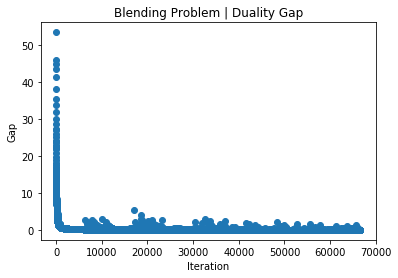

In [179]:
plt.scatter(iters,gaps)
plt.title("Blending Problem | Duality Gap")
plt.xlabel("Iteration")
plt.ylabel("Gap")
plt.show()

In [178]:
print("Final Solution {}".format(x0.dot(c)))

Final Solution [[3.02434323]]
